New York City Taxi Trip Duration

The competition dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this playground competition. Based on individual trip attributes, participants should predict the duration of each trip in the test set.

File descriptions
train.csv - the training set (contains 1458644 trip records)
test.csv - the testing set (contains 625134 trip records)
sample_submission.csv - a sample submission file in the correct format

Data fields

id - a unique identifier for each trip

vendor_id - a code indicating the provider associated with the trip record

pickup_datetime - date and time when the meter was engaged

dropoff_datetime - date and time when the meter was disengaged

passenger_count - the number of passengers in the vehicle (driver entered value)

pickup_longitude - the longitude where the meter was engaged

pickup_latitude - the latitude where the meter was engaged

dropoff_longitude - the longitude where the meter was disengaged

dropoff_latitude - the latitude where the meter was disengaged

store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip

trip_duration - duration of the trip in seconds

Disclaimer: The decision was made to not remove dropoff coordinates from the dataset order to provide an expanded set of variables to use in Kernels.

https://www.kaggle.com/c/nyc-taxi-trip-duration/overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

sample_submission=pd.read_csv('C:/Users/sundooedu/Desktop/빅데이터분석수업자료/kaggle NewYork/nyc-taxi-trip-duration/sample_submission/sample_submission.csv')
test=pd.read_csv('C:/Users/sundooedu/Desktop/빅데이터분석수업자료/kaggle NewYork/nyc-taxi-trip-duration/test/test.csv', parse_dates=['pickup_datetime'])
train=pd.read_csv('C:/Users/sundooedu/Desktop/빅데이터분석수업자료/kaggle NewYork/nyc-taxi-trip-duration/train/train.csv', parse_dates=['pickup_datetime','dropoff_datetime'])

In [2]:
df_sample_submission=pd.DataFrame(sample_submission)
df_test=pd.DataFrame(test)
df_train=pd.DataFrame(train)

In [3]:
df_train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [4]:
df_test

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N
...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,2016-01-01 00:02:52,1,-74.003464,40.725105,-74.001251,40.733643,N
625130,id3700764,1,2016-01-01 00:01:52,1,-74.006363,40.743782,-73.953407,40.782467,N
625131,id2568735,1,2016-01-01 00:01:24,2,-73.972267,40.759865,-73.876602,40.748665,N
625132,id1384355,1,2016-01-01 00:00:28,1,-73.976501,40.733562,-73.854263,40.891788,N


In [5]:
df_sample_submission

,id,trip_duration
0,id3004672,959
1,id3505355,959
2,id1217141,959
3,id2150126,959
4,id1598245,959
...,...,...
625129,id3008929,959
625130,id3700764,959
625131,id2568735,959
625132,id1384355,959


시간별로 칼럼 생성하기
--

In [6]:
# df_train 시간별로 라벨 생성
df_train['time_pickup']=df_train['pickup_datetime'].dt.strftime('%m%d%H%M%S')
df_train['time_dropoff']=df_train['dropoff_datetime'].dt.strftime('%m%d%H%M%S')

df_train['month_pickup']=df_train['pickup_datetime'].dt.strftime('%m')
df_train['month_dropoff']=df_train['dropoff_datetime'].dt.strftime('%m')

df_train['date_pickup']=df_train['pickup_datetime'].dt.strftime('%d')
df_train['date_dropoff']=df_train['dropoff_datetime'].dt.strftime('%d')

df_train['hour_pickup']=df_train['pickup_datetime'].dt.strftime('%H')
df_train['hour_dropoff']=df_train['dropoff_datetime'].dt.strftime('%H')

df_train['day_pickup']=df_train['pickup_datetime'].dt.strftime('%A')
df_train['day_dropoff']=df_train['dropoff_datetime'].dt.strftime('%A')

df_train.reset_index(drop=True, inplace=True)

In [7]:
# df_test 시간별로 라벨 생성
df_test['time_pickup']=df_test['pickup_datetime'].dt.strftime('%m%d%H%M%S')

df_test['month_pickup']=df_test['pickup_datetime'].dt.strftime('%m')

df_test['date_pickup']=df_test['pickup_datetime'].dt.strftime('%d')

df_test['hour_pickup']=df_test['pickup_datetime'].dt.strftime('%H')

df_test['day_pickup']=df_test['pickup_datetime'].dt.strftime('%A')

df_test.reset_index(drop=True, inplace=True)

In [8]:
# 만든 날짜 및 시간별 데이터 정수로 변환
df_train['time_pickup']=pd.Series(df_train['time_pickup'], dtype=int)
df_train['time_dropoff']=pd.Series(df_train['time_dropoff'], dtype=int)

df_train['month_pickup']=pd.Series(df_train['month_pickup'], dtype=int)
df_train['month_dropoff']=pd.Series(df_train['month_dropoff'], dtype=int)

df_train['date_pickup']=pd.Series(df_train['date_pickup'], dtype=int)
df_train['date_dropoff']=pd.Series(df_train['date_dropoff'], dtype=int)

df_train['hour_pickup']=pd.Series(df_train['hour_pickup'], dtype=int)
df_train['hour_dropoff']=pd.Series(df_train['hour_dropoff'], dtype=int)

df_test['time_pickup']=pd.Series(df_test['time_pickup'], dtype=int)
df_test['month_pickup']=pd.Series(df_test['month_pickup'], dtype=int)
df_test['date_pickup']=pd.Series(df_test['date_pickup'], dtype=int)
df_test['hour_pickup']=pd.Series(df_test['hour_pickup'], dtype=int)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 21 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  time_pickup         1458644 non-null  int32         
 12  time_dropoff        1458644 non-null  int32         
 13  month_pickup

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  625134 non-null  object        
 1   vendor_id           625134 non-null  int64         
 2   pickup_datetime     625134 non-null  datetime64[ns]
 3   passenger_count     625134 non-null  int64         
 4   pickup_longitude    625134 non-null  float64       
 5   pickup_latitude     625134 non-null  float64       
 6   dropoff_longitude   625134 non-null  float64       
 7   dropoff_latitude    625134 non-null  float64       
 8   store_and_fwd_flag  625134 non-null  object        
 9   time_pickup         625134 non-null  int32         
 10  month_pickup        625134 non-null  int32         
 11  date_pickup         625134 non-null  int32         
 12  hour_pickup         625134 non-null  int32         
 13  day_pickup          625134 no

In [11]:
df_sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             625134 non-null  object
 1   trip_duration  625134 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 9.5+ MB


In [12]:
df_train.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
time_pickup           0
time_dropoff          0
month_pickup          0
month_dropoff         0
date_pickup           0
date_dropoff          0
hour_pickup           0
hour_dropoff          0
day_pickup            0
day_dropoff           0
dtype: int64

In [13]:
df_test.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
time_pickup           0
month_pickup          0
date_pickup           0
hour_pickup           0
day_pickup            0
dtype: int64

In [14]:
df_sample_submission.isna().sum()

id               0
trip_duration    0
dtype: int64

날짜별, 시간대별 승객 수 보기(택시 기사 본인 제외)
--

1월부터 6월까지 달 별 탑승 승객 수

In [15]:
solo=df_train[df_train.passenger_count==1].index
df_p=df_train.drop(solo)
df_p

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,time_pickup,time_dropoff,month_pickup,month_dropoff,date_pickup,date_dropoff,hour_pickup,hour_dropoff,day_pickup,day_dropoff
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,...,130220140,130220903,1,1,30,30,22,22,Saturday,Saturday
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,...,617223459,617224040,6,6,17,17,22,22,Friday,Friday
11,id1299289,2,2016-05-15 11:16:11,2016-05-15 11:34:59,4,-73.991531,40.749439,-73.956543,40.770630,N,...,515111611,515113459,5,5,15,15,11,11,Sunday,Sunday
12,id1187965,2,2016-02-19 09:52:46,2016-02-19 10:11:20,2,-73.962982,40.756680,-73.984406,40.760719,N,...,219095246,219101120,2,2,19,19,9,10,Friday,Friday
32,id3075902,2,2016-05-10 19:27:38,2016-05-10 19:44:40,2,-74.005501,40.706589,-73.985817,40.744202,N,...,510192738,510194440,5,5,10,10,19,19,Tuesday,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458632,id0469946,2,2016-03-06 11:04:48,2016-03-06 11:17:45,2,-74.015572,40.710892,-73.996620,40.743633,N,...,306110448,306111745,3,3,6,6,11,11,Sunday,Sunday
1458633,id2432342,1,2016-03-17 19:10:16,2016-03-17 19:26:35,3,-73.979652,40.735279,-73.995522,40.759754,N,...,317191016,317192635,3,3,17,17,19,19,Thursday,Thursday
1458634,id3445276,1,2016-04-03 13:51:25,2016-04-03 14:07:37,2,-73.989075,40.730465,-73.963882,40.773739,N,...,403135125,403140737,4,4,3,3,13,14,Sunday,Sunday
1458638,id1454193,2,2016-02-02 00:39:39,2016-02-02 00:46:33,5,-73.988823,40.736553,-73.989166,40.757393,N,...,202003939,202004633,2,2,2,2,0,0,Tuesday,Tuesday


- passenger_count가 1인 택시는 승객이 없으므로 제거 해주었습니다.

In [16]:
df_p.groupby('month_pickup')['passenger_count'].sum().reset_index()

,month_pickup,passenger_count
0,1,221990
1,2,226055
2,3,243715
3,4,242059
4,5,237695
5,6,222902


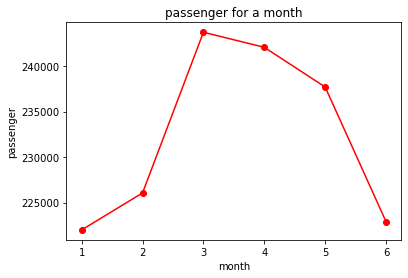

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

df_p['month_pickup'].unique()
month_passenger=df_p.groupby('month_pickup')['passenger_count'].sum()
month_passenger

labels=['1','2','3','4','5','6']

fig, ax=plt.subplots()
plt.plot(labels, month_passenger, marker="o", color='r')
plt.xlabel("month")
plt.ylabel("passenger")
plt.title("passenger for a month")
plt.show()

1일 부터 31일까지 일 별 탑승 승객 수

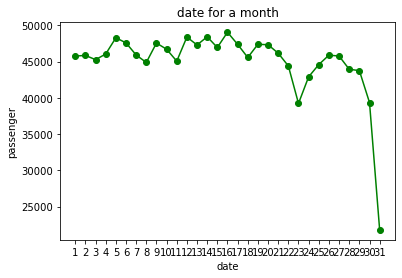

In [18]:
df_p['date_pickup'].unique()
date_passenger=df_p.groupby('date_pickup')['passenger_count'].sum()
date_passenger

labels=['1','2','3','4','5','6','7','8','9','10','11','12','13',
'14','15','16','17','18','19','20','21','22','23','24','25','26',
'27','28','29','30','31']

fig, ax=plt.subplots()
plt.plot(labels, date_passenger, marker="o", color='g')
plt.xlabel("date")
plt.ylabel("passenger")
plt.title("date for a month")
plt.show()

시간대별, 요일 별 승객 수 보기

[Text(0, 0.5, 'passenger'), Text(0.5, 1.0, 'day')]

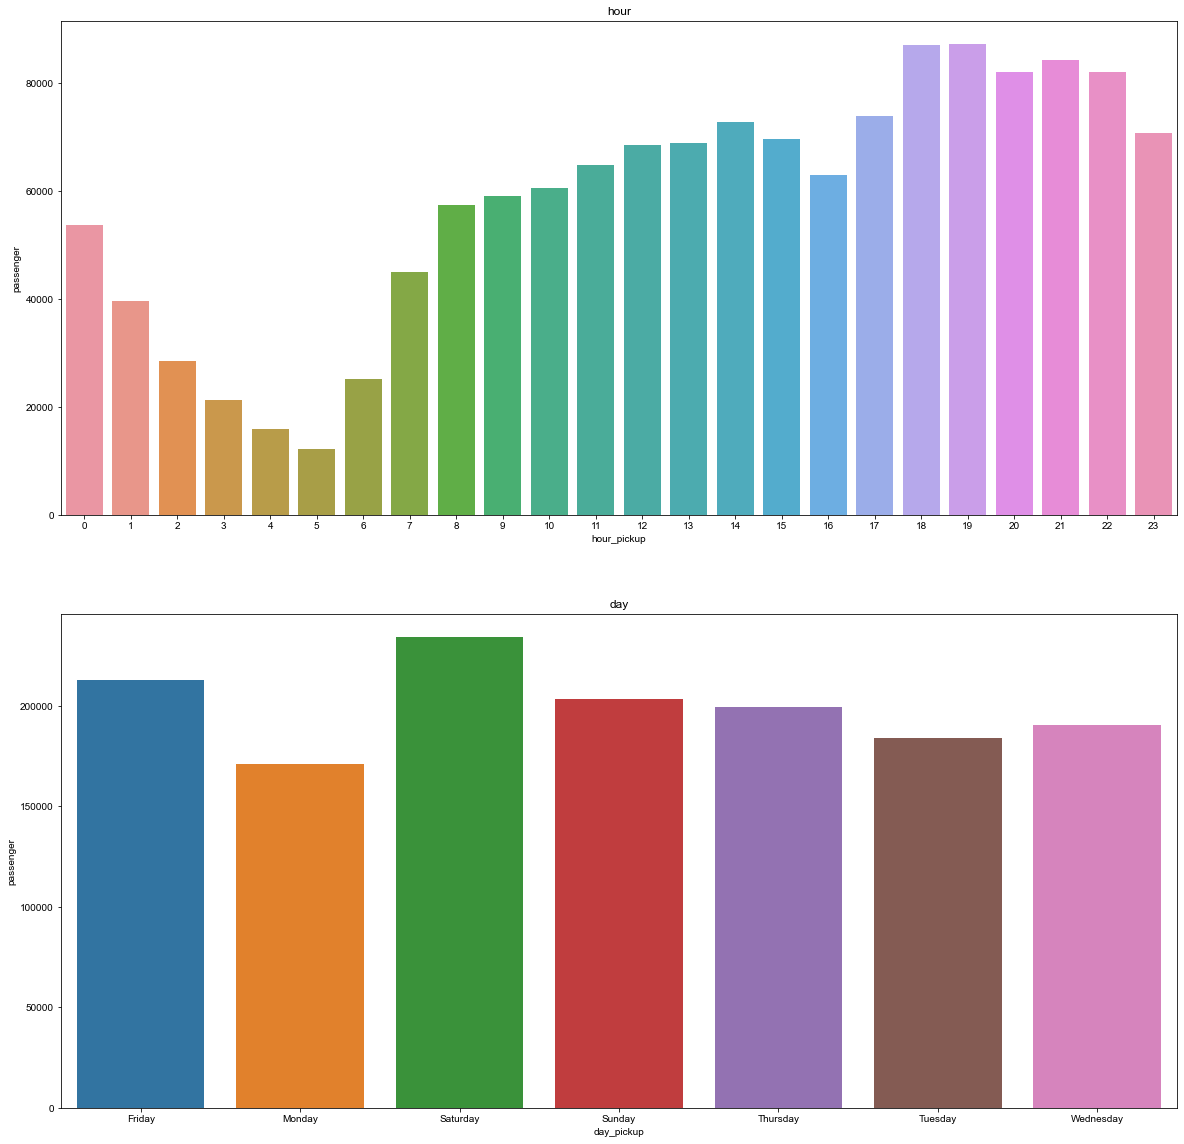

In [19]:
import seaborn as sns
hour_passenger=df_p.groupby('hour_pickup')['passenger_count'].sum().reset_index()
day_passenger=df_p.groupby('day_pickup')['passenger_count'].sum().reset_index()

figure, ((ax1), (ax2)) =plt.subplots(nrows=2,ncols=1)
figure.set_size_inches(20,20)

sns.barplot(data=hour_passenger, x="hour_pickup", y="passenger_count", ax=ax1)
'\n'
sns.barplot(data=day_passenger, x="day_pickup", y="passenger_count", ax=ax2)

sns.set_style("darkgrid")
ax1.set(ylabel='passenger', title ="hour")
ax2.set(ylabel='passenger', title ="day")

승하차 소요시간 칼럼 만들기
--

- trip_duration을 시간으로 표시한 것과 같음

In [20]:
i=0
elapsed_time=[]

for i in range(0,1458644):
    e_time=df_train.dropoff_datetime[i]-df_train.pickup_datetime[i]
    elapsed_time.append(e_time)
    i+=1

In [21]:
elapsed_time=pd.Series(elapsed_time)
df_train['elapsed_time']=elapsed_time
df_train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,time_dropoff,month_pickup,month_dropoff,date_pickup,date_dropoff,hour_pickup,hour_dropoff,day_pickup,day_dropoff,elapsed_time
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,314173230,3,3,14,14,17,17,Monday,Monday,0 days 00:07:35
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,612005438,6,6,12,12,0,0,Sunday,Sunday,0 days 00:11:03
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,119121048,1,1,19,19,11,12,Tuesday,Tuesday,0 days 00:35:24
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,406193940,4,4,6,6,19,19,Wednesday,Wednesday,0 days 00:07:09
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,326133810,3,3,26,26,13,13,Saturday,Saturday,0 days 00:07:15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,...,408134402,4,4,8,8,13,13,Friday,Friday,0 days 00:12:58
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,...,110074610,1,1,10,10,7,7,Sunday,Sunday,0 days 00:10:55
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,...,422071025,4,4,22,22,6,7,Friday,Friday,0 days 00:12:44
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,...,105160239,1,1,5,5,15,16,Tuesday,Tuesday,0 days 00:06:13


In [22]:
df_train.elapsed_time.describe()

count                      1458644
mean     0 days 00:15:59.492272960
std      0 days 01:27:17.431724497
min                0 days 00:00:01
25%                0 days 00:06:37
50%                0 days 00:11:02
75%                0 days 00:17:55
max               40 days 19:31:22
Name: elapsed_time, dtype: object

승하차 소요시간을 1시간 기준으로 다시 정렬해주겠습니다.
- trip_duration * 3600(=분*시간)과 같음

In [23]:
i=0
elapsed_time_h=[]

for i in range(0,1458644):
    e_time_h=round((df_train.elapsed_time.iloc[i].seconds/3600), 5)
    elapsed_time_h.append(e_time_h)

In [24]:
elapsed_time_h=pd.Series(elapsed_time_h)
df_train['elapsed_time_h']=elapsed_time_h

In [25]:
df_train.sort_values(by='elapsed_time_h', ascending=False)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,month_pickup,month_dropoff,date_pickup,date_dropoff,hour_pickup,hour_dropoff,day_pickup,day_dropoff,elapsed_time,elapsed_time_h
1234291,id1942836,2,2016-02-15 23:18:06,2016-02-16 23:17:58,2,-73.794525,40.644825,-73.991051,40.755573,N,...,2,2,15,16,23,23,Monday,Tuesday,0 days 23:59:52,23.99778
295382,id0593332,2,2016-05-31 13:00:39,2016-06-01 13:00:30,1,-73.781952,40.644688,-73.993874,40.745926,N,...,5,6,31,1,13,13,Tuesday,Wednesday,0 days 23:59:51,23.99750
73816,id0953667,2,2016-05-06 00:00:10,2016-05-07 00:00:00,1,-73.996010,40.753220,-73.979027,40.740601,N,...,5,5,6,7,0,0,Friday,Saturday,0 days 23:59:50,23.99722
59891,id2837671,2,2016-06-30 16:37:52,2016-07-01 16:37:39,1,-73.992279,40.749729,-73.962524,40.800770,N,...,6,7,30,1,16,16,Thursday,Friday,0 days 23:59:47,23.99639
1360439,id1358458,2,2016-06-23 16:01:45,2016-06-24 16:01:30,1,-73.782089,40.644806,-73.985016,40.666828,N,...,6,6,23,24,16,16,Thursday,Friday,0 days 23:59:45,23.99583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269418,id0553321,2,2016-04-11 19:01:35,2016-04-11 19:01:36,1,-73.945999,40.792202,-73.947411,40.792740,N,...,4,4,11,11,19,19,Monday,Monday,0 days 00:00:01,0.00028
467645,id0008221,2,2016-05-16 14:42:18,2016-05-16 14:42:19,1,-73.787086,40.647388,-73.789780,40.646992,N,...,5,5,16,16,14,14,Monday,Monday,0 days 00:00:01,0.00028
533799,id3563137,2,2016-04-15 17:32:22,2016-04-15 17:32:23,1,-73.782417,40.644154,-73.782433,40.644169,N,...,4,4,15,15,17,17,Friday,Friday,0 days 00:00:01,0.00028
726971,id2697717,2,2016-03-27 12:55:52,2016-03-27 12:55:53,2,-73.983154,40.767159,-73.983238,40.767097,N,...,3,3,27,27,12,12,Sunday,Sunday,0 days 00:00:01,0.00028


pickup 지점의 위도와 경도, dropoff 지점의 위도와 경도를 이용하여 거리 구하기
--

1. 위도와 경도 별로 거리가 다르기 때문에 지구의 반지름을 이용하여 km로 반환한다.

- 위도 1도와 경도 1도는 몇 km일까?

참고: https://m.blog.naver.com/PostView.nhn?blogId=willms&logNo=70139571428&proxyReferer=https:%2F%2Fwww.google.com%2F


- 위도와 경도를 이용하여 거리 구하는 세 가지 방법

참고: http://blog.naver.com/PostView.nhn?blogId=wideeyed&logNo=221406744173

In [26]:
import numbers
import math

class GeoUtil:
    def degree2radius(degree):
        return degree*(math.pi/180)
    def get_harvevrsion_distance(x1,y1,x2,y2,round_decimal_digits=5):
        R=6371 # 지구의 반경(단위: km)
        dLon=GeoUtil.degree2radius(x2-x1)
        dLat=GeoUtil.degree2radius(y2-y1)
        
        a=math.sin(dLat/2)*math.sin(dLat/2)\
          +(math.cos(GeoUtil.degree2radius(y1))\
           *math.cos(GeoUtil.degree2radius(y2))\
           *math.sin(dLon/2)*math.sin(dLon/2))
                     
        b=2*math.atan2(math.sqrt(a), math.sqrt(1-a))
        return round(R*b, round_decimal_digits)

In [27]:
GeoUtil.get_harvevrsion_distance(-73.964630,40.767937,-73.964630,40.765602)

0.25964

In [28]:
df_train.iloc[0][5:9]

pickup_longitude    -73.9822
pickup_latitude      40.7679
dropoff_longitude   -73.9646
dropoff_latitude     40.7656
Name: 0, dtype: object

In [29]:
# 임의로 칼럼 만들기
df_train['distance']=df_train.id

In [30]:
df_train['distance'][0]

'id2875421'

In [31]:
df_train.iloc[:, 5:9]

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,-73.982155,40.767937,-73.964630,40.765602
1,-73.980415,40.738564,-73.999481,40.731152
2,-73.979027,40.763939,-74.005333,40.710087
3,-74.010040,40.719971,-74.012268,40.706718
4,-73.973053,40.793209,-73.972923,40.782520
...,...,...,...,...
1458639,-73.982201,40.745522,-73.994911,40.740170
1458640,-74.000946,40.747379,-73.970184,40.796547
1458641,-73.959129,40.768799,-74.004433,40.707371
1458642,-73.982079,40.749062,-73.974632,40.757107


거리 칼럼 생성

In [32]:
i=0
d=[]

for i in range(0,1458644):
    x1=df_train.iloc[i, 5]
    y1=df_train.iloc[i, 6]
    x2=df_train.iloc[i, 7]
    y2=df_train.iloc[i, 8]
    
    dis=GeoUtil.get_harvevrsion_distance(x1,y1,x2,y2)
    d.append(dis)
    
    i+=1


In [33]:
d=pd.Series(d)
df_train['distance']=d

In [34]:
df_train['distance']

0          1.49852
1          1.80551
2          6.38510
3          1.48550
4          1.18859
            ...   
1458639    1.22508
1458640    6.04984
1458641    7.82461
1458642    1.09256
1458643    1.13404
Name: distance, Length: 1458644, dtype: float64

In [35]:
df_train['distance'].describe()

count    1.458644e+06
mean     3.440864e+00
std      4.296538e+00
min      0.000000e+00
25%      1.231840e+00
50%      2.093715e+00
75%      3.875340e+00
max      1.240909e+03
Name: distance, dtype: float64

승객이 있는 택시와 승객이 없는 택시 구분하기
--

-  passenger_count - the number of passengers in the vehicle (driver entered value)

승객이 있는 택시 데이터프레임

In [36]:
solo=df_train[df_train.passenger_count==1].index
df_p=df_train.drop(solo)
df_p

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,month_dropoff,date_pickup,date_dropoff,hour_pickup,hour_dropoff,day_pickup,day_dropoff,elapsed_time,elapsed_time_h,distance
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,...,1,30,30,22,22,Saturday,Saturday,0 days 00:07:23,0.12306,1.09894
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,...,6,17,17,22,22,Friday,Friday,0 days 00:05:41,0.09472,1.32628
11,id1299289,2,2016-05-15 11:16:11,2016-05-15 11:34:59,4,-73.991531,40.749439,-73.956543,40.770630,N,...,5,15,15,11,11,Sunday,Sunday,0 days 00:18:48,0.31333,3.77310
12,id1187965,2,2016-02-19 09:52:46,2016-02-19 10:11:20,2,-73.962982,40.756680,-73.984406,40.760719,N,...,2,19,19,9,10,Friday,Friday,0 days 00:18:34,0.30944,1.85948
32,id3075902,2,2016-05-10 19:27:38,2016-05-10 19:44:40,2,-74.005501,40.706589,-73.985817,40.744202,N,...,5,10,10,19,19,Tuesday,Tuesday,0 days 00:17:02,0.28389,4.49928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458632,id0469946,2,2016-03-06 11:04:48,2016-03-06 11:17:45,2,-74.015572,40.710892,-73.996620,40.743633,N,...,3,6,6,11,11,Sunday,Sunday,0 days 00:12:57,0.21583,3.97554
1458633,id2432342,1,2016-03-17 19:10:16,2016-03-17 19:26:35,3,-73.979652,40.735279,-73.995522,40.759754,N,...,3,17,17,19,19,Thursday,Thursday,0 days 00:16:19,0.27194,3.03211
1458634,id3445276,1,2016-04-03 13:51:25,2016-04-03 14:07:37,2,-73.989075,40.730465,-73.963882,40.773739,N,...,4,3,3,13,14,Sunday,Sunday,0 days 00:16:12,0.27000,5.25899
1458638,id1454193,2,2016-02-02 00:39:39,2016-02-02 00:46:33,5,-73.988823,40.736553,-73.989166,40.757393,N,...,2,2,2,0,0,Tuesday,Tuesday,0 days 00:06:54,0.11500,2.31745


승객이 없는 택시 데이터 프레임

In [37]:
not_solo=df_train[df_train.passenger_count!=1].index
df_s=df_train.drop(not_solo)
df_s

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,month_dropoff,date_pickup,date_dropoff,hour_pickup,hour_dropoff,day_pickup,day_dropoff,elapsed_time,elapsed_time_h,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,3,14,14,17,17,Monday,Monday,0 days 00:07:35,0.12639,1.49852
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6,12,12,0,0,Sunday,Sunday,0 days 00:11:03,0.18417,1.80551
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,1,19,19,11,12,Tuesday,Tuesday,0 days 00:35:24,0.59000,6.38510
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4,6,6,19,19,Wednesday,Wednesday,0 days 00:07:09,0.11917,1.48550
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,3,26,26,13,13,Saturday,Saturday,0 days 00:07:15,0.12083,1.18859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458637,id1920898,1,2016-04-17 18:48:16,2016-04-17 19:00:56,1,-73.975357,40.751705,-73.949478,40.776764,N,...,4,17,17,18,19,Sunday,Sunday,0 days 00:12:40,0.21111,3.53756
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,...,1,10,10,7,7,Sunday,Sunday,0 days 00:10:55,0.18194,6.04984
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,...,4,22,22,6,7,Friday,Friday,0 days 00:12:44,0.21222,7.82461
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,...,1,5,5,15,16,Tuesday,Tuesday,0 days 00:06:13,0.10361,1.09256


승객이 있는 택시 탑승 소요시간별로 보기
--

In [38]:
df_p.sort_values(by='elapsed_time', ascending=False)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,month_dropoff,date_pickup,date_dropoff,hour_pickup,hour_dropoff,day_pickup,day_dropoff,elapsed_time,elapsed_time_h,distance
680594,id0369307,1,2016-02-13 22:38:00,2016-03-08 15:57:38,2,-73.921677,40.735252,-73.984749,40.759979,N,...,3,13,8,22,15,Saturday,Tuesday,23 days 17:19:38,17.32722,5.98249
1234291,id1942836,2,2016-02-15 23:18:06,2016-02-16 23:17:58,2,-73.794525,40.644825,-73.991051,40.755573,N,...,2,15,16,23,23,Monday,Tuesday,0 days 23:59:52,23.99778,20.64272
753765,id2589925,2,2016-05-17 22:22:56,2016-05-18 22:22:35,4,-74.006111,40.734680,-73.958809,40.815449,N,...,5,17,18,22,22,Tuesday,Wednesday,0 days 23:59:39,23.99417,9.82469
1221666,id3346235,2,2016-05-09 15:59:04,2016-05-10 15:58:42,5,-73.982658,40.761963,-73.988976,40.743023,N,...,5,9,10,15,15,Monday,Tuesday,0 days 23:59:38,23.99389,2.17221
1138915,id1565504,2,2016-06-24 22:22:12,2016-06-25 22:21:49,6,-73.789696,40.643574,-74.001190,40.721466,N,...,6,24,25,22,22,Friday,Saturday,0 days 23:59:37,23.99361,19.82577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447556,id2633200,2,2016-06-11 21:11:00,2016-06-11 21:11:02,5,-73.951973,40.692703,-73.951988,40.692699,N,...,6,11,11,21,21,Saturday,Saturday,0 days 00:00:02,0.00056,0.00135
542697,id1480227,2,2016-05-11 10:34:46,2016-05-11 10:34:48,2,-73.789703,40.643734,-73.789734,40.643711,N,...,5,11,11,10,10,Wednesday,Wednesday,0 days 00:00:02,0.00056,0.00362
949309,id2009266,2,2016-01-19 11:28:23,2016-01-19 11:28:25,2,-74.008064,40.722118,-74.008057,40.722103,N,...,1,19,19,11,11,Tuesday,Tuesday,0 days 00:00:02,0.00056,0.00181
726971,id2697717,2,2016-03-27 12:55:52,2016-03-27 12:55:53,2,-73.983154,40.767159,-73.983238,40.767097,N,...,3,27,27,12,12,Sunday,Sunday,0 days 00:00:01,0.00028,0.00980


- 단위: 1 == 1시간

In [39]:
df_p.elapsed_time_h.describe()

count    425104.000000
mean          0.284875
std           1.028328
min           0.000280
25%           0.114440
50%           0.189720
75%           0.308060
max          23.997780
Name: elapsed_time_h, dtype: float64

- 승객이 있는 택시의 평균 탑승 시간은 17분입니다.

승하차 시간 차이가 가장 큰 택시

In [40]:
print(df_p.loc[680594][2:4])
print('택시기사 제외하고 승객 수는: ',df_p.loc[680594][4]-1, '명')
print('id0369307님의 trip duration은 ', df_p.loc[680594][10]/3600/24, '일 입니다.')
print('승하차 소요 시간은: ', df_p.loc[680594][-3], '입니다.')
print('승하차 거리는', df_p.loc[680594][-1], 'km 입니다.')

pickup_datetime     2016-02-13 22:38:00
dropoff_datetime    2016-03-08 15:57:38
Name: 680594, dtype: object
택시기사 제외하고 승객 수는:  1 명
id0369307님의 trip duration은  23.72196759259259 일 입니다.
승하차 소요 시간은:  23 days 17:19:38 입니다.
승하차 거리는 5.98249 km 입니다.


승객이 있는 택시 승하차 지점 거리별로 보기
--

In [41]:
df_p.sort_values(by='distance', ascending=False)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,month_dropoff,date_pickup,date_dropoff,hour_pickup,hour_dropoff,day_pickup,day_dropoff,elapsed_time,elapsed_time_h,distance
974378,id1510552,2,2016-01-06 20:40:52,2016-01-06 20:51:03,5,-71.799896,35.081532,-79.352837,40.436329,N,...,1,6,6,20,20,Wednesday,Wednesday,0 days 00:10:11,0.16972,891.21410
910072,id1146400,1,2016-02-15 18:57:32,2016-02-15 19:02:35,2,-73.989914,40.756634,-70.346077,36.398121,N,...,2,15,15,18,19,Monday,Monday,0 days 00:05:03,0.08417,578.84282
1100676,id2644780,1,2016-05-03 16:24:07,2016-05-03 17:18:34,2,-73.991325,40.750023,-79.518616,43.921028,N,...,5,3,3,16,17,Tuesday,Tuesday,0 days 00:54:27,0.90750,574.87544
397526,id0982904,1,2016-04-28 13:32:14,2016-04-28 14:14:09,2,-73.870682,40.773598,-79.817978,38.963852,N,...,4,28,28,13,14,Thursday,Thursday,0 days 00:41:55,0.69861,545.85350
275644,id0978162,1,2016-02-24 16:20:59,2016-02-24 16:35:34,4,-75.354332,34.712234,-73.834923,32.181141,N,...,2,24,24,16,16,Wednesday,Wednesday,0 days 00:14:35,0.24306,314.76420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414249,id2754348,1,2016-04-12 19:22:21,2016-04-12 19:23:36,2,-73.789696,40.642929,-73.789696,40.642929,N,...,4,12,12,19,19,Tuesday,Tuesday,0 days 00:01:15,0.02083,0.00000
1216638,id3524645,1,2016-05-27 16:59:35,2016-05-27 17:00:06,2,-73.608459,40.741699,-73.608459,40.741699,N,...,5,27,27,16,17,Friday,Friday,0 days 00:00:31,0.00861,0.00000
413972,id0992577,2,2016-02-12 18:19:51,2016-02-12 18:34:32,2,-73.793472,40.656898,-73.793472,40.656898,N,...,2,12,12,18,18,Friday,Friday,0 days 00:14:41,0.24472,0.00000
413844,id3259084,2,2016-02-06 12:52:11,2016-02-06 12:56:37,6,-74.008141,40.741982,-74.008141,40.741982,N,...,2,6,6,12,12,Saturday,Saturday,0 days 00:04:26,0.07389,0.00000


In [42]:
df_p.distance.describe()

count    425104.000000
mean          3.579476
std           4.630378
min           0.000000
25%           1.259718
50%           2.143555
75%           4.020220
max         891.214100
Name: distance, dtype: float64

- 승하차 지점간 평균 거리는 3.579476km 입니다.

승하차 지점의 가장 많은 거리를 이동한 택시

In [43]:
# id 1510552
print(df_p.loc[974378][2:4])
print('택시기사 제외하고 승객 수는: ',df_p.loc[974378][4]-1, '명')
print('id1510552님의 trip duration은 ', df_p.loc[974378][10]/3600/24, '일 입니다.')
print('승하차 소요 시간은: ', df_p.loc[974378][-3], '입니다.')
print('승하차 거리는', df_p.loc[974378][-1], 'km 입니다.')

pickup_datetime     2016-01-06 20:40:52
dropoff_datetime    2016-01-06 20:51:03
Name: 974378, dtype: object
택시기사 제외하고 승객 수는:  4 명
id1510552님의 trip duration은  0.007071759259259259 일 입니다.
승하차 소요 시간은:  0 days 00:10:11 입니다.
승하차 거리는 891.2141 km 입니다.


승객이 없는 택시의 대기시간
--

In [44]:
df_s.sort_values(by='elapsed_time', ascending=False)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,month_dropoff,date_pickup,date_dropoff,hour_pickup,hour_dropoff,day_pickup,day_dropoff,elapsed_time,elapsed_time_h,distance
978383,id0053347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,N,...,3,13,25,22,18,Saturday,Friday,40 days 19:31:22,19.52278,19.90066
924150,id1325766,1,2016-01-05 06:14:15,2016-01-31 01:01:07,1,-73.983788,40.742325,-73.985489,40.727676,N,...,1,5,31,6,1,Tuesday,Sunday,25 days 18:46:52,18.78111,1.63513
355003,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.789650,40.643559,-73.956810,40.773087,N,...,1,5,27,0,11,Tuesday,Wednesday,22 days 10:48:56,10.81556,20.14866
295382,id0593332,2,2016-05-31 13:00:39,2016-06-01 13:00:30,1,-73.781952,40.644688,-73.993874,40.745926,N,...,6,31,1,13,13,Tuesday,Wednesday,0 days 23:59:51,23.99750,21.11710
73816,id0953667,2,2016-05-06 00:00:10,2016-05-07 00:00:00,1,-73.996010,40.753220,-73.979027,40.740601,N,...,5,6,7,0,0,Friday,Saturday,0 days 23:59:50,23.99722,2.00392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034341,id0218424,1,2016-01-17 13:50:16,2016-01-17 13:50:17,1,-73.953728,40.670036,-73.953346,40.670021,N,...,1,17,17,13,13,Sunday,Sunday,0 days 00:00:01,0.00028,0.03222
1165514,id2757288,1,2016-04-03 23:53:28,2016-04-03 23:53:29,1,-73.845016,40.874332,-73.845016,40.874332,N,...,4,3,3,23,23,Sunday,Sunday,0 days 00:00:01,0.00028,0.00000
404610,id3686648,1,2016-01-29 11:18:55,2016-01-29 11:18:56,1,-73.971954,40.750137,-73.971985,40.750130,N,...,1,29,29,11,11,Friday,Friday,0 days 00:00:01,0.00028,0.00271
1056854,id1885961,2,2016-02-10 13:58:09,2016-02-10 13:58:10,1,-73.781754,40.644451,-73.781754,40.644459,N,...,2,10,10,13,13,Wednesday,Wednesday,0 days 00:00:01,0.00028,0.00085


In [45]:
df_s.elapsed_time_h.describe()

count    1.033540e+06
mean     2.564241e-01
std      8.130876e-01
min      2.800000e-04
25%      1.086100e-01
50%      1.816700e-01
75%      2.950000e-01
max      2.399750e+01
Name: elapsed_time_h, dtype: float64

- 승객이 없는 택시의 평균 시간은 18분 입니다.

가장 오랜 시간 승객이 없었던 택시

In [46]:
print(df_s.loc[978383][2:4])
print('id0053347님의 trip duration은 ', df_s.loc[978383][10]/3600/24, '일 입니다.')
print('승하차 소요 시간은: ', df_s.loc[978383][-3], '입니다.')
print('승하차 거리는', df_s.loc[978383][-1], 'km 입니다.')

pickup_datetime     2016-02-13 22:46:52
dropoff_datetime    2016-03-25 18:18:14
Name: 978383, dtype: object
id0053347님의 trip duration은  40.81344907407408 일 입니다.
승하차 소요 시간은:  40 days 19:31:22 입니다.
승하차 거리는 19.90066 km 입니다.


승객이 없는 택시  거리별로 보기
--

In [47]:
df_s.sort_values(by='distance', ascending=False)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,month_dropoff,date_pickup,date_dropoff,hour_pickup,hour_dropoff,day_pickup,day_dropoff,elapsed_time,elapsed_time_h,distance
184925,id2306955,1,2016-05-07 18:58:53,2016-05-07 19:12:05,1,-72.809669,51.881084,-73.987228,40.750599,N,...,5,7,7,18,19,Saturday,Saturday,0 days 00:13:12,0.22000,1240.90868
923793,id1001696,1,2016-02-24 21:02:32,2016-02-24 21:25:57,1,-73.972366,40.758633,-79.553535,43.674000,N,...,2,24,24,21,21,Wednesday,Wednesday,0 days 00:23:25,0.39028,562.23519
1013474,id3626673,1,2016-05-05 18:02:50,2016-05-05 18:18:23,1,-73.978912,40.756763,-79.338699,41.427902,N,...,5,5,5,18,18,Thursday,Thursday,0 days 00:15:33,0.25917,455.24120
377068,id0116374,1,2016-04-02 20:33:19,2016-04-02 20:38:01,1,-74.007095,40.717113,-76.963242,38.946033,N,...,4,2,2,20,20,Saturday,Saturday,0 days 00:04:42,0.07833,320.12577
644165,id0401529,2,2016-06-02 15:19:35,2016-06-02 15:32:59,1,-73.980751,40.757111,-74.240051,38.478298,N,...,6,2,2,15,15,Thursday,Thursday,0 days 00:13:24,0.22333,254.36352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652355,id3524737,1,2016-04-13 20:44:58,2016-04-13 21:03:46,1,-74.008202,40.750553,-74.008202,40.750553,N,...,4,13,13,20,21,Wednesday,Wednesday,0 days 00:18:48,0.31333,0.00000
542435,id3083827,2,2016-02-14 08:29:10,2016-02-14 08:32:28,1,-73.992012,40.743401,-73.992012,40.743401,N,...,2,14,14,8,8,Sunday,Sunday,0 days 00:03:18,0.05500,0.00000
292918,id1358335,1,2016-05-13 18:14:50,2016-05-13 18:14:57,1,-73.981262,40.721199,-73.981262,40.721199,N,...,5,13,13,18,18,Friday,Friday,0 days 00:00:07,0.00194,0.00000
292948,id2318393,1,2016-03-11 19:35:31,2016-03-11 19:36:07,1,-73.945625,40.751587,-73.945625,40.751587,N,...,3,11,11,19,19,Friday,Friday,0 days 00:00:36,0.01000,0.00000


In [48]:
df_s.distance.describe()

count    1.033540e+06
mean     3.383852e+00
std      4.150101e+00
min      0.000000e+00
25%      1.221070e+00
50%      2.073360e+00
75%      3.817215e+00
max      1.240909e+03
Name: distance, dtype: float64

- 승객이 없었던 택시들의 평균 이동 거리는 3.383852km 입니다.

승객이 없었던 택시중에 가장 많은 이동 거리를 가진 택시 

In [49]:
print(df_s.loc[184925][2:4])
print('id2306955님의 trip duration은 ', df_s.loc[184925][10]/3600/24, '일 입니다.')
print('승하차 소요 시간은: ', df_s.loc[184925][-3], '입니다.')
print('승하차 거리는', df_s.loc[184925][-1], 'km 입니다.')

pickup_datetime     2016-05-07 18:58:53
dropoff_datetime    2016-05-07 19:12:05
Name: 184925, dtype: object
id2306955님의 trip duration은  0.009166666666666667 일 입니다.
승하차 소요 시간은:  0 days 00:13:12 입니다.
승하차 거리는 1240.90868 km 입니다.


승객이 있는 택시들 중에서 가장 많은 거리를 이동한 고객과 가장 많은 시간 택시에 계셨던 분들, 평균 속도 확인해보기 (속력=거리/시간)
--

In [50]:
print('id 1510552님의 승하차 거리는', df_p.loc[974378][-1], 'km 입니다.')
print('승하차 소요 시간은: ', df_p.loc[974378][-3], '입니다.')
print('id 1510552님의 평균 이동 속도는', df_p.loc[974378][-1]/(df_p.loc[974378][-2]), 'km/h 입니다.')

id 1510552님의 승하차 거리는 891.2141 km 입니다.
승하차 소요 시간은:  0 days 00:10:11 입니다.
id 1510552님의 평균 이동 속도는 5251.084727786943 km/h 입니다.


In [51]:
print('id0369307님의 승하차 소요 시간은: ', df_p.loc[680594][-3], '입니다.')
print('승하차 거리는', df_p.loc[680594][-1], 'km 입니다.')
print('id0369307님의 평균 이동 속도는', df_p.loc[680594][-1]/(df_p.loc[680594][-2]+(23*24)), 'km/h 입니다.') 

id0369307님의 승하차 소요 시간은:  23 days 17:19:38 입니다.
승하차 거리는 5.98249 km 입니다.
id0369307님의 평균 이동 속도는 0.010507999248657038 km/h 입니다.


편차가 너무 심하므로 Label Encoding을 한 후, IQR을 통해 탑승 거리와 탑승 소요 시간의 이상치를 제거 하겠습니다.


Label Encoding
--

In [52]:
df_train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,month_dropoff,date_pickup,date_dropoff,hour_pickup,hour_dropoff,day_pickup,day_dropoff,elapsed_time,elapsed_time_h,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,3,14,14,17,17,Monday,Monday,0 days 00:07:35,0.12639,1.49852
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6,12,12,0,0,Sunday,Sunday,0 days 00:11:03,0.18417,1.80551
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,1,19,19,11,12,Tuesday,Tuesday,0 days 00:35:24,0.59000,6.38510
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4,6,6,19,19,Wednesday,Wednesday,0 days 00:07:09,0.11917,1.48550
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,3,26,26,13,13,Saturday,Saturday,0 days 00:07:15,0.12083,1.18859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,...,4,8,8,13,13,Friday,Friday,0 days 00:12:58,0.21611,1.22508
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,...,1,10,10,7,7,Sunday,Sunday,0 days 00:10:55,0.18194,6.04984
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,...,4,22,22,6,7,Friday,Friday,0 days 00:12:44,0.21222,7.82461
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,...,1,5,5,15,16,Tuesday,Tuesday,0 days 00:06:13,0.10361,1.09256


In [53]:
df_train.drop(['pickup_datetime'], axis=1, inplace=True)
df_train.drop(['dropoff_datetime'], axis=1, inplace=True)
df_train.drop(['day_pickup'], axis=1, inplace=True)
df_train.drop(['day_dropoff'], axis=1, inplace=True)

In [54]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 20 columns):
 #   Column              Non-Null Count    Dtype          
---  ------              --------------    -----          
 0   id                  1458644 non-null  object         
 1   vendor_id           1458644 non-null  int64          
 2   passenger_count     1458644 non-null  int64          
 3   pickup_longitude    1458644 non-null  float64        
 4   pickup_latitude     1458644 non-null  float64        
 5   dropoff_longitude   1458644 non-null  float64        
 6   dropoff_latitude    1458644 non-null  float64        
 7   store_and_fwd_flag  1458644 non-null  object         
 8   trip_duration       1458644 non-null  int64          
 9   time_pickup         1458644 non-null  int32          
 10  time_dropoff        1458644 non-null  int32          
 11  month_pickup        1458644 non-null  int32          
 12  month_dropoff       1458644 non-null  int32          
 1

store_and_fwd_flag label encoding

In [55]:
i=0
store_and_fwd_flag=[]

for i in range(0,1458644):
    if df_train.store_and_fwd_flag[i]=='N':
        store_and_fwd_flag.append(0)
    else:
        store_and_fwd_flag.append(1)
        i+=1  

In [56]:
store_and_fwd_flag=pd.Series(store_and_fwd_flag)
df_train['store_and_fwd_flag']=store_and_fwd_flag

id label encoding

In [57]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

df_train_encoded_id=le.fit_transform(df_train['id'])
np_id=df_train_encoded_id.reshape(-1,1)
id_1=map(lambda x: x[0], np_id)
id_1=pd.Series(id_1)

df_train['id']=id_1

In [58]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 20 columns):
 #   Column              Non-Null Count    Dtype          
---  ------              --------------    -----          
 0   id                  1458644 non-null  int64          
 1   vendor_id           1458644 non-null  int64          
 2   passenger_count     1458644 non-null  int64          
 3   pickup_longitude    1458644 non-null  float64        
 4   pickup_latitude     1458644 non-null  float64        
 5   dropoff_longitude   1458644 non-null  float64        
 6   dropoff_latitude    1458644 non-null  float64        
 7   store_and_fwd_flag  1458644 non-null  int64          
 8   trip_duration       1458644 non-null  int64          
 9   time_pickup         1458644 non-null  int32          
 10  time_dropoff        1458644 non-null  int32          
 11  month_pickup        1458644 non-null  int32          
 12  month_dropoff       1458644 non-null  int32          
 1

IQR을 통한 이상치 제거
--

- 먼저, elapsed_time이 만 1일을 넘어가는 사람부터 제거한 뒤, IQR을 통해 이상치를 제거하겠습니다.

In [59]:
df_train.sort_values(by='elapsed_time', ascending=False)

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_pickup,time_dropoff,month_pickup,month_dropoff,date_pickup,date_dropoff,hour_pickup,hour_dropoff,elapsed_time,elapsed_time_h,distance
978383,19503,1,1,-73.783905,40.648632,-73.978271,40.750202,0,3526282,213224652,325181814,2,3,13,25,22,18,40 days 19:31:22,19.52278,19.90066
924150,484252,1,1,-73.983788,40.742325,-73.985489,40.727676,0,2227612,105061415,131010107,1,1,5,31,6,1,25 days 18:46:52,18.78111,1.63513
680594,134656,1,2,-73.921677,40.735252,-73.984749,40.759979,0,2049578,213223800,308155738,2,3,13,8,22,15,23 days 17:19:38,17.32722,5.98249
355003,680749,1,1,-73.789650,40.643559,-73.956810,40.773087,0,1939736,105001942,127110838,1,1,5,27,0,11,22 days 10:48:56,10.81556,20.14866
1234291,709107,2,2,-73.794525,40.644825,-73.991051,40.755573,0,86392,215231806,216231758,2,2,15,16,23,23,0 days 23:59:52,23.99778,20.64272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269418,201803,2,1,-73.945999,40.792202,-73.947411,40.792740,0,1,411190135,411190136,4,4,11,11,19,19,0 days 00:00:01,0.00028,0.13302
467645,2913,2,1,-73.787086,40.647388,-73.789780,40.646992,0,1,516144218,516144219,5,5,16,16,14,14,0 days 00:00:01,0.00028,0.23146
533799,1299357,2,1,-73.782417,40.644154,-73.782433,40.644169,0,1,415173222,415173223,4,4,15,15,17,17,0 days 00:00:01,0.00028,0.00213
726971,984296,2,2,-73.983154,40.767159,-73.983238,40.767097,0,1,327125552,327125553,3,3,27,27,12,12,0 days 00:00:01,0.00028,0.00980


In [60]:
df_train.drop(df_train.index[978383], inplace=True)
df_train.drop(df_train.index[924150],inplace=True)
df_train.drop(df_train.index[680594],inplace=True)
df_train.drop(df_train.index[355003],inplace=True)

In [61]:
df_train.drop(['elapsed_time'], axis=1, inplace=True)

In [62]:
# 이상치 제거
# IQR
def remove_outlier_test(d_cp, column):
    fraud_column_data=d_cp[column]
    quan_25=np.percentile(fraud_column_data.values, 25)
    quan_75=np.percentile(fraud_column_data.values, 75)

    iqr=quan_75-quan_25
    iqr=iqr*1.5
    lowest=quan_25-iqr
    highest=quan_75+iqr
    outlier_index=fraud_column_data[(fraud_column_data<lowest)|(fraud_column_data>highest)].index
    print(len(outlier_index))
    d_cp.drop(outlier_index, axis=0, inplace=True)
    print(d_cp.shape)
    return d_cp

In [63]:
df_train=remove_outlier_test(df_train, 'distance')
df_train=remove_outlier_test(df_train, 'elapsed_time_h')
df_train

140673
(1317967, 19)
40462
(1277505, 19)


,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_pickup,time_dropoff,month_pickup,month_dropoff,date_pickup,date_dropoff,hour_pickup,hour_dropoff,elapsed_time_h,distance
0,1049145,2,1,-73.982155,40.767937,-73.964630,40.765602,0,455,314172455,314173230,3,3,14,14,17,17,0.12639,1.49852
1,867655,1,1,-73.980415,40.738564,-73.999481,40.731152,0,663,612004335,612005438,6,6,12,12,0,0,0.18417,1.80551
3,1278209,2,1,-74.010040,40.719971,-74.012268,40.706718,0,429,406193231,406193940,4,4,6,6,19,19,0.11917,1.48550
4,796092,2,1,-73.973053,40.793209,-73.972923,40.782520,0,435,326133055,326133810,3,3,26,26,13,13,0.12083,1.18859
5,292637,2,6,-73.982857,40.742195,-73.992081,40.749184,0,443,130220140,130220903,1,1,30,30,22,22,0.12306,1.09894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,867169,2,4,-73.982201,40.745522,-73.994911,40.740170,0,778,408133104,408134402,4,4,8,8,13,13,0.21611,1.22508
1458640,383219,1,1,-74.000946,40.747379,-73.970184,40.796547,0,655,110073515,110074610,1,1,10,10,7,7,0.18194,6.04984
1458641,841251,2,1,-73.959129,40.768799,-74.004433,40.707371,0,764,422065741,422071025,4,4,22,22,6,7,0.21222,7.82461
1458642,990387,1,1,-73.982079,40.749062,-73.974632,40.757107,0,373,105155626,105160239,1,1,5,5,15,16,0.10361,1.09256


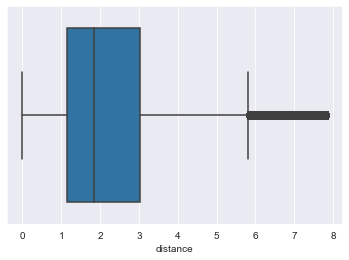

In [64]:
sns.boxplot(x = "distance", orient = "v", data = df_train)
sns.set_style("darkgrid")
plt.show()

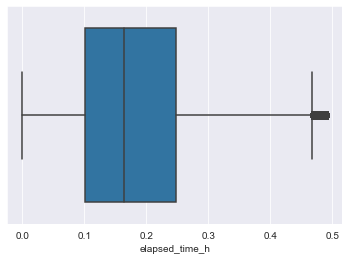

In [65]:
sns.boxplot(x = "elapsed_time_h", orient = "v", data = df_train)
sns.set_style("darkgrid")
plt.show()

평균 속도 칼럼 만들어 주기
--

- 속력 = 거리/시간 (km/h)

In [66]:
df_train

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_pickup,time_dropoff,month_pickup,month_dropoff,date_pickup,date_dropoff,hour_pickup,hour_dropoff,elapsed_time_h,distance
0,1049145,2,1,-73.982155,40.767937,-73.964630,40.765602,0,455,314172455,314173230,3,3,14,14,17,17,0.12639,1.49852
1,867655,1,1,-73.980415,40.738564,-73.999481,40.731152,0,663,612004335,612005438,6,6,12,12,0,0,0.18417,1.80551
3,1278209,2,1,-74.010040,40.719971,-74.012268,40.706718,0,429,406193231,406193940,4,4,6,6,19,19,0.11917,1.48550
4,796092,2,1,-73.973053,40.793209,-73.972923,40.782520,0,435,326133055,326133810,3,3,26,26,13,13,0.12083,1.18859
5,292637,2,6,-73.982857,40.742195,-73.992081,40.749184,0,443,130220140,130220903,1,1,30,30,22,22,0.12306,1.09894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,867169,2,4,-73.982201,40.745522,-73.994911,40.740170,0,778,408133104,408134402,4,4,8,8,13,13,0.21611,1.22508
1458640,383219,1,1,-74.000946,40.747379,-73.970184,40.796547,0,655,110073515,110074610,1,1,10,10,7,7,0.18194,6.04984
1458641,841251,2,1,-73.959129,40.768799,-74.004433,40.707371,0,764,422065741,422071025,4,4,22,22,6,7,0.21222,7.82461
1458642,990387,1,1,-73.982079,40.749062,-73.974632,40.757107,0,373,105155626,105160239,1,1,5,5,15,16,0.10361,1.09256


In [67]:
np_elap=np.array([df_train.elapsed_time_h])
np_dis=np.array([df_train.distance])
np_speed=np_dis/np_elap
np_speed=np_speed.reshape(-1,1)
df_train['km_h']=np_speed
df_train

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_pickup,time_dropoff,month_pickup,month_dropoff,date_pickup,date_dropoff,hour_pickup,hour_dropoff,elapsed_time_h,distance,km_h
0,1049145,2,1,-73.982155,40.767937,-73.964630,40.765602,0,455,314172455,314173230,3,3,14,14,17,17,0.12639,1.49852,11.856318
1,867655,1,1,-73.980415,40.738564,-73.999481,40.731152,0,663,612004335,612005438,6,6,12,12,0,0,0.18417,1.80551,9.803497
3,1278209,2,1,-74.010040,40.719971,-74.012268,40.706718,0,429,406193231,406193940,4,4,6,6,19,19,0.11917,1.48550,12.465386
4,796092,2,1,-73.973053,40.793209,-73.972923,40.782520,0,435,326133055,326133810,3,3,26,26,13,13,0.12083,1.18859,9.836878
5,292637,2,6,-73.982857,40.742195,-73.992081,40.749184,0,443,130220140,130220903,1,1,30,30,22,22,0.12306,1.09894,8.930115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,867169,2,4,-73.982201,40.745522,-73.994911,40.740170,0,778,408133104,408134402,4,4,8,8,13,13,0.21611,1.22508,5.668780
1458640,383219,1,1,-74.000946,40.747379,-73.970184,40.796547,0,655,110073515,110074610,1,1,10,10,7,7,0.18194,6.04984,33.251841
1458641,841251,2,1,-73.959129,40.768799,-74.004433,40.707371,0,764,422065741,422071025,4,4,22,22,6,7,0.21222,7.82461,36.870276
1458642,990387,1,1,-73.982079,40.749062,-73.974632,40.757107,0,373,105155626,105160239,1,1,5,5,15,16,0.10361,1.09256,10.544928


<AxesSubplot:title={'center':'km_h'}, xlabel='km_h', ylabel='Density'>

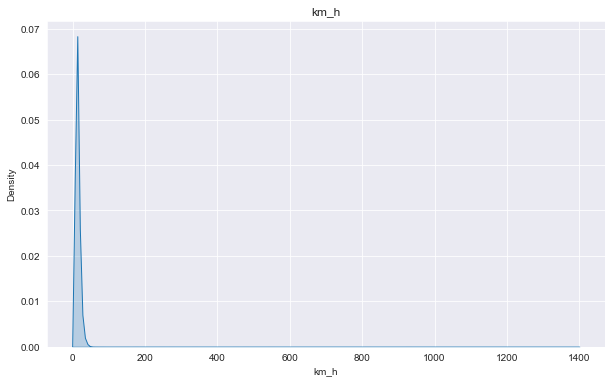

In [68]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("km_h")
sns.kdeplot(data=df_train['km_h'], shade=True)

In [69]:
df_train.sort_values(by='km_h', ascending=False)

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_pickup,time_dropoff,month_pickup,month_dropoff,date_pickup,date_dropoff,hour_pickup,hour_dropoff,elapsed_time_h,distance,km_h
1001028,603870,2,3,-73.922890,40.858200,-73.925850,40.851521,0,2,612063513,612063515,6,6,12,12,6,6,0.00056,0.78335,1398.839286
1107,266101,2,3,-73.827660,40.716175,-73.822113,40.711452,0,2,623133648,623133650,6,6,23,23,13,13,0.00056,0.70306,1255.464286
898154,678968,2,1,-73.815674,40.700844,-73.783714,40.643608,0,20,528151419,528151439,5,5,28,28,15,15,0.00556,6.91154,1243.082734
777670,1213347,2,1,-73.806503,40.659634,-73.805756,40.651443,0,3,530171212,530171215,5,5,30,30,17,17,0.00083,0.91289,1099.867470
1322903,507447,2,5,-73.998352,40.708530,-73.986382,40.710381,0,4,117031156,117031200,1,1,17,17,3,3,0.00111,1.02974,927.693694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445887,827370,1,1,-73.776627,40.645245,-73.776627,40.645245,0,5,315114221,315114226,3,3,15,15,11,11,0.00139,0.00000,0.000000
331535,728786,1,1,-73.998726,40.728073,-73.998726,40.728073,0,144,501120735,501120959,5,5,1,1,12,12,0.04000,0.00000,0.000000
1290109,317938,1,1,-73.981979,40.743431,-73.981979,40.743431,0,1064,213161913,213163657,2,2,13,13,16,16,0.29556,0.00000,0.000000
525905,1029864,2,6,-73.971397,40.759331,-73.971397,40.759331,0,387,507010621,507011248,5,5,7,7,1,1,0.10750,0.00000,0.000000


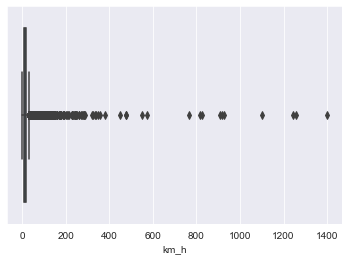

In [70]:
sns.boxplot(x = "km_h", orient = "v", data = df_train)
sns.set_style("darkgrid")
plt.show()

km/h도 IQR을 통해 이상치를 제거해 주도록 하겠습니다.
--

In [71]:
df_train=remove_outlier_test(df_train, 'km_h')

39195
(1238310, 20)


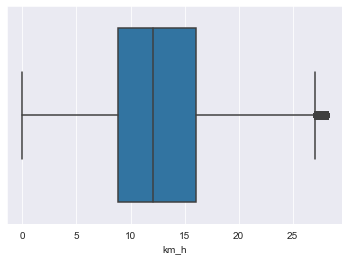

In [72]:
sns.boxplot(x = "km_h", orient = "v", data = df_train)
sns.set_style("darkgrid")
plt.show()

In [73]:
df_train.sort_values(by='km_h', ascending=False)

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_pickup,time_dropoff,month_pickup,month_dropoff,date_pickup,date_dropoff,hour_pickup,hour_dropoff,elapsed_time_h,distance,km_h
541905,1062024,2,1,-73.984962,40.753380,-73.976471,40.765491,0,195,112095922,112100237,1,1,12,12,9,10,0.05417,1.52488,28.149898
29262,14266,1,1,-73.967545,40.762836,-73.948647,40.794876,0,499,101182617,101183436,1,1,1,1,18,18,0.13861,3.90185,28.149845
552749,1152798,1,1,-73.972206,40.786415,-73.980652,40.774845,0,188,130084234,130084542,1,1,30,30,8,8,0.05222,1.46998,28.149751
791927,158403,1,1,-73.970238,40.759430,-73.939133,40.790901,0,559,325022325,325023244,3,3,25,25,2,2,0.15528,4.37109,28.149730
1388989,846572,1,1,-73.960403,40.770649,-73.982727,40.739582,0,503,110030930,110031753,1,1,10,10,3,3,0.13972,3.93308,28.149728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868949,589171,1,3,-73.992493,40.694107,-73.992493,40.694107,0,26,624214920,624214946,6,6,24,24,21,21,0.00722,0.00000,0.000000
1208895,209184,2,1,-73.923492,40.793667,-73.923492,40.793667,0,465,119111244,119112029,1,1,19,19,11,11,0.12917,0.00000,0.000000
700922,1279760,1,1,-73.952156,40.750343,-73.952156,40.750343,0,3,402055732,402055735,4,4,2,2,5,5,0.00083,0.00000,0.000000
227465,158134,1,1,-73.989845,40.733734,-73.989845,40.733734,0,25,517165941,517170006,5,5,17,17,16,17,0.00694,0.00000,0.000000


<AxesSubplot:title={'center':'km_h'}, xlabel='km_h', ylabel='Density'>

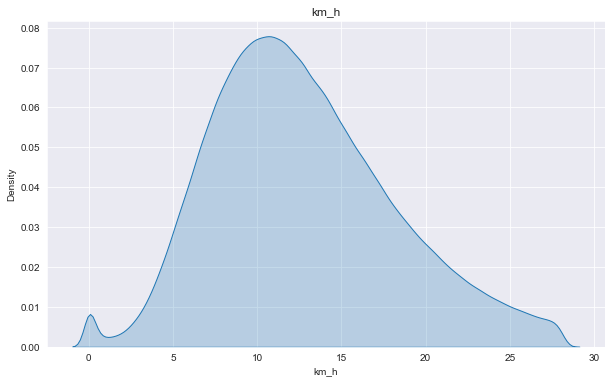

In [74]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("km_h")
sns.kdeplot(data=df_train['km_h'], shade=True)

나머지 특성보기
--

Trip_duration == elapsed_time_h
--

- trip duration: 1초 단위
- elapsed_time_h: 1시간 단위

<AxesSubplot:title={'center':'trip_duration'}, xlabel='trip_duration', ylabel='Density'>

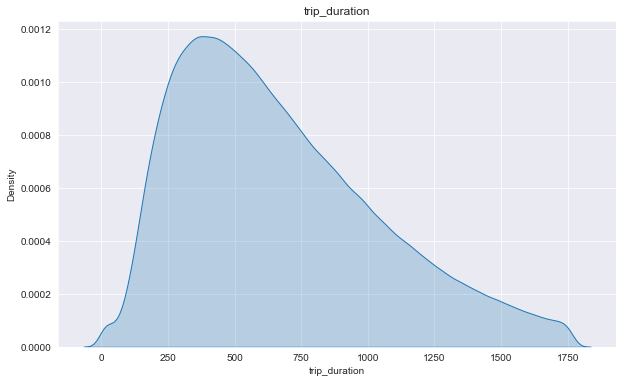

In [75]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("trip_duration")
sns.kdeplot(data=df_train['trip_duration'], shade=True)

- 단위: 초

store_and_fwd_flag ratio
--

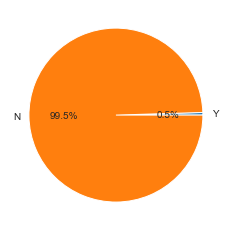

In [76]:
Y=len(df_train[df_train.store_and_fwd_flag==1].value_counts())
N=len(df_train[df_train.store_and_fwd_flag==0].value_counts())
store_and_fwd_flag=len(df_train.store_and_fwd_flag)

store_and_fwd_flag_ratio=[Y, N]
labels=['Y','N']

plt.pie(store_and_fwd_flag_ratio, labels=labels, autopct='%.1f%%')
plt.show()

- This flag indicates whether the trip record was held in vehicle memory before 

- sending to the vendor because the vehicle did not have a connection to the server

- Y=store and forward; N=not a store and forward trip


- store and forward 방식: 패킷교환에서 채택한 축적 교환(Store-and-Forward) 방식은 일단 들어오는 데이터를 버퍼에 담아두고(Store) CRC 등 에러검출과 같은 처리를 완전히 한 이후에 전달(Forward)하는 교환 기법이다.



vendor_id
--

- a code indicating the provider associated with the trip record

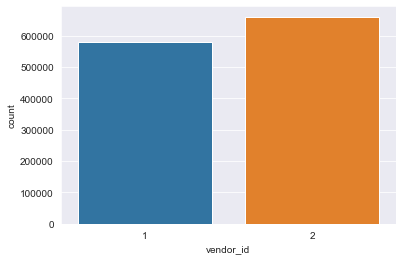

In [77]:
sns.countplot(df_train.vendor_id)
plt.show()

passenger_count
--

- passenger_count - the number of passengers in the vehicle (driver entered value)

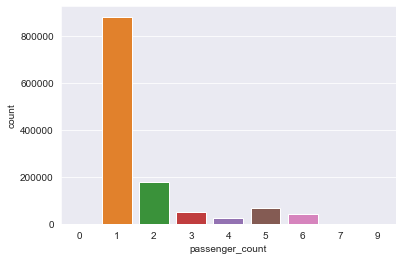

In [78]:
sns.countplot(df_train.passenger_count)
plt.show()

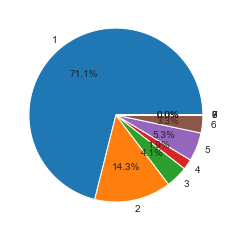

In [79]:
p1=len(df_train[df_train.passenger_count==1].value_counts())
p2=len(df_train[df_train.passenger_count==2].value_counts())
p3=len(df_train[df_train.passenger_count==3].value_counts())
p4=len(df_train[df_train.passenger_count==4].value_counts())
p5=len(df_train[df_train.passenger_count==5].value_counts())
p6=len(df_train[df_train.passenger_count==6].value_counts())
p7=len(df_train[df_train.passenger_count==7].value_counts())
p8=len(df_train[df_train.passenger_count==8].value_counts())
p9=len(df_train[df_train.passenger_count==9].value_counts())

pc=len(df_train.passenger_count)

passenger_count_ratio=[p1, p2, p3, p4, p5, p6, p7, p8, p9]
labels=['1','2','3','4','5','6','7','8','9']

plt.pie(passenger_count_ratio, labels=labels, autopct='%.1f%%')
plt.show()

In [80]:
def bar_chart2(feature):
    no_passenger = df_train[df_train['passenger_count'] ==1][feature].value_counts() # 생존자를 카운트
    passenger= df_train[df_train['passenger_count'] !=1][feature].value_counts() #사망자를 카운트
    df = pd.DataFrame([no_passenger,passenger]) #[생존자,사망자]를 dataFrame
    df.index = ['NO','YES'] # index화
    df.plot(kind = 'bar',stacked = True, figsize = (10,5)) #그림을 그림

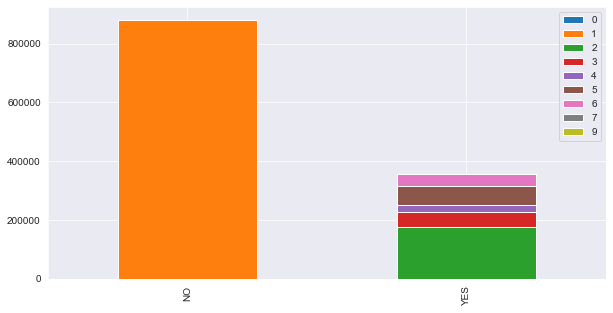

In [81]:
bar_chart2('passenger_count')

탑승 거리와 탑승 소요시간 상관관계 확인하기
--

<AxesSubplot:xlabel='distance', ylabel='elapsed_time_h'>

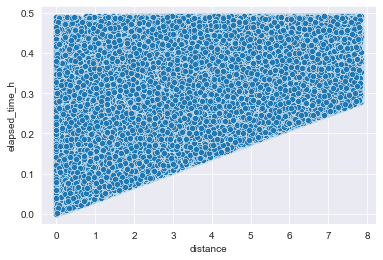

In [82]:
time_distance=df_train.groupby(['id'])['distance','elapsed_time_h'].sum().reset_index()
sns.scatterplot(time_distance['distance'], time_distance['elapsed_time_h'])

선형 회귀분석으로 분석해보겠습니다.
--

In [83]:
X=time_distance.distance
y=time_distance.elapsed_time_h

X=np.array(X).reshape(-1,1)
y=np.array(y).reshape(-1,1)

print(X.shape)
print(y.shape)

(1238310, 1)
(1238310, 1)


훈련데이터와 테스트 데이터 나누기

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(990648, 1)
(247662, 1)
(990648, 1)
(247662, 1)


- train 점수 보기

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

reg_1=LinearRegression()
reg_1.fit(X_train, y_train)

y_train_pred=reg_1.predict(X_train)
rmse=(np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2=round(reg_1.score(X_train, y_train),2)

print('rmse는', format(rmse), '입니다.')
print('r2는', format(r2), '입니다.')
print('train 스코어는', format(reg_1.score(X_train, y_train)), '입니다.')

rmse는 0.07330920965460454 입니다.
r2는 0.51 입니다.
train 스코어는 0.5068047925581036 입니다.


- test 점수 보기

In [86]:
y_pred_test=reg_1.predict(X_test)
rmse=(np.sqrt(mean_squared_error(y_test, y_pred_test)))
r2=round(reg_1.score(X_test, y_test), 2)

print('rmse는', format(rmse), '입니다.')
print('r2는', format(r2), '입니다.')
print('test 스코어는', format(reg_1.score(X_test, y_test)), '입니다.')

rmse는 0.07326881479022741 입니다.
r2는 0.51 입니다.
test 스코어는 0.5061148510707626 입니다.


In [87]:
import statsmodels.api as sm

# 변수들에 상수항을 추가함
X_constant=sm.add_constant(X)

model_1=sm.OLS(y,X_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                 1.272e+06
Date:                Wed, 12 May 2021   Prob (F-statistic):               0.00
Time:                        12:25:28   Log-Likelihood:             1.4788e+06
No. Observations:             1238310   AIC:                        -2.958e+06
Df Residuals:                 1238308   BIC:                        -2.958e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0768      0.000    656.018      0.000       0.077       0.077
x1             0.0482   4.28e-05   1127.741      0.000       0.048       0.048
==============================================================================
Omnibus:                   211460.176   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           371151.875
Skew:                           1.108   Prob(JB):                         0.00
Kurtosis:                       4.511   Cond. No.                         5.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
from sklearn.metrics import mean_squared_error , r2_score

# Linear Regression OLS(ordinary Least Square(OLS) method/ Error function을 gradient method)로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train ) # model이 train을 하여라.
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)  
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 0.005 , RMSE : 0.073
Variance score : 0.506


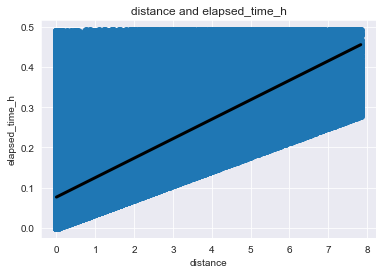

In [89]:
prediction_space=np.linspace(min(X), max(X)).reshape(-1,1)
plt.scatter(X,y)
plt.plot(prediction_space, reg_1.predict(prediction_space), color='black', linewidth=3)
plt.ylabel('elapsed_time_h')
plt.xlabel('distance')
plt.title('distance and elapsed_time_h')
plt.show()

평균 속도와 탑승 소요시간 상관관계 확인하기
--

<AxesSubplot:xlabel='km_h', ylabel='elapsed_time_h'>

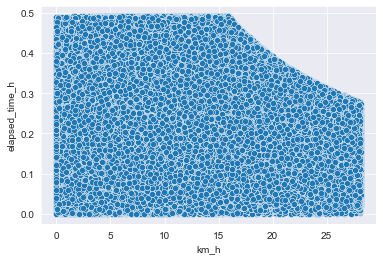

In [90]:
speed_time=df_train.groupby(['id'])['km_h','elapsed_time_h'].sum().reset_index()
sns.scatterplot(speed_time['km_h'], speed_time['elapsed_time_h'])

선형 회귀분석으로 분석해보겠습니다.
--

In [91]:
X=speed_time.km_h
y=speed_time.elapsed_time_h

X=np.array(X).reshape(-1,1)
y=np.array(y).reshape(-1,1)

print(X.shape)
print(y.shape)

(1238310, 1)
(1238310, 1)


훈련데이터와 테스트 데이터 나누기

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(990648, 1)
(247662, 1)
(990648, 1)
(247662, 1)


train 점수 보기

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

reg_1=LinearRegression()
reg_1.fit(X_train, y_train)

y_train_pred=reg_1.predict(X_train)
rmse=(np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2=round(reg_1.score(X_train, y_train),2)

print('rmse는', format(rmse), '입니다.')
print('r2는', format(r2), '입니다.')
print('train 스코어는', format(reg_1.score(X_train, y_train)), '입니다.')

rmse는 0.10267509195327042 입니다.
r2는 0.03 입니다.
train 스코어는 0.032542325956203655 입니다.


- test 점수 보기

In [94]:
y_pred_test=reg_1.predict(X_test)
rmse=(np.sqrt(mean_squared_error(y_test, y_pred_test)))
r2=round(reg_1.score(X_test, y_test), 2)

print('rmse는', format(rmse), '입니다.')
print('r2는', format(r2), '입니다.')
print('test 스코어는', format(reg_1.score(X_test, y_test)), '입니다.')

rmse는 0.10255938188637383 입니다.
r2는 0.03 입니다.
test 스코어는 0.03230516305662334 입니다.


In [95]:
import statsmodels.api as sm

# 변수들에 상수항을 추가함
X_constant=sm.add_constant(X)

model_1=sm.OLS(y,X_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                 4.160e+04
Date:                Wed, 12 May 2021   Prob (F-statistic):               0.00
Time:                        12:25:35   Log-Likelihood:             1.0618e+06
No. Observations:             1238310   AIC:                        -2.124e+06
Df Residuals:                 1238308   BIC:                        -2.124e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2301      0.000    977.865      0.000       0.230       0.231
x1            -0.0035    1.7e-05   -203.956      0.000      -0.004      -0.003
==============================================================================
Omnibus:                    82566.544   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            99797.847
Skew:                           0.692   Prob(JB):                         0.00
Kurtosis:                       2.862   Cond. No.                         35.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
from sklearn.metrics import mean_squared_error , r2_score

# Linear Regression OLS(ordinary Least Square(OLS) method/ Error function을 gradient method)로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train ) # model이 train을 하여라.
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)  
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 0.011 , RMSE : 0.103
Variance score : 0.032


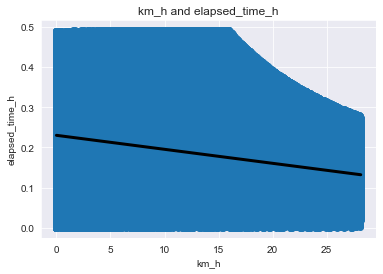

In [97]:
prediction_space=np.linspace(min(X), max(X)).reshape(-1,1)
plt.scatter(X,y)
plt.plot(prediction_space, reg_1.predict(prediction_space), color='black', linewidth=3)
plt.ylabel('elapsed_time_h')
plt.xlabel('km_h')
plt.title('km_h and elapsed_time_h')
plt.show()

탑승 거리와 평균 속도 상관관계 확인하기
--

<AxesSubplot:xlabel='distance', ylabel='km_h'>

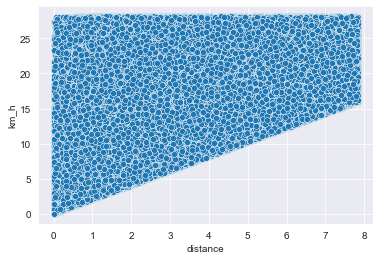

In [98]:
distance_speed=df_train.groupby(['id'])['distance','km_h'].sum().reset_index()
sns.scatterplot(distance_speed['distance'], distance_speed['km_h'])

In [99]:
X=distance_speed.distance
y=distance_speed.km_h

X=np.array(X).reshape(-1,1)
y=np.array(y).reshape(-1,1)

print(X.shape)
print(y.shape)

(1238310, 1)
(1238310, 1)


- train 데이터와 test 데이터로 나누기

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(990648, 1)
(247662, 1)
(990648, 1)
(247662, 1)


- train 점수보기

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

reg_1=LinearRegression()
reg_1.fit(X_train, y_train)

y_train_pred=reg_1.predict(X_train)
rmse=(np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2=round(reg_1.score(X_train, y_train),2)

print('rmse는', format(rmse), '입니다.')
print('r2는', format(r2), '입니다.')
print('train 스코어는', format(reg_1.score(X_train, y_train)), '입니다.')

rmse는 4.7976248713298 입니다.
r2는 0.22 입니다.
train 스코어는 0.21533208217396638 입니다.


- test 점수 보기

In [102]:
y_pred_test=reg_1.predict(X_test)
rmse=(np.sqrt(mean_squared_error(y_test, y_pred_test)))
r2=round(reg_1.score(X_test, y_test), 2)

print('rmse는', format(rmse), '입니다.')
print('r2는', format(r2), '입니다.')
print('test 스코어는', format(reg_1.score(X_test, y_test)), '입니다.')

rmse는 4.807130047724297 입니다.
r2는 0.22 입니다.
test 스코어는 0.21663786045400046 입니다.


In [103]:
import statsmodels.api as sm

# 변수들에 상수항을 추가함
X_constant=sm.add_constant(X)

model_1=sm.OLS(y,X_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                 3.404e+05
Date:                Wed, 12 May 2021   Prob (F-statistic):               0.00
Time:                        12:25:41   Log-Likelihood:            -3.6994e+06
No. Observations:             1238310   AIC:                         7.399e+06
Df Residuals:                 1238308   BIC:                         7.399e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0180      0.008   1176.569      0.000       9.003       9.033
x1             1.6342      0.003    583.412      0.000       1.629       1.640
==============================================================================
Omnibus:                    94664.672   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           117773.591
Skew:                           0.737   Prob(JB):                         0.00
Kurtosis:                       3.328   Cond. No.                         5.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
from sklearn.metrics import mean_squared_error , r2_score

# Linear Regression OLS(ordinary Least Square(OLS) method/ Error function을 gradient method)로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train ) # model이 train을 하여라.
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)  
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 23.108 , RMSE : 4.807
Variance score : 0.217


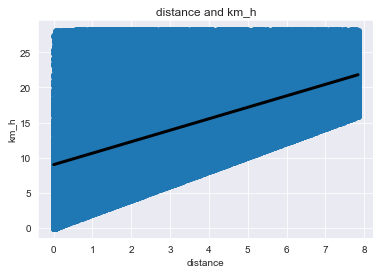

In [105]:
prediction_space=np.linspace(min(X), max(X)).reshape(-1,1)
plt.scatter(X,y)
plt.plot(prediction_space, reg_1.predict(prediction_space), color='black', linewidth=3)
plt.ylabel('km_h')
plt.xlabel('distance')
plt.title('distance and km_h')
plt.show()

거리, 속력, 시간 상관관계 보기
--

In [106]:
df_1=df_train.groupby(['id'])['elapsed_time_h', 'distance','km_h'].sum().reset_index()

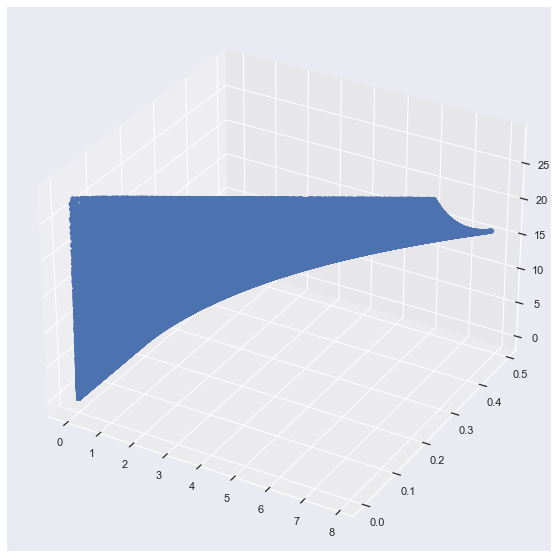

In [107]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

time=np.array(df_1.elapsed_time_h)
distance=np.array(df_1.distance)
speed=np.array(df_1.km_h)

xs=distance
ys=time
zs=speed

sns.set(style="darkgrid")

fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(xs,ys,zs,marker='o', s=15, cmap=plt.cm.rainbow)


- x: distance(km)
- y: time(elapsed_time_h)
- z: speed(km/h)

지도학습
--

모든 변수를 포함한 Regression Model 만들기
--

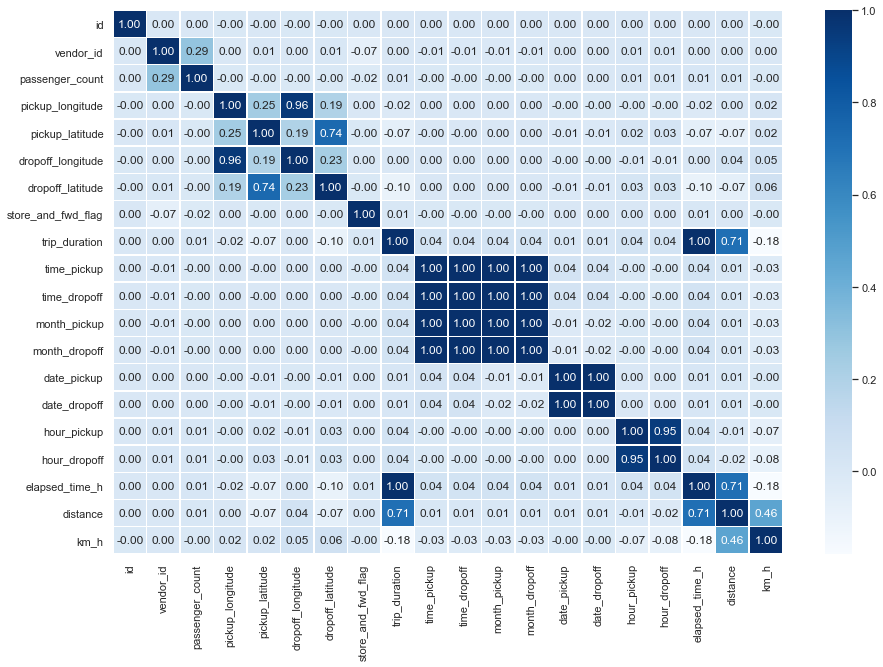

In [108]:
df_train.corr()
plt.figure(figsize=(15,10))
sns.heatmap(data=df_train.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

- trip_duration은 1초 단위, elapsed_time_h는 1시간 단위로 단위 차이만 있고,
- 내용 차이는 없음. 

In [109]:
df_train

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_pickup,time_dropoff,month_pickup,month_dropoff,date_pickup,date_dropoff,hour_pickup,hour_dropoff,elapsed_time_h,distance,km_h
0,1049145,2,1,-73.982155,40.767937,-73.964630,40.765602,0,455,314172455,314173230,3,3,14,14,17,17,0.12639,1.49852,11.856318
1,867655,1,1,-73.980415,40.738564,-73.999481,40.731152,0,663,612004335,612005438,6,6,12,12,0,0,0.18417,1.80551,9.803497
3,1278209,2,1,-74.010040,40.719971,-74.012268,40.706718,0,429,406193231,406193940,4,4,6,6,19,19,0.11917,1.48550,12.465386
4,796092,2,1,-73.973053,40.793209,-73.972923,40.782520,0,435,326133055,326133810,3,3,26,26,13,13,0.12083,1.18859,9.836878
5,292637,2,6,-73.982857,40.742195,-73.992081,40.749184,0,443,130220140,130220903,1,1,30,30,22,22,0.12306,1.09894,8.930115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458637,701152,1,1,-73.975357,40.751705,-73.949478,40.776764,0,760,417184816,417190056,4,4,17,17,18,19,0.21111,3.53756,16.756951
1458638,530918,2,5,-73.988823,40.736553,-73.989166,40.757393,0,414,202003939,202004633,2,2,2,2,0,0,0.11500,2.31745,20.151739
1458639,867169,2,4,-73.982201,40.745522,-73.994911,40.740170,0,778,408133104,408134402,4,4,8,8,13,13,0.21611,1.22508,5.668780
1458642,990387,1,1,-73.982079,40.749062,-73.974632,40.757107,0,373,105155626,105160239,1,1,5,5,15,16,0.10361,1.09256,10.544928


- elapsed_time_h, month_pickup, month_dropoff, date_pickup, date_dropoff, hour_pickup, hour_dropoff 칼럼 제거

In [110]:
df_train.drop('month_pickup', axis=1, inplace=True)
df_train.drop('month_dropoff', axis=1, inplace=True)
df_train.drop('date_pickup', axis=1, inplace=True)
df_train.drop('date_dropoff', axis=1, inplace=True)
df_train.drop('hour_pickup', axis=1, inplace=True)
df_train.drop('hour_dropoff', axis=1, inplace=True)
df_train.drop('elapsed_time_h', axis=1, inplace=True)

In [111]:
df_train

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_pickup,time_dropoff,distance,km_h
0,1049145,2,1,-73.982155,40.767937,-73.964630,40.765602,0,455,314172455,314173230,1.49852,11.856318
1,867655,1,1,-73.980415,40.738564,-73.999481,40.731152,0,663,612004335,612005438,1.80551,9.803497
3,1278209,2,1,-74.010040,40.719971,-74.012268,40.706718,0,429,406193231,406193940,1.48550,12.465386
4,796092,2,1,-73.973053,40.793209,-73.972923,40.782520,0,435,326133055,326133810,1.18859,9.836878
5,292637,2,6,-73.982857,40.742195,-73.992081,40.749184,0,443,130220140,130220903,1.09894,8.930115
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458637,701152,1,1,-73.975357,40.751705,-73.949478,40.776764,0,760,417184816,417190056,3.53756,16.756951
1458638,530918,2,5,-73.988823,40.736553,-73.989166,40.757393,0,414,202003939,202004633,2.31745,20.151739
1458639,867169,2,4,-73.982201,40.745522,-73.994911,40.740170,0,778,408133104,408134402,1.22508,5.668780
1458642,990387,1,1,-73.982079,40.749062,-73.974632,40.757107,0,373,105155626,105160239,1.09256,10.544928


In [112]:
U=df_train.drop('trip_duration', axis=1)
X=U.drop('time_dropoff', axis=1)
y=df_train.trip_duration

print(X.shape)
print(y.shape)

(1238310, 11)
(1238310,)


In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(990648, 11)
(247662, 11)
(990648,)
(247662,)


In [114]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

reg_all=LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression()

- train 점수 보기

In [115]:
y_train_pred=reg_all.predict(X_train)
rmse=(np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2=round(reg_all.score(X_train, y_train), 2)

print('rmse 는', format(rmse), '입니다.')
print('r2 는', format(r2), '입니다.')
print('train 스코어는', format(reg_all.score(X_train, y_train)), '입니다.')

rmse 는 150.28648455010253 입니다.
r2 는 0.84 입니다.
train 스코어는 0.8400292959772893 입니다.


In [116]:
y_train #실제 정답

770209     957
759045     290
409298     765
270561     279
890549     472
          ... 
129839     523
305347     308
155410     939
790917     433
143616    1265
Name: trip_duration, Length: 990648, dtype: int64

In [117]:
y_train_pred.reshape(-1,1) # 모델이 예측한 정답

array([[1037.02477071],
       [ 347.54027207],
       [ 810.06389628],
       ...,
       [ 776.57747389],
       [ 525.21708168],
       [1123.26788563]])

- test 점수 보기

In [118]:
y_test_pred=reg_all.predict(X_test)
rmse=(np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2=round(reg_all.score(X_test, y_test), 2)

print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(reg_all.score(X_test, y_test)), '입니다.')

rmse 점수는 149.79522956951325 입니다.
r2 점수는 0.84 입니다.
test 스코어는 0.8408690277501272 입니다.


In [119]:
y_test # 실제 정답

650631      664
865548      330
801684      471
334931      626
1438227    1346
           ... 
368740     1182
1392618     929
1182403     658
701086      326
19410       946
Name: trip_duration, Length: 247662, dtype: int64

In [120]:
y_test_pred.reshape(-1,1) # 모델이 예측한 정답

array([[674.75497483],
       [515.22546067],
       [519.5602481 ],
       ...,
       [681.41182396],
       [226.59142596],
       [899.75199587]])

In [121]:
import statsmodels.api as sm

# 변수들에 상수항을 추가함
X_constant=sm.add_constant(X)

model_1=sm.OLS(y,X_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                 5.919e+05
Date:                Wed, 12 May 2021   Prob (F-statistic):               0.00
Time:                        12:26:10   Log-Likelihood:            -7.9633e+06
No. Observations:             1238310   AIC:                         1.593e+07
Df Residuals:                 1238298   BIC:                         1.593e+07
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.441e+04    298.748    -48.228      0.000    -1.5e+04   -1.38e+04
id                 -6.016e-08   3.21e-07     -0.188      0.851   -6.89e-07    5.68e-07
vendor_id              1.7236      0.283      6.080      0.000       1.168       2.279
passenger_count        0.4341      0.107      4.039      0.000       0.223       0.645
pickup_longitude     301.4266      8.307     36.284      0.000     285.144     317.709
pickup_latitude      160.0440      8.374     19.113      0.000     143.632     176.456
dropoff_longitude   -363.6108      8.243    -44.109      0.000    -379.768    -347.454
dropoff_latitude      96.9528      7.717     12.563      0.000      81.828     112.078
store_and_fwd_flag    -5.5588      1.957     -2.840      0.005      -9.395      -1.723
time_pickup         3.548e-08   8.04e-10     44.137      0.000    3.39e-08    3.71e-08
distance             248.3979      0.101   2469.478      0.000     248.201     248.595
km_h                 -45.1451      0.028  -1595.181      0.000     -45.201     -45.090
==============================================================================
Omnibus:                   236919.245   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1083712.085
Skew:                           0.870   Prob(JB):                         0.00
Kurtosis:                       7.240   Cond. No.                     8.90e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.9e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [122]:
from sklearn.metrics import mean_squared_error , r2_score

# Linear Regression OLS(ordinary Least Square(OLS) method/ Error function을 gradient method)로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train ) # model이 train을 하여라.
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)  
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 22438.611 , RMSE : 149.795
Variance score : 0.841


In [123]:
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X.columns )
coeff.sort_values(ascending=False)

pickup_longitude      302.9
distance              248.5
pickup_latitude       153.6
dropoff_latitude       90.4
vendor_id               1.6
passenger_count         0.4
time_pickup             0.0
id                     -0.0
store_and_fwd_flag     -7.6
km_h                  -45.2
dropoff_longitude    -355.8
dtype: float64

Text(0.5, 1.0, 'Feature Coeff')

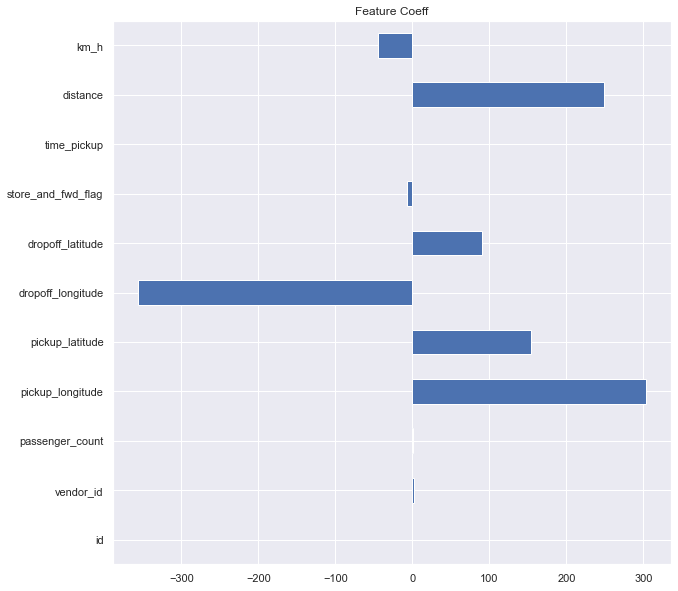

In [124]:
fia, ax=plt.subplots(figsize=(10,10))
coeff.plot.barh()

ax.set_title("Feature Coeff")

In [125]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error , r2_score

lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print('lr train score: {:.3f}'.format(lr.score(X_train, y_train)))
print('lr test score: {:.3f}'.format(lr.score(X_test, y_test)))
print('lr mse: {:.3f}'.format(mse))
print('lr rmse: {:.3f}'.format(rmse))
print('\n')


ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred=ridge.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print('ridge train score: {:.3f}'.format(ridge.score(X_train, y_train)))
print('ridge test score: {:.3f}'.format(ridge.score(X_test, y_test)))
print('ridge mse: {:.3f}'.format(mse))
print('ridge rmse: {:.3f}'.format(rmse))
print('\n')

lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred=lasso.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print('lasso train score: {:.3f}'.format(lasso.score(X_train, y_train)))
print('lasso test score: {:.3f}'.format(lasso.score(X_test, y_test)))
print('lasso mse: {:.3f}'.format(mse))
print('lasso rmse: {:.3f}'.format(rmse))
print('\n')


elasticnet = ElasticNet()
elasticnet.fit(X_train, y_train)
y_pred=elasticnet.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print('elasticnet train score: {:.3f}'.format(elasticnet.score(X_train, y_train)))
print('elasticnet test score: {:.3f}'.format(elasticnet.score(X_test, y_test)))
print('elasticnet mse: {:.3f}'.format(mse))
print('elasticnet rmse: {:.3f}'.format(rmse))

lr train score: 0.840
lr test score: 0.841
lr mse: 22438.611
lr rmse: 149.795


ridge train score: 0.840
ridge test score: 0.841
ridge mse: 22438.651
ridge rmse: 149.795


lasso train score: 0.839
lasso test score: 0.840
lasso mse: 22546.295
lasso rmse: 150.154


elasticnet train score: 0.801
elasticnet test score: 0.803
elasticnet mse: 27845.463
elasticnet rmse: 166.870


TEST 데이터프레임을 통해 SampleSubmission의 Trip_duration 대입
--

In [126]:
df_test

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,time_pickup,month_pickup,date_pickup,hour_pickup,day_pickup
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,630235958,6,30,23,Thursday
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,630235953,6,30,23,Thursday
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,630235947,6,30,23,Thursday
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,630235941,6,30,23,Thursday
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,630235933,6,30,23,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,2016-01-01 00:02:52,1,-74.003464,40.725105,-74.001251,40.733643,N,101000252,1,1,0,Friday
625130,id3700764,1,2016-01-01 00:01:52,1,-74.006363,40.743782,-73.953407,40.782467,N,101000152,1,1,0,Friday
625131,id2568735,1,2016-01-01 00:01:24,2,-73.972267,40.759865,-73.876602,40.748665,N,101000124,1,1,0,Friday
625132,id1384355,1,2016-01-01 00:00:28,1,-73.976501,40.733562,-73.854263,40.891788,N,101000028,1,1,0,Friday


In [127]:
df_sample_submission

,id,trip_duration
0,id3004672,959
1,id3505355,959
2,id1217141,959
3,id2150126,959
4,id1598245,959
...,...,...
625129,id3008929,959
625130,id3700764,959
625131,id2568735,959
625132,id1384355,959


거리 데이터 생성해주기

In [128]:
import numbers
import math

class GeoUtil:
    def degree2radius(degree):
        return degree*(math.pi/180)
    def get_harvevrsion_distance(x1,y1,x2,y2,round_decimal_digits=5):
        R=6371 # 지구의 반경(단위: km)
        dLon=GeoUtil.degree2radius(x2-x1)
        dLat=GeoUtil.degree2radius(y2-y1)
        
        a=math.sin(dLat/2)*math.sin(dLat/2)\
          +(math.cos(GeoUtil.degree2radius(y1))\
           *math.cos(GeoUtil.degree2radius(y2))\
           *math.sin(dLon/2)*math.sin(dLon/2))
                     
        b=2*math.atan2(math.sqrt(a), math.sqrt(1-a))
        return round(R*b, round_decimal_digits)

In [129]:
# 임의로 칼럼 만들기
df_test['distance']=df_test.id

In [130]:
df_test.iloc[:, 4:8]

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,-73.988129,40.732029,-73.990173,40.756680
1,-73.964203,40.679993,-73.959808,40.655403
2,-73.997437,40.737583,-73.986160,40.729523
3,-73.956070,40.771900,-73.986427,40.730469
4,-73.970215,40.761475,-73.961510,40.755890
...,...,...,...,...
625129,-74.003464,40.725105,-74.001251,40.733643
625130,-74.006363,40.743782,-73.953407,40.782467
625131,-73.972267,40.759865,-73.876602,40.748665
625132,-73.976501,40.733562,-73.854263,40.891788


거리 칼럼 생성

In [131]:
i=0
d=[]

for i in range(0,625134):
    x1=df_test.iloc[i, 4]
    y1=df_test.iloc[i, 5]
    x2=df_test.iloc[i, 6]
    y2=df_test.iloc[i, 7]
    
    dis=GeoUtil.get_harvevrsion_distance(x1,y1,x2,y2)
    d.append(dis)
    
    i+=1

In [132]:
d=pd.Series(d)
df_test['distance']=d

In [133]:
df_test['distance']

0          2.74643
1          2.75924
2          1.30616
3          5.26909
4          0.96084
            ...   
625129     0.96744
625130     6.19634
625131     8.15372
625132    20.38075
625133     5.93202
Name: distance, Length: 625134, dtype: float64

<AxesSubplot:>

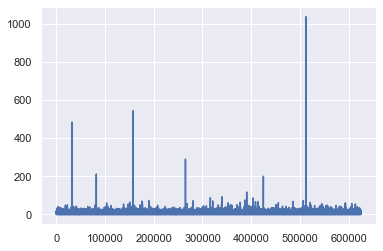

In [134]:
df_test.distance.plot()

<AxesSubplot:title={'center':'distance'}, xlabel='distance', ylabel='Density'>

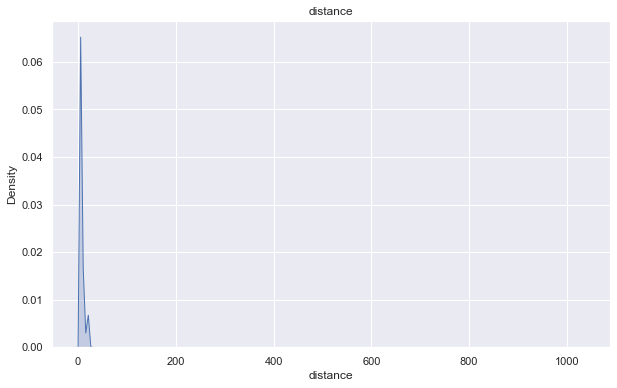

In [135]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("distance")
sns.kdeplot(data=df_test['distance'], shade=True)

In [136]:
df_test.drop('month_pickup', axis=1, inplace=True)
df_test.drop('date_pickup', axis=1, inplace=True)
df_test.drop('hour_pickup', axis=1, inplace=True)
df_test.drop('day_pickup', axis=1, inplace=True)

In [137]:
df_test.drop('pickup_datetime', axis=1, inplace=True)

In [138]:
df_test

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,time_pickup,distance
0,id3004672,1,1,-73.988129,40.732029,-73.990173,40.756680,N,630235958,2.74643
1,id3505355,1,1,-73.964203,40.679993,-73.959808,40.655403,N,630235953,2.75924
2,id1217141,1,1,-73.997437,40.737583,-73.986160,40.729523,N,630235947,1.30616
3,id2150126,2,1,-73.956070,40.771900,-73.986427,40.730469,N,630235941,5.26909
4,id1598245,1,1,-73.970215,40.761475,-73.961510,40.755890,N,630235933,0.96084
...,...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,1,-74.003464,40.725105,-74.001251,40.733643,N,101000252,0.96744
625130,id3700764,1,1,-74.006363,40.743782,-73.953407,40.782467,N,101000152,6.19634
625131,id2568735,1,2,-73.972267,40.759865,-73.876602,40.748665,N,101000124,8.15372
625132,id1384355,1,1,-73.976501,40.733562,-73.854263,40.891788,N,101000028,20.38075


Label Encoding

In [139]:
i=0
store_and_fwd_flag=[]

for i in range(0,625134):
    if df_test.store_and_fwd_flag[i]=='N':
        store_and_fwd_flag.append(0)
    else:
        store_and_fwd_flag.append(1)
        i+=1

In [140]:
store_and_fwd_flag=pd.Series(store_and_fwd_flag)
df_test['store_and_fwd_flag']=store_and_fwd_flag

In [141]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

df_test_encoded_id=le.fit_transform(df_test['id'])
np_id=df_test_encoded_id.reshape(-1,1)
id_1=map(lambda x:x[0], np_id)
id_1=pd.Series(id_1)

df_test['id']=id_1

In [142]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  625134 non-null  int64  
 1   vendor_id           625134 non-null  int64  
 2   passenger_count     625134 non-null  int64  
 3   pickup_longitude    625134 non-null  float64
 4   pickup_latitude     625134 non-null  float64
 5   dropoff_longitude   625134 non-null  float64
 6   dropoff_latitude    625134 non-null  float64
 7   store_and_fwd_flag  625134 non-null  int64  
 8   time_pickup         625134 non-null  int32  
 9   distance            625134 non-null  float64
dtypes: float64(5), int32(1), int64(4)
memory usage: 45.3 MB


In [143]:
df_sample_submission

,id,trip_duration
0,id3004672,959
1,id3505355,959
2,id1217141,959
3,id2150126,959
4,id1598245,959
...,...,...
625129,id3008929,959
625130,id3700764,959
625131,id2568735,959
625132,id1384355,959


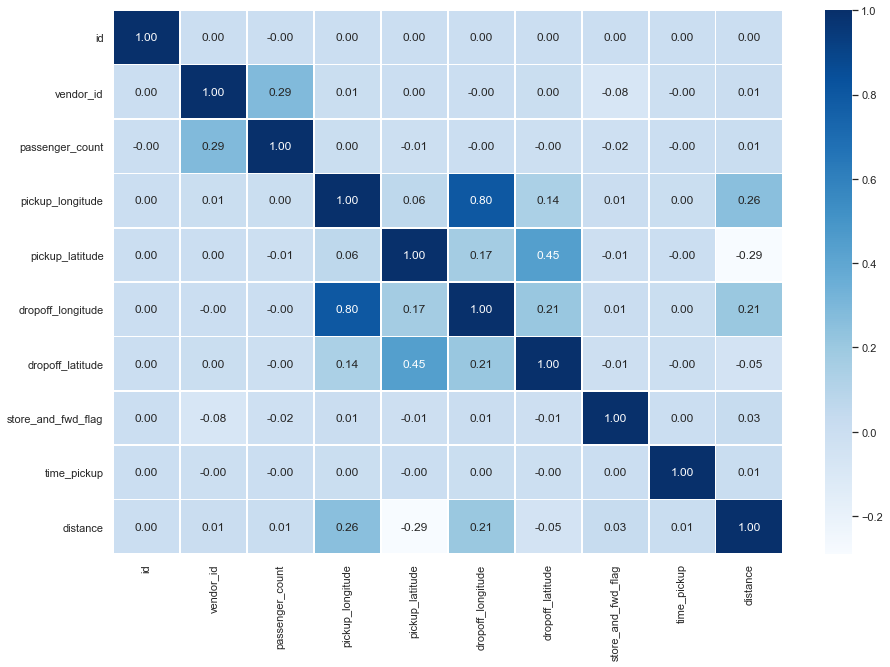

In [144]:
df_test.corr()
plt.figure(figsize=(15,10))
sns.heatmap(data=df_test.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

In [145]:
df_test

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,time_pickup,distance
0,469364,1,1,-73.988129,40.732029,-73.990173,40.756680,0,630235958,2.74643
1,547621,1,1,-73.964203,40.679993,-73.959808,40.655403,0,630235953,2.75924
2,190107,1,1,-73.997437,40.737583,-73.986160,40.729523,0,630235947,1.30616
3,335483,2,1,-73.956070,40.771900,-73.986427,40.730469,0,630235941,5.26909
4,249509,1,1,-73.970215,40.761475,-73.961510,40.755890,0,630235933,0.96084
...,...,...,...,...,...,...,...,...,...,...
625129,470064,1,1,-74.003464,40.725105,-74.001251,40.733643,0,101000252,0.96744
625130,578497,1,1,-74.006363,40.743782,-73.953407,40.782467,0,101000152,6.19634
625131,401488,1,2,-73.972267,40.759865,-73.876602,40.748665,0,101000124,8.15372
625132,216304,1,1,-73.976501,40.733562,-73.854263,40.891788,0,101000028,20.38075


In [146]:
#i=0
#trip_duration=[]
#
#for i in range(0,625134):
#    trip_duration.append(0)
#    i+=1

In [147]:
#trip_duration=pd.Series(trip_duration)
#df_test['trip_duration']=trip_duration

In [148]:
# df_test.drop(['trip_duration'], axis=1, inplace=True)

In [149]:
df_test.isna().sum()

id                    0
vendor_id             0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
time_pickup           0
distance              0
dtype: int64

In [150]:
# U=df_test.drop(['trip_duration'], axis=1)
X=df_test.drop(['time_pickup'], axis=1)
y=df_sample_submission.trip_duration

print(X.shape)
print(y.shape)

(625134, 9)
(625134,)


In [151]:
X

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance
0,469364,1,1,-73.988129,40.732029,-73.990173,40.756680,0,2.74643
1,547621,1,1,-73.964203,40.679993,-73.959808,40.655403,0,2.75924
2,190107,1,1,-73.997437,40.737583,-73.986160,40.729523,0,1.30616
3,335483,2,1,-73.956070,40.771900,-73.986427,40.730469,0,5.26909
4,249509,1,1,-73.970215,40.761475,-73.961510,40.755890,0,0.96084
...,...,...,...,...,...,...,...,...,...
625129,470064,1,1,-74.003464,40.725105,-74.001251,40.733643,0,0.96744
625130,578497,1,1,-74.006363,40.743782,-73.953407,40.782467,0,6.19634
625131,401488,1,2,-73.972267,40.759865,-73.876602,40.748665,0,8.15372
625132,216304,1,1,-73.976501,40.733562,-73.854263,40.891788,0,20.38075


In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(500107, 9)
(125027, 9)
(500107,)
(125027,)


In [153]:
#from sklearn.model_selection import train_test_split
#X_train, X_test= train_test_split(X, test_size=0.2, random_state=42)
#print(X_train.shape)
#print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

In [154]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

reg_all=LinearRegression()
reg_all.fit(X, y)

LinearRegression()

In [155]:
y_pred=[]
pred=reg_all.predict(X)
y_pred.append(pred)

#rmse=(np.sqrt(mean_squared_error(y_train, y_pred)))
#r2=round(reg_all.score(X_train, y_train), 2)

#print('rmse 는', format(rmse), '입니다.')
#print('r2 는', format(r2), '입니다.')
#print('train 스코어는', format(reg_all.score(X_train, y_train)), '입니다.')

In [156]:
y_pred=np.array(y_pred) 
y_pred.reshape(-1,1)

array([[959.],
       [959.],
       [959.],
       ...,
       [959.],
       [959.],
       [959.]])

In [157]:
y

0         959
1         959
2         959
3         959
4         959
         ... 
625129    959
625130    959
625131    959
625132    959
625133    959
Name: trip_duration, Length: 625134, dtype: int64

In [158]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

reg_all=LinearRegression()
reg_all.fit(X_test,y_test)

LinearRegression()

In [159]:
y_pred=reg_all.predict(X_test)
rmse=(np.sqrt(mean_squared_error(y_test, y_pred)))
r2=round(reg_all.score(X_test, y_test), 2)

print('rmse 는', format(rmse), '입니다.')
print('r2 는', format(r2), '입니다.')
print('test 스코어는', format(reg_all.score(X_test, y_test)), '입니다.')

rmse 는 0.0 입니다.
r2 는 1.0 입니다.
test 스코어는 1.0 입니다.


In [160]:
y_test #정답

556071    959
26039     959
462559    959
531432    959
442137    959
         ... 
565457    959
534153    959
50740     959
352728    959
389680    959
Name: trip_duration, Length: 125027, dtype: int64

In [161]:
y_pred.reshape(-1,1) #예측값

array([[959.],
       [959.],
       [959.],
       ...,
       [959.],
       [959.],
       [959.]])

In [162]:
import statsmodels.api as sm

# 변수들에 상수항을 추가함
X_constant=sm.add_constant(X)

model_1=sm.OLS(y,X_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                -6.946e+04
Date:                Wed, 12 May 2021   Prob (F-statistic):               1.00
Time:                        12:27:25   Log-Likelihood:             1.4187e+07
No. Observations:              625134   AIC:                        -2.837e+07
Df Residuals:                  625124   BIC:                        -2.837e+07
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                959.0000   9.27e-11   1.04e+13      0.000     959.000     959.000
id                  1.847e-18   2.36e-19      7.817      0.000    1.38e-18    2.31e-18
vendor_id            2.22e-13   8.95e-14      2.481      0.013    4.66e-14    3.97e-13
passenger_count    -1.665e-16   3.39e-14     -0.005      0.996   -6.67e-14    6.64e-14
pickup_longitude     7.39e-13   9.88e-13      0.748      0.454    -1.2e-12    2.67e-12
pickup_latitude    -3.617e-12    1.7e-12     -2.127      0.033   -6.95e-12   -2.85e-13
dropoff_longitude  -7.176e-13   1.01e-12     -0.710      0.478    -2.7e-12    1.26e-12
dropoff_latitude    2.871e-12   1.35e-12      2.132      0.033    2.31e-13    5.51e-12
store_and_fwd_flag  2.061e-13   5.79e-13      0.356      0.722   -9.29e-13    1.34e-12
distance           -1.066e-14   1.09e-14     -0.975      0.330   -3.21e-14    1.08e-14
==============================================================================
Omnibus:                   109827.007   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2343052.632
Skew:                           0.215   Prob(JB):                         0.00
Kurtosis:                      12.475   Cond. No.                     7.85e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.85e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [163]:
from sklearn.metrics import mean_squared_error , r2_score

# Linear Regression OLS(ordinary Least Square(OLS) method/ Error function을 gradient method)로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X ,y) # model이 train을 하여라.
y_preds = lr.predict(X)
mse = mean_squared_error(y, y_preds)  
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y, y_preds)))

MSE : 0.000 , RMSE : 0.000
Variance score : 1.000


In [164]:
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X.columns )
coeff.sort_values(ascending=False)

distance              0.0
store_and_fwd_flag    0.0
dropoff_latitude      0.0
dropoff_longitude     0.0
pickup_latitude       0.0
pickup_longitude      0.0
passenger_count       0.0
vendor_id             0.0
id                    0.0
dtype: float64

Text(0.5, 1.0, 'Feature Coeff')

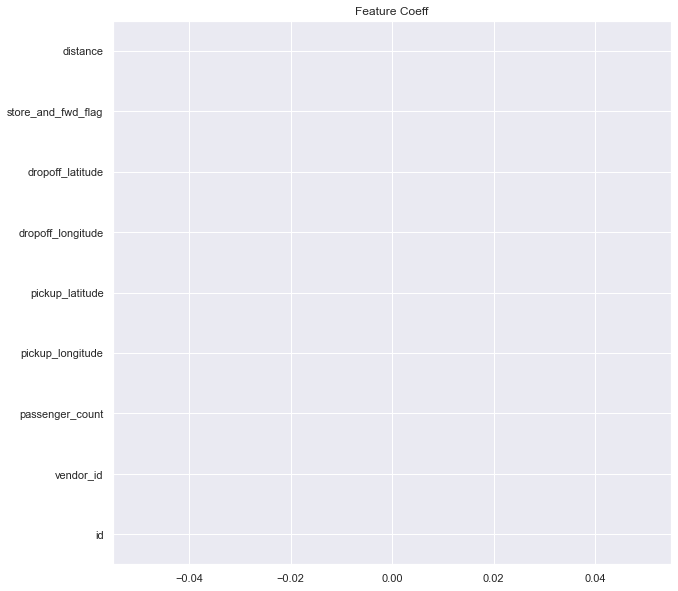

In [165]:
fia, ax=plt.subplots(figsize=(10,10))
coeff.plot.barh()

ax.set_title("Feature Coeff")

In [166]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error , r2_score

lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print('lr train score: {:.3f}'.format(lr.score(X_train, y_train)))
print('lr test score: {:.3f}'.format(lr.score(X_test, y_test)))
print('lr mse: {:.3f}'.format(mse))
print('lr rmse: {:.3f}'.format(rmse))
print('\n')


ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred=ridge.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print('ridge train score: {:.3f}'.format(ridge.score(X_train, y_train)))
print('ridge test score: {:.3f}'.format(ridge.score(X_test, y_test)))
print('ridge mse: {:.3f}'.format(mse))
print('ridge rmse: {:.3f}'.format(rmse))
print('\n')

lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred=lasso.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print('lasso train score: {:.3f}'.format(lasso.score(X_train, y_train)))
print('lasso test score: {:.3f}'.format(lasso.score(X_test, y_test)))
print('lasso mse: {:.3f}'.format(mse))
print('lasso rmse: {:.3f}'.format(rmse))
print('\n')


elasticnet = ElasticNet()
elasticnet.fit(X_train, y_train)
y_pred=elasticnet.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print('elasticnet train score: {:.3f}'.format(elasticnet.score(X_train, y_train)))
print('elasticnet test score: {:.3f}'.format(elasticnet.score(X_test, y_test)))
print('elasticnet mse: {:.3f}'.format(mse))
print('elasticnet rmse: {:.3f}'.format(rmse))

lr train score: 1.000
lr test score: 1.000
lr mse: 0.000
lr rmse: 0.000


ridge train score: 1.000
ridge test score: 1.000
ridge mse: 0.000
ridge rmse: 0.000


lasso train score: 1.000
lasso test score: 1.000
lasso mse: 0.000
lasso rmse: 0.000


elasticnet train score: 1.000
elasticnet test score: 1.000
elasticnet mse: 0.000
elasticnet rmse: 0.000


https://m.cafe.daum.net/taxirecall/OXcl/8

비지도학습
--

위도와 경도 분석하기
--

pickup_longitude와 pickup_latitude

<AxesSubplot:xlabel='pickup_longitude', ylabel='pickup_latitude'>

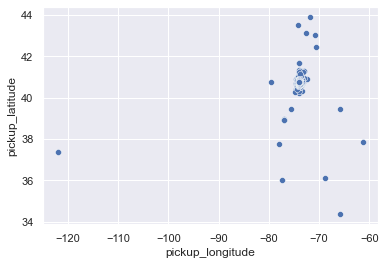

In [167]:
pickup=df_train.groupby(['id'])['pickup_longitude','pickup_latitude'].sum().reset_index()
sns.scatterplot(pickup['pickup_longitude'], pickup['pickup_latitude'])

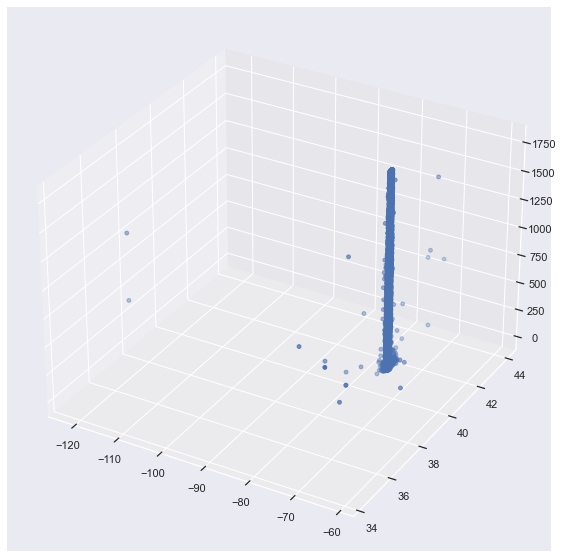

In [168]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

p_longitude=np.array(df_train.pickup_longitude)
p_latitude=np.array(df_train.pickup_latitude)
time=np.array(df_train.trip_duration)

xs=p_longitude
ys=p_latitude
zs=time

sns.set(style="darkgrid")

fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(xs,ys,zs,marker='o', s=15, cmap=plt.cm.rainbow)

- x: pickup_longitude
- y: pickup_latitude
- z: trip_duration

dropoff_longitude와 dropoff_latitude

<AxesSubplot:xlabel='dropoff_longitude', ylabel='dropoff_latitude'>

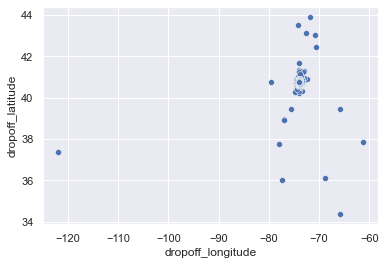

In [169]:
dropoff=df_train.groupby(['id'])['dropoff_longitude','dropoff_latitude'].sum().reset_index()
sns.scatterplot(dropoff['dropoff_longitude'], dropoff['dropoff_latitude'])

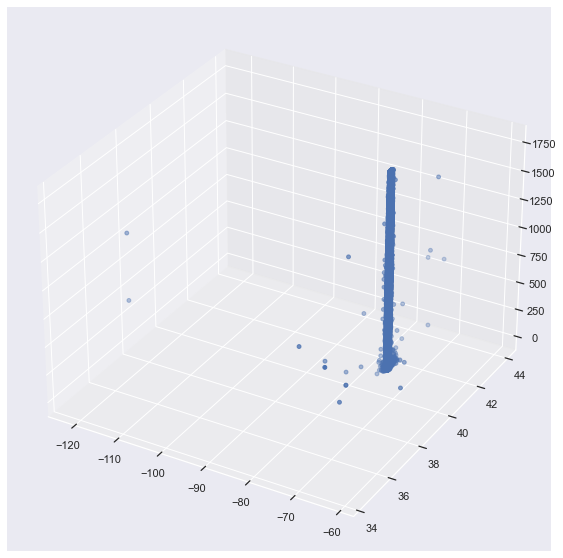

In [170]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

d_longitude=np.array(df_train.dropoff_longitude)
d_latitude=np.array(df_train.dropoff_latitude)
time=np.array(df_train.trip_duration)

xs=d_longitude
ys=d_latitude
zs=time

sns.set(style="darkgrid")

fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(xs,ys,zs,marker='o', s=15, cmap=plt.cm.rainbow)

Folium으로 지도 보기
--

In [171]:
U=df_train.drop('trip_duration', axis=1)
X=U.drop('time_dropoff', axis=1)
y=df_train.trip_duration

print(X.shape)
print(y.shape)

(1238310, 11)
(1238310,)


In [172]:
# !pip install folium

In [173]:
pickup=X[['pickup_latitude','pickup_longitude']]
dropoff=X[['dropoff_latitude','dropoff_longitude']]

In [174]:
pickup_list=pickup.values.tolist()
dropoff_list=dropoff.values.tolist()

In [175]:
df_train.pickup_latitude.mean()

40.75283605391636

In [176]:
df_train.pickup_longitude.mean()

-73.97983255798917

In [177]:
len(pickup_list)

1238310

지도 보기

In [178]:
import folium

lon, lat= -73.97983255798917, 40.75283605391636
zoom_start=11

f_map=folium.Map(location=[lat, lon], tiles='OpenStreetMap', zoom_start=zoom_start)

for point in np.random.choice(1238310, 100):
    folium.Marker(pickup_list[point], popup=pickup_list[point], icon=folium.Icon(color='blue')).add_to(f_map)
    folium.Marker(dropoff_list[point], popup=dropoff_list[point], icon=folium.Icon(color='green')).add_to(f_map)

f_map

- 파란 점: 출발 지점
- 초록 점: 도착 지점

pickup_longititude와 pickup_latitude
--

In [179]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=10)
kmeans.fit(X)

print(kmeans.labels_)

print(kmeans.predict(X))

[0 4 3 ... 3 2 3]
[0 4 3 ... 3 2 3]


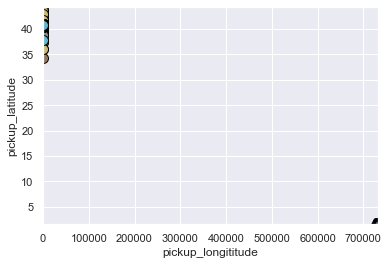

In [180]:
import matplotlib.pyplot as plt
import mglearn

mglearn.discrete_scatter(X.iloc[:, 3], X.iloc[:, 4], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    markers='^', markeredgewidth=2)

plt.xlabel("pickup_longititude")
plt.ylabel("pickup_latitude")
plt.show()

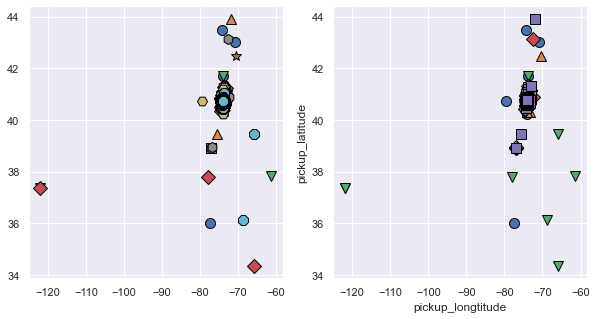

In [181]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 열 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X.iloc[:, 3], X.iloc[:, 4], assignments, ax=axes[0])

# 다섯 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X.iloc[:, 3], X.iloc[:, 4], assignments, ax=axes[1])
plt.xlabel("pickup_longtitude")
plt.ylabel("pickup_latitude")
plt.show()

In [182]:
# 훈련데이터와 테스트 데이터
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(990648, 11)
(247662, 11)
(990648,)
(247662,)


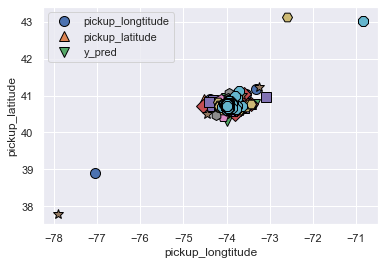

In [183]:
y_pred = KMeans(n_clusters=10, random_state=0).fit_predict(X_test)

mglearn.discrete_scatter(X_test.iloc[:, 3], X_test.iloc[:, 4], y_pred)
plt.legend(["pickup_longtitude", "pickup_latitude", "y_pred"], loc='best')
plt.xlabel("pickup_longtitude")
plt.ylabel("pickup_latitude")
plt.show()

Text(0, 0.5, 'pickup_latitude')

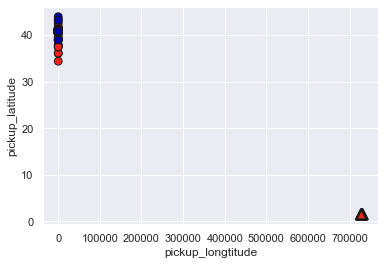

In [184]:
# 열 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 표시합니다
plt.scatter(X.iloc[:, 3], X.iloc[:, 4], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1), mglearn.cm2(2), mglearn.cm2(3),
                          mglearn.cm2(4), mglearn.cm2(5), mglearn.cm2(6), mglearn.cm2(7),
                          mglearn.cm2(8), mglearn.cm2(9)], s=100, linewidth=2, edgecolors='k')
plt.xlabel("pickup_longtitude")
plt.ylabel("pickup_latitude")

# c는 색상을 의미하며, s는 점 크기, marker는 표시할 마크 종류
# cmap은 palette
# edgecolors는 테두리색, linewidth는 두께

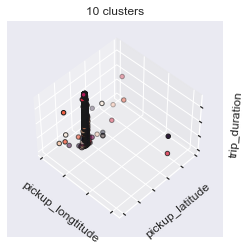

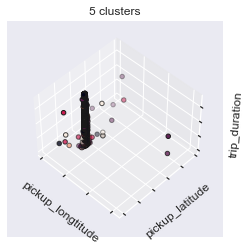

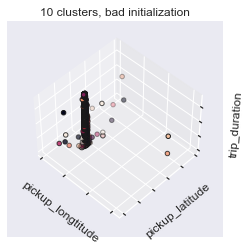

In [185]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(42)

estimators = [('k_means_10', KMeans(n_clusters=10)),
              ('k_means_5', KMeans(n_clusters=5)),
              ('k_means_bad_init', KMeans(n_clusters=10, n_init=10,
                                               init='random'))]

fignum = 1
titles = ['10 clusters', '5 clusters', '10 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X.iloc[:, 3], X.iloc[:, 4], y.iloc[:],
               c=labels.astype(float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([]) # 3차원 시각화 이기 때문에 w_x를 붙임
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('pickup_longtitude')
    ax.set_ylabel('pickup_latitude')
    ax.set_zlabel('trip_duration')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

dropoff_longtitude와 dropoff_latitude
--

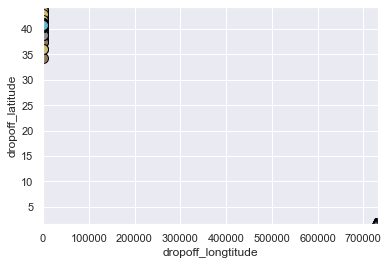

In [186]:
import matplotlib.pyplot as plt
import mglearn

mglearn.discrete_scatter(X.iloc[:, 5], X.iloc[:, 6], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    markers='^', markeredgewidth=2)

plt.xlabel("dropoff_longtitude")
plt.ylabel("dropoff_latitude")
plt.show()

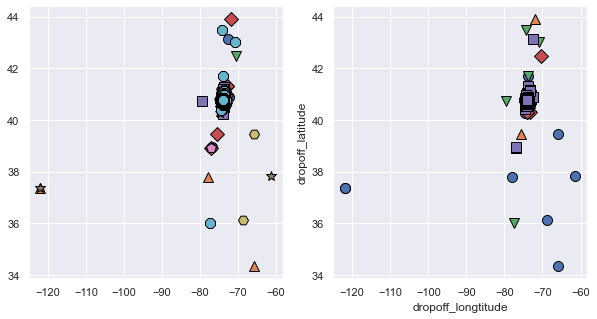

In [187]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 열 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X.iloc[:, 5], X.iloc[:, 6], assignments, ax=axes[0])

# 다섯 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X.iloc[:, 5], X.iloc[:, 6], assignments, ax=axes[1])
plt.xlabel("dropoff_longtitude")
plt.ylabel("dropoff_latitude")
plt.show()

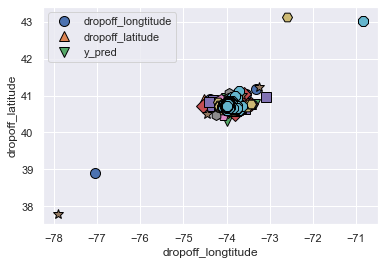

In [188]:
y_pred = KMeans(n_clusters=10, random_state=0).fit_predict(X_test)

mglearn.discrete_scatter(X_test.iloc[:, 5], X_test.iloc[:, 6], y_pred)
plt.legend(["dropoff_longtitude", "dropoff_latitude", "y_pred"], loc='best')
plt.xlabel("dropoff_longtitude")
plt.ylabel("dropoff_latitude")
plt.show()

Text(0, 0.5, 'dropoff_latitude')

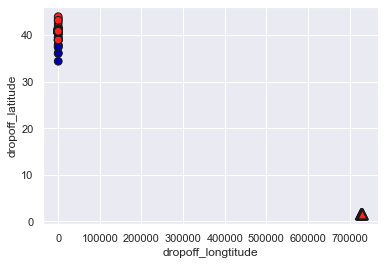

In [189]:
# 열 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 표시합니다
plt.scatter(X.iloc[:, 5], X.iloc[:, 6], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1), mglearn.cm2(2), mglearn.cm2(3),
                          mglearn.cm2(4), mglearn.cm2(5), mglearn.cm2(6), mglearn.cm2(7),
                          mglearn.cm2(8), mglearn.cm2(9)], s=100, linewidth=2, edgecolors='k')
plt.xlabel("dropoff_longtitude")
plt.ylabel("dropoff_latitude")

# c는 색상을 의미하며, s는 점 크기, marker는 표시할 마크 종류
# cmap은 palette
# edgecolors는 테두리색, linewidth는 두께

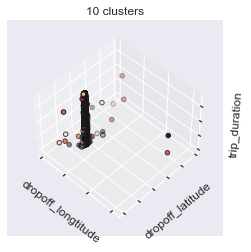

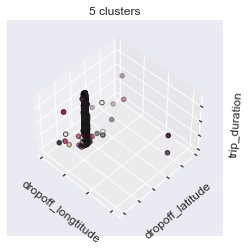

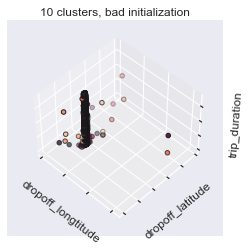

In [190]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(42)

estimators = [('k_means_10', KMeans(n_clusters=10)),
              ('k_means_5', KMeans(n_clusters=5)),
              ('k_means_bad_init', KMeans(n_clusters=10, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['10 clusters', '5 clusters', '10 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X.iloc[:, 5], X.iloc[:, 6], y.iloc[:],
               c=labels.astype(float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([]) # 3차원 시각화 이기 때문에 w_x를 붙임
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('dropoff_longtitude')
    ax.set_ylabel('dropoff_latitude')
    ax.set_zlabel('trip_duration')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

PCA
--

In [191]:
X_cen = X - X.mean(axis=0)  # 평균을 0으로
X_cov = np.dot(X_cen.T, X_cen) / 59
print(X_cov)

[[ 3.71870618e+15  8.52249210e+05  2.03991041e+07 -7.25933855e+05
  -6.87334794e+04 -9.28661268e+05 -2.23919137e+05  1.94467999e+05
   2.12515538e+15  1.32163880e+07 -4.62947876e+07]
 [ 8.52249210e+05  5.22426164e+03  3.99487929e+03  9.79266133e-01
   2.49230042e+00  1.65728424e-01  2.11733914e+00 -5.37486629e+01
  -1.13754182e+10  3.40790948e+01  1.30536132e+02]
 [ 2.03991041e+07  3.99487929e+03  3.61505123e+04 -3.42205587e+00
  -1.45819738e+00 -3.29805764e+00 -6.56796224e-01 -4.04163018e+01
  -1.27603724e+10  2.53726890e+02 -7.10603569e+02]
 [-7.25933855e+05  9.79266133e-01 -3.42205587e+00  9.60267752e+01
   9.25373804e+00  9.29876002e+01  7.89002114e+00  1.37582241e-01
   5.30307413e+08  8.00052061e+00  1.66155947e+02]
 [-6.87334794e+04  2.49230042e+00 -1.45819738e+00  9.25373804e+00
   1.48231599e+01  7.34749033e+00  1.18008758e+01 -9.43431777e-02
  -1.80922831e+07 -5.99988755e+01  6.13648845e+01]
 [-9.28661268e+05  1.65728424e-01 -3.29805764e+00  9.29876002e+01
   7.34749033e+00  

In [192]:
w, v = np.linalg.eig(X_cov)

print('eigenvalue :', w)
print('eigenvector :\n', v)

eigenvalue : [5.92778468e+20 3.71869856e+15 6.27219449e+05 3.83681961e+04
 3.65845742e+04 4.71681714e+03 1.91117832e+02 9.97916258e+01
 2.57905343e+01 5.62404882e+00 2.10247642e+00]
eigenvector :
 [[-3.58509768e-06 -1.00000000e+00 -1.12703737e-08  6.13890932e-09
  -4.32259509e-09  4.47780636e-10 -3.12561896e-10 -5.32462546e-11
   6.62144126e-12  4.53938104e-11 -1.50429572e-11]
 [ 1.91897363e-11 -2.40146060e-10 -1.89920558e-04 -2.46466615e-02
   1.23654960e-01  9.91963047e-01  3.13213459e-04  1.05225796e-02
  -6.46297088e-04  1.65965935e-04 -2.24123284e-05]
 [ 2.15263763e-11 -5.49785117e-09  1.15037015e-03 -2.00124754e-01
   9.71622256e-01 -1.26090963e-01 -1.62846395e-04 -4.05485896e-05
   6.71713455e-05 -3.34407541e-05 -1.38818523e-05]
 [-8.94613147e-13  1.95723059e-10 -2.65066268e-04  4.07548112e-04
   1.89459177e-06  2.94563710e-04 -7.01544318e-01 -2.00897271e-03
  -7.11695388e-02 -4.53989974e-01  5.44664310e-01]
 [ 3.05211547e-14  1.84657658e-11 -8.35269136e-05  1.74205209e-03
   3.

In [193]:
print('explained variance ratio :', w / w.sum())

explained variance ratio : [9.99993727e-01 6.27329675e-06 1.05809429e-15 6.47256227e-17
 6.17167234e-17 7.95708313e-18 3.22408190e-19 1.68344508e-19
 4.35076068e-20 9.48754693e-21 3.54679419e-21]


In [194]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

PCA()

In [195]:
pca.components_

array([[ 3.58509768e-06, -1.91900941e-11, -2.15263763e-11,
         8.94613147e-13, -3.05211547e-14,  1.04642407e-12,
         3.31242936e-13, -4.23397865e-13,  1.00000000e+00,
         6.07950468e-11, -1.01190016e-09],
       [ 1.00000000e+00,  2.40146229e-10,  5.49785117e-09,
        -1.95723059e-10, -1.84657658e-11, -2.50325505e-10,
        -6.04036816e-11,  5.25366033e-11, -3.58509768e-06,
         3.51929257e-09, -1.18709081e-08],
       [ 1.12703737e-08,  1.89922158e-04, -1.15037014e-03,
         2.65066268e-04,  8.35269136e-05,  6.05268081e-04,
         2.89639891e-04, -5.18369723e-05,  9.93460834e-10,
         1.39503203e-01,  9.90220666e-01],
       [-6.13890920e-09,  2.46466449e-02,  2.00124726e-01,
        -4.07548112e-04, -1.74205210e-03,  1.08168910e-03,
        -2.26715476e-03,  1.08224513e-04, -1.92199837e-10,
         9.69909487e-01, -1.36413717e-01],
       [-4.32259508e-09,  1.23654967e-01,  9.71622255e-01,
         1.89459231e-06,  3.46105752e-04, -3.12321616e-04,
  

In [196]:
pca.explained_variance_

array([2.82432976e+16, 1.77179698e+11, 2.98842595e+01, 1.82807649e+00,
       1.74309472e+00, 2.24735675e-01, 9.10592759e-03, 4.75463388e-03,
       1.22880599e-03, 2.67961292e-04, 1.00173792e-04])

<AxesSubplot:>

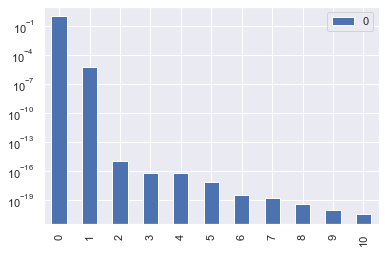

In [197]:
ratio = pca.explained_variance_ratio_
df_ratio=pd.DataFrame(ratio)
df_ratio.plot(kind='bar', logy=True)

,V_ration
PC1,9.999937e-01
PC2,6.273297e-06
PC3,1.058094e-15
PC4,6.472562e-17
PC5,6.171672e-17
PC6,7.957083e-18
PC7,3.224082e-19
PC8,1.683445e-19
PC9,4.350761e-20
PC10,9.487547e-21


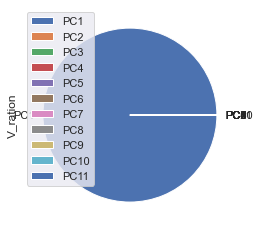

In [198]:
df_v = pd.DataFrame(ratio, index=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'], columns=['V_ration'])
df_v.plot.pie(y='V_ration')
df_v

In [199]:
PC_score = pca.transform(X)
PC_score[:5]

array([[-5.12243014e+07,  3.20044417e+05, -1.00262656e+00,
        -7.36237689e-01, -4.61728278e-01, -5.45798536e-01,
        -1.05728290e-02,  2.16973554e-04, -1.66288794e-02,
         5.83908356e-03, -1.09985668e-02],
       [ 2.46607578e+08,  1.37486660e+05, -2.69893036e+00,
        -2.39137101e-01, -6.86472502e-01,  4.40428186e-01,
         1.66218177e-02, -1.02619913e-02,  2.33893021e-02,
        -1.19001358e-02,  8.34578723e-03],
       [ 4.07964754e+07,  5.48778513e+05, -3.07387941e-01,
        -8.50866807e-01, -4.36378324e-01, -5.47011110e-01,
         5.08501842e-02,  6.06679054e-04,  5.37877703e-02,
        -6.30430568e-03, -2.89659753e-03],
       [-3.92637023e+07,  6.69485368e+04, -3.03651871e+00,
        -7.62202906e-01, -4.56995578e-01, -5.46560249e-01,
        -1.53761294e-02,  8.82710949e-05, -4.62599360e-02,
        -7.20809598e-03, -6.61883250e-03],
       [-2.35176619e+08, -4.35804096e+05, -4.15300640e+00,
         3.16056048e-01,  4.38192882e+00,  8.69326308e-02,
  

MinMaxScaler 적용하기
--

In [200]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [201]:
X_scaled=scaler.transform(X)

In [202]:
# 데이터 변환
X_train_scaled = scaler.transform(X_train)
# 스케일이 조정된 후 데이터셋의 속성을 출력합니다
print("변환된 후 크기:", X_train_scaled.shape)
print("스케일 조정 전 특성별 최소값:\n", X_train.min(axis=0))
print("스케일 조정 전 특성별 최대값:\n", X_train.max(axis=0))
print("스케일 조정 후 특성별 최소값:\n", X_train_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", X_train_scaled.max(axis=0))

변환된 후 크기: (990648, 11)
스케일 조정 전 특성별 최소값:
 id                    6.000000e+00
vendor_id             1.000000e+00
passenger_count       0.000000e+00
pickup_longitude     -1.219333e+02
pickup_latitude       3.435970e+01
dropoff_longitude    -1.219333e+02
dropoff_latitude      3.435970e+01
store_and_fwd_flag    0.000000e+00
time_pickup           1.010001e+08
distance              0.000000e+00
km_h                  0.000000e+00
dtype: float64
스케일 조정 전 특성별 최대값:
 id                    1.458643e+06
vendor_id             2.000000e+00
passenger_count       9.000000e+00
pickup_longitude     -6.133553e+01
pickup_latitude       4.391176e+01
dropoff_longitude    -6.133553e+01
dropoff_latitude      4.391176e+01
store_and_fwd_flag    1.000000e+00
time_pickup           6.302359e+08
distance              7.840110e+00
km_h                  2.814990e+01
dtype: float64
스케일 조정 후 특성별 최소값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [203]:
# 테스트 데이터 변환
X_test_scaled = scaler.transform(X_test)
# 스케일이 조정된 후 테스트 데이터의 속성을 출력합니다
print("스케일 조정 후 특성별 최소값:\n", X_test_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", X_test_scaled.max(axis=0))

스케일 조정 후 특성별 최소값:
 [-4.11342918e-06  0.00000000e+00  0.00000000e+00  7.26714729e-01
  3.57836229e-01  7.26714557e-01  3.57836229e-01  0.00000000e+00
  3.62787211e-07  0.00000000e+00  0.00000000e+00]
스케일 조정 후 특성별 최대값:
 [0.99999177 1.         0.77777778 0.8429632  0.91916828 0.8429631
 0.91916828 1.         1.00000005 1.00002296 0.9998995 ]


Pickup_longtitude, Pickup_latitude
--

In [204]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=10)
kmeans.fit(X_scaled)

print(kmeans.labels_)

print(kmeans.predict(X_scaled))

[2 1 9 ... 9 7 6]
[2 1 9 ... 9 7 6]


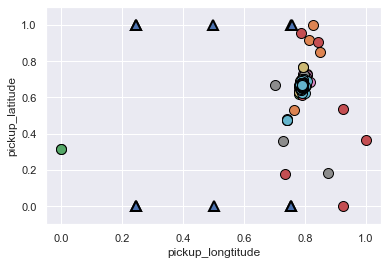

In [205]:
import matplotlib.pyplot as plt
import mglearn

mglearn.discrete_scatter(X_scaled[:, 3], X_scaled[:, 4], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    markers='^', markeredgewidth=2)

plt.xlabel("pickup_longtitude")
plt.ylabel("pickup_latitude")
plt.show()

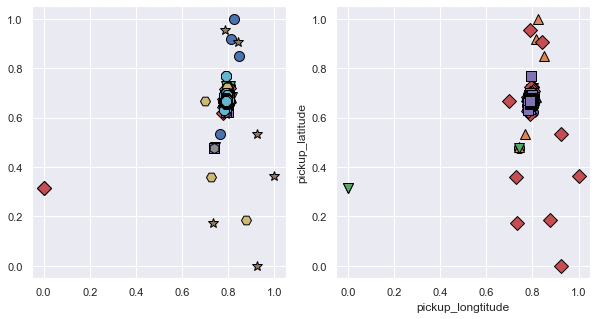

In [206]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 열 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_scaled)
assignments = kmeans.labels_

mglearn.discrete_scatter(X_scaled[:, 3], X_scaled[:, 4], assignments, ax=axes[0])

# 다섯 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_scaled)
assignments = kmeans.labels_

mglearn.discrete_scatter(X_scaled[:, 3], X_scaled[:, 4], assignments, ax=axes[1])
plt.xlabel("pickup_longtitude")
plt.ylabel("pickup_latitude")
plt.show()

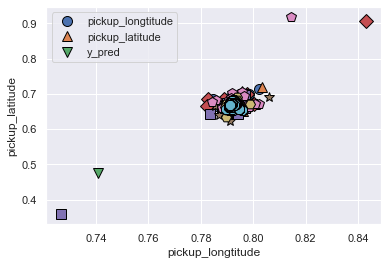

In [207]:
y_pred = KMeans(n_clusters=10, random_state=0).fit_predict(X_test_scaled)

mglearn.discrete_scatter(X_test_scaled[:, 3], X_test_scaled[:, 4], y_pred)
plt.legend(["pickup_longtitude", "pickup_latitude", "y_pred"], loc='best')
plt.xlabel("pickup_longtitude")
plt.ylabel("pickup_latitude")
plt.show()

Text(0, 0.5, 'pickup_latitude')

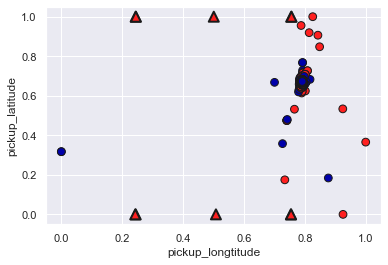

In [208]:
# 열 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_scaled)
y_pred = kmeans.predict(X_scaled)

# 클러스터 할당과 클러스터 중심을 표시합니다
plt.scatter(X_scaled[:, 3], X_scaled[:, 4], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1), mglearn.cm2(2), mglearn.cm2(3),
                          mglearn.cm2(4), mglearn.cm2(5), mglearn.cm2(6), mglearn.cm2(7),
                          mglearn.cm2(8), mglearn.cm2(9)], s=100, linewidth=2, edgecolors='k')
plt.xlabel("pickup_longtitude")
plt.ylabel("pickup_latitude")

# c는 색상을 의미하며, s는 점 크기, marker는 표시할 마크 종류
# cmap은 palette
# edgecolors는 테두리색, linewidth는 두께



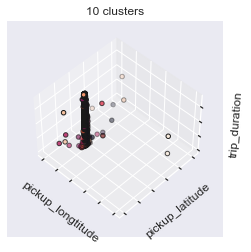

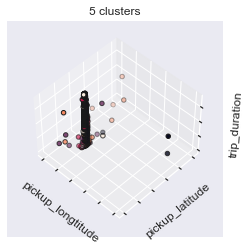

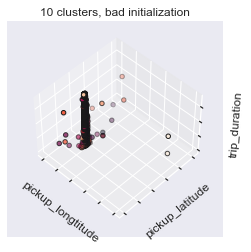

In [209]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(42)

estimators = [('k_means_10', KMeans(n_clusters=10)),
              ('k_means_5', KMeans(n_clusters=5)),
              ('k_means_bad_init', KMeans(n_clusters=10, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['10 clusters', '5 clusters', '10 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X_scaled)
    labels = est.labels_

    ax.scatter(X_scaled[:, 3], X_scaled[:, 4], y.iloc[:],
               c=labels.astype(float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([]) # 3차원 시각화 이기 때문에 w_x를 붙임
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('pickup_longtitude')
    ax.set_ylabel('pickup_latitude')
    ax.set_zlabel('trip_duration')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

Dropoff_longtitude, Dropoff_latitude
--

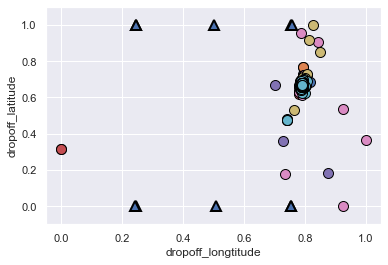

In [210]:
import matplotlib.pyplot as plt
import mglearn

mglearn.discrete_scatter(X_scaled[:, 5], X_scaled[:, 6], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    markers='^', markeredgewidth=2)

plt.xlabel("dropoff_longtitude")
plt.ylabel("dropoff_latitude")
plt.show()

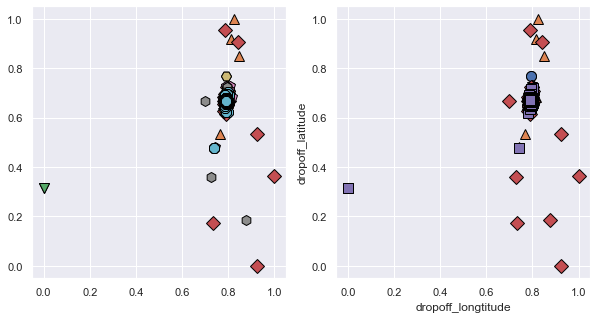

In [211]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 열 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_scaled)
assignments = kmeans.labels_

mglearn.discrete_scatter(X_scaled[:, 5], X_scaled[:, 6], assignments, ax=axes[0])

# 다섯 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_scaled)
assignments = kmeans.labels_

mglearn.discrete_scatter(X_scaled[:, 5], X_scaled[:, 6], assignments, ax=axes[1])
plt.xlabel("dropoff_longtitude")
plt.ylabel("dropoff_latitude")
plt.show()

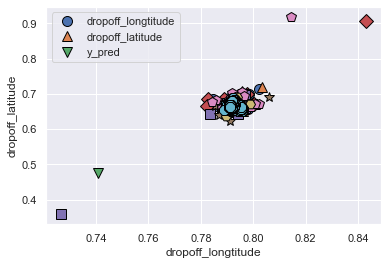

In [212]:
y_pred = KMeans(n_clusters=10, random_state=0).fit_predict(X_test_scaled)

mglearn.discrete_scatter(X_test_scaled[:, 5], X_test_scaled[:, 6], y_pred)
plt.legend(["dropoff_longtitude", "dropoff_latitude", "y_pred"], loc='best')
plt.xlabel("dropoff_longtitude")
plt.ylabel("dropoff_latitude")
plt.show()

Text(0, 0.5, 'dropoff_latitude')

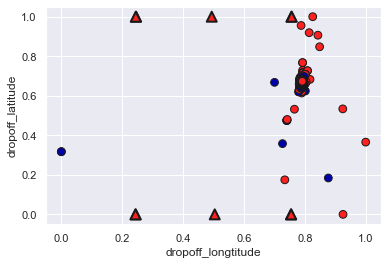

In [213]:
# 열 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_scaled)
y_pred = kmeans.predict(X_scaled)

# 클러스터 할당과 클러스터 중심을 표시합니다
plt.scatter(X_scaled[:, 5], X_scaled[:, 6], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1), mglearn.cm2(2), mglearn.cm2(3),
                          mglearn.cm2(4), mglearn.cm2(5), mglearn.cm2(6), mglearn.cm2(7),
                          mglearn.cm2(8), mglearn.cm2(9)], s=100, linewidth=2, edgecolors='k')
plt.xlabel("dropoff_longtitude")
plt.ylabel("dropoff_latitude")

# c는 색상을 의미하며, s는 점 크기, marker는 표시할 마크 종류
# cmap은 palette
# edgecolors는 테두리색, linewidth는 두께

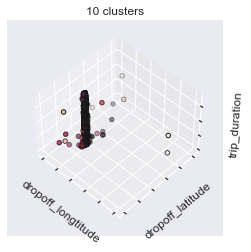

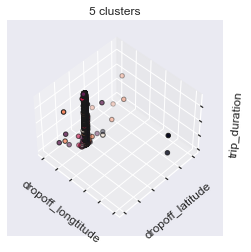

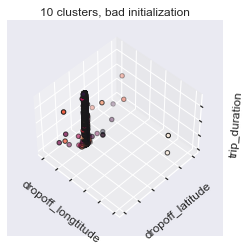

In [214]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(42)

estimators = [('k_means_10', KMeans(n_clusters=10)),
              ('k_means_5', KMeans(n_clusters=5)),
              ('k_means_bad_init', KMeans(n_clusters=10, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['10 clusters', '5 clusters', '10 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X_scaled)
    labels = est.labels_

    ax.scatter(X_scaled[:, 5], X_scaled[:, 6], y.iloc[:],
               c=labels.astype(float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([]) # 3차원 시각화 이기 때문에 w_x를 붙임
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('dropoff_longtitude')
    ax.set_ylabel('dropoff_latitude')
    ax.set_zlabel('trip_duration')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

PCA(MinMaxScaler)
--

In [215]:
X_cen = X_scaled - X_scaled.mean(axis=0)  # 평균을 0으로
X_cov = np.dot(X_cen.T, X_cen) / 59
print(X_cov)

[[ 1.74782286e+03  5.84277795e-01  1.55389389e+00 -8.21283082e-03
  -4.93314354e-03 -1.05063879e-02 -1.60711382e-02  1.33321724e-01
   2.75292388e+00  1.15569543e+00 -1.12747790e+00]
 [ 5.84277795e-01  5.22426164e+03  4.43875477e+02  1.61600904e-02
   2.60917398e-01  2.73489292e-03  2.21662933e-01 -5.37486629e+01
  -2.14940429e+01  4.34676233e+00  4.63717951e+00]
 [ 1.55389389e+00  4.43875477e+02  4.46302621e+02 -6.27462302e-03
  -1.69619764e-02 -6.04726579e-03 -7.63995476e-03 -4.49070020e+00
  -2.67899301e+00  3.59585218e+00 -2.80483968e+00]
 [-8.21283082e-03  1.61600904e-02 -6.27462302e-03  2.61504068e-02
   1.59868501e-02  2.53227820e-02  1.36308792e-02  2.27041597e-03
   1.65356583e-02  1.68398859e-02  9.74051927e-02]
 [-4.93314354e-03  2.60917398e-01 -1.69619764e-02  1.59868501e-02
   1.62459866e-01  1.26936055e-02  1.29336033e-01 -9.87672927e-03
  -3.57887692e-03 -8.01168017e-01  2.28215815e-01]
 [-1.05063879e-02  2.73489292e-03 -6.04726579e-03  2.53227820e-02
   1.26936055e-02  

In [216]:
w, v = np.linalg.eig(X_cov)

print('eigenvalue :', w)
print('eigenvector :\n', v)

eigenvalue : [5.26587051e+03 1.74780523e+03 2.11746678e+03 1.16197122e+03
 4.25202573e+02 4.04373573e+02 9.97900570e+01 3.05216163e-01
 7.68804167e-04 4.56219989e-02 4.84982321e-02]
eigenvector :
 [[ 2.00102778e-04  9.99970189e-01 -7.54275044e-03  2.00520841e-04
  -1.40003235e-03 -8.25458001e-04  7.98391565e-05  6.74555680e-06
  -7.22033735e-07  5.74268619e-06  5.17258179e-06]
 [ 9.95705317e-01 -3.53395298e-04 -6.91341295e-03  1.43590860e-03
  -2.05524021e-02 -8.93737797e-02 -1.05290871e-02 -7.12302141e-05
  -1.25581858e-06  1.23063517e-05 -5.20726184e-07]
 [ 9.17168686e-02  1.09233275e-03 -2.89229943e-04  5.20559953e-05
   2.22647458e-01  9.70574381e-01  4.57289705e-04  8.03210715e-05
  -5.55718290e-07 -2.66668750e-05  2.34466226e-05]
 [ 2.94467294e-06 -4.79518579e-06 -6.40648025e-06 -6.86852054e-05
  -1.39566901e-04  1.40751440e-05 -2.75666904e-05  8.09496064e-02
   7.08366966e-01  1.81065582e-01  6.77405811e-01]
 [ 4.89452859e-05 -3.38179174e-06  3.41400883e-06  3.63062751e-04
  -1.

In [217]:
print('explained variance ratio :', w / w.sum())

explained variance ratio : [4.69208482e-01 1.55735891e-01 1.88674099e-01 1.03535921e-01
 3.78871173e-02 3.60311766e-02 8.89166209e-03 2.71958857e-05
 6.85032865e-08 4.06508835e-06 4.32137134e-06]


In [218]:
pca = PCA()
pca.fit(X_scaled)

PCA()

In [219]:
pca.components_

array([[-2.00102778e-04, -9.95705317e-01, -9.17168686e-02,
        -2.94467294e-06, -4.89452859e-05, -4.69133310e-07,
        -4.17355365e-05,  1.04397214e-02,  6.88289737e-03,
        -1.12238373e-03, -1.12812560e-03],
       [-7.54275044e-03, -6.91341295e-03, -2.89229943e-04,
        -6.40648025e-06,  3.41400883e-06, -5.79217751e-06,
        -9.46039919e-06,  4.02224400e-04, -9.99478689e-01,
         1.94057272e-03,  3.05557077e-02],
       [ 9.99970189e-01, -3.53395298e-04,  1.09233275e-03,
        -4.79518579e-06, -3.38179174e-06, -6.04689011e-06,
        -1.00774030e-05,  9.26961117e-05, -7.55718099e-03,
         9.74551301e-04, -4.83432128e-04],
       [-2.00520841e-04, -1.43590860e-03, -5.20559953e-05,
         6.86852054e-05, -3.63062751e-04,  2.54053818e-04,
        -9.39965068e-05,  7.41704395e-05,  2.25335389e-02,
         7.22693457e-01,  6.90799599e-01],
       [ 1.40003235e-03,  2.05524021e-02, -2.22647458e-01,
         1.39566901e-04,  1.67002795e-03,  4.43368140e-05,
  

In [220]:
pca.explained_variance_

array([2.50895665e-01, 1.00888017e-01, 8.32752636e-02, 5.53628391e-02,
       2.02590402e-02, 1.92666296e-02, 4.75455913e-03, 1.45422133e-05,
       2.31072834e-06, 2.17368842e-06, 3.66301512e-08])

<AxesSubplot:>

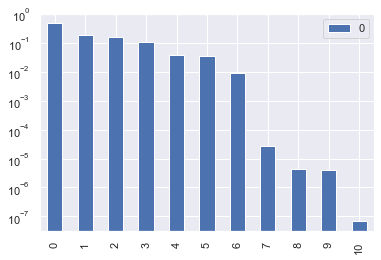

In [221]:
ratio = pca.explained_variance_ratio_
df_ratio=pd.DataFrame(ratio)
df_ratio.plot(kind='bar', logy=True)

,V_ration
PC1,4.692085e-01
PC2,1.886741e-01
PC3,1.557359e-01
PC4,1.035359e-01
PC5,3.788712e-02
PC6,3.603118e-02
PC7,8.891662e-03
PC8,2.719589e-05
PC9,4.321371e-06
PC10,4.065088e-06


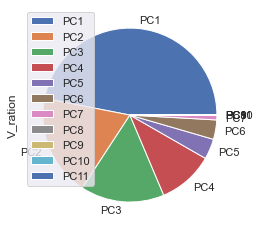

In [222]:
df_v = pd.DataFrame(ratio, index=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'], columns=['V_ration'])
df_v.plot.pie(y='V_ration')
df_v

In [223]:
PC_score = pca.transform(X_scaled)
PC_score[:5]

array([[-4.58907293e-01,  9.07548215e-02,  2.19686492e-01,
        -9.43183474e-02,  6.84634643e-02, -1.03529915e-01,
         3.27607980e-04, -1.85337685e-03, -1.89867744e-05,
         2.63741431e-04, -2.18538733e-04],
       [ 5.40734950e-01, -4.66010460e-01,  9.14398173e-02,
        -1.02253518e-01, -1.86747524e-02, -2.90821820e-02,
        -1.03580862e-02,  2.62517312e-03, -1.96770026e-04,
         3.65740598e-04,  2.04963187e-04],
       [-4.57763995e-01, -8.35558950e-02,  3.75395572e-01,
        -7.66832737e-02,  8.85122041e-02, -9.90482628e-02,
         4.77676764e-04,  6.19207224e-03, -1.93466774e-04,
         6.75500408e-04, -1.66350635e-05],
       [-4.58591930e-01,  6.72066598e-02,  4.60310700e-02,
        -1.71901618e-01,  4.48020920e-02, -1.08744040e-01,
         2.29127704e-04, -4.97278248e-03,  5.06487836e-05,
         1.08652170e-03, -7.51667896e-05],
       [-5.11975015e-01,  4.38630709e-01, -2.95704197e-01,
        -2.10716476e-01, -1.01820590e-01,  4.25468779e-01,
  

StandardScaler 적용하기
--

In [224]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()

s_scaler.fit(X_train)

StandardScaler()

In [225]:
s_X_scaled=s_scaler.transform(X)

In [226]:
# 데이터 변환
s_X_train_scaled = s_scaler.transform(X_train)
# 스케일이 조정된 후 데이터셋의 속성을 출력합니다
print("변환된 후 크기:", X_train_scaled.shape)
print("스케일 조정 전 특성별 최소값:\n", X_train.min(axis=0))
print("스케일 조정 전 특성별 최대값:\n", X_train.max(axis=0))
print("스케일 조정 후 특성별 최소값:\n", s_X_train_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", s_X_train_scaled.max(axis=0))

변환된 후 크기: (990648, 11)
스케일 조정 전 특성별 최소값:
 id                    6.000000e+00
vendor_id             1.000000e+00
passenger_count       0.000000e+00
pickup_longitude     -1.219333e+02
pickup_latitude       3.435970e+01
dropoff_longitude    -1.219333e+02
dropoff_latitude      3.435970e+01
store_and_fwd_flag    0.000000e+00
time_pickup           1.010001e+08
distance              0.000000e+00
km_h                  0.000000e+00
dtype: float64
스케일 조정 전 특성별 최대값:
 id                    1.458643e+06
vendor_id             2.000000e+00
passenger_count       9.000000e+00
pickup_longitude     -6.133553e+01
pickup_latitude       4.391176e+01
dropoff_longitude    -6.133553e+01
dropoff_latitude      4.391176e+01
store_and_fwd_flag    1.000000e+00
time_pickup           6.302359e+08
distance              7.840110e+00
km_h                  2.814990e+01
dtype: float64
스케일 조정 후 특성별 최소값:
 [-1.73188245e+00 -1.06848885e+00 -1.26547030e+00 -6.43261084e+02
 -2.38501182e+02 -6.39974051e+02 -2.21151556e+02 -6.946

In [227]:
# 테스트 데이터 변환
s_X_test_scaled = scaler.transform(X_test)
# 스케일이 조정된 후 테스트 데이터의 속성을 출력합니다
print("스케일 조정 후 특성별 최소값:\n", s_X_test_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", s_X_test_scaled.max(axis=0))

스케일 조정 후 특성별 최소값:
 [-4.11342918e-06  0.00000000e+00  0.00000000e+00  7.26714729e-01
  3.57836229e-01  7.26714557e-01  3.57836229e-01  0.00000000e+00
  3.62787211e-07  0.00000000e+00  0.00000000e+00]
스케일 조정 후 특성별 최대값:
 [0.99999177 1.         0.77777778 0.8429632  0.91916828 0.8429631
 0.91916828 1.         1.00000005 1.00002296 0.9998995 ]


Pickup_longtitude, Pickup_latitude
--

In [228]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=10)
kmeans.fit(s_X_scaled)

print(kmeans.labels_)

print(kmeans.predict(s_X_scaled))

[8 9 1 ... 7 0 4]
[8 9 1 ... 7 0 4]


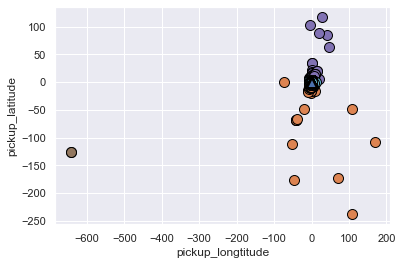

In [229]:
import matplotlib.pyplot as plt
import mglearn

mglearn.discrete_scatter(s_X_scaled[:, 3], s_X_scaled[:, 4], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    markers='^', markeredgewidth=2)

plt.xlabel("pickup_longtitude")
plt.ylabel("pickup_latitude")
plt.show()

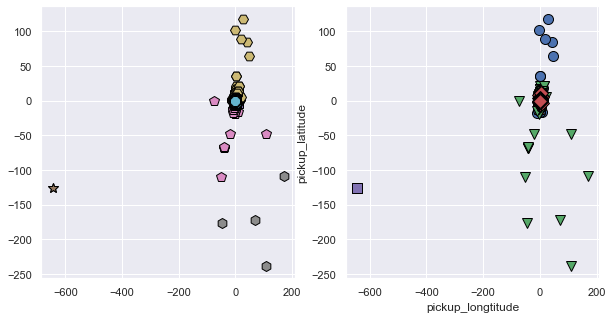

In [230]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 열 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=10)
kmeans.fit(s_X_scaled)
assignments = kmeans.labels_

mglearn.discrete_scatter(s_X_scaled[:, 3], s_X_scaled[:, 4], assignments, ax=axes[0])

# 다섯 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=5)
kmeans.fit(s_X_scaled)
assignments = kmeans.labels_

mglearn.discrete_scatter(s_X_scaled[:, 3], s_X_scaled[:, 4], assignments, ax=axes[1])
plt.xlabel("pickup_longtitude")
plt.ylabel("pickup_latitude")
plt.show()

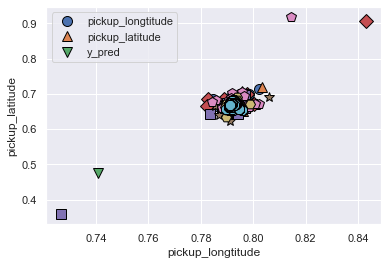

In [231]:
y_pred = KMeans(n_clusters=10, random_state=0).fit_predict(s_X_test_scaled)

mglearn.discrete_scatter(X_test_scaled[:, 3], X_test_scaled[:, 4], y_pred)
plt.legend(["pickup_longtitude", "pickup_latitude", "y_pred"], loc='best')
plt.xlabel("pickup_longtitude")
plt.ylabel("pickup_latitude")
plt.show()

Text(0, 0.5, 'pickup_latitude')

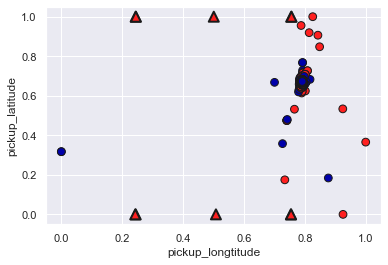

In [232]:
# 열 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_scaled)
y_pred = kmeans.predict(X_scaled)

# 클러스터 할당과 클러스터 중심을 표시합니다
plt.scatter(X_scaled[:, 3], X_scaled[:, 4], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1), mglearn.cm2(2), mglearn.cm2(3),
                          mglearn.cm2(4), mglearn.cm2(5), mglearn.cm2(6), mglearn.cm2(7),
                          mglearn.cm2(8), mglearn.cm2(9)], s=100, linewidth=2, edgecolors='k')
plt.xlabel("pickup_longtitude")
plt.ylabel("pickup_latitude")

# c는 색상을 의미하며, s는 점 크기, marker는 표시할 마크 종류
# cmap은 palette
# edgecolors는 테두리색, linewidth는 두께

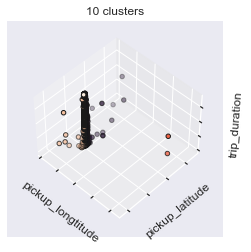

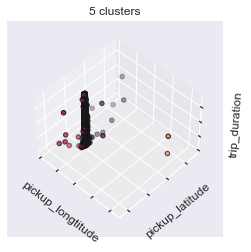

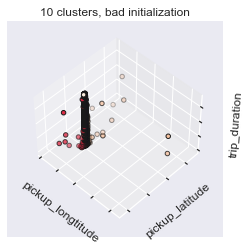

In [233]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(42)

estimators = [('k_means_10', KMeans(n_clusters=10)),
              ('k_means_5', KMeans(n_clusters=5)),
              ('k_means_bad_init', KMeans(n_clusters=10, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['10 clusters', '5 clusters', '10 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(s_X_scaled)
    labels = est.labels_

    ax.scatter(s_X_scaled[:, 3], s_X_scaled[:, 4], y.iloc[:],
               c=labels.astype(float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([]) # 3차원 시각화 이기 때문에 w_x를 붙임
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('pickup_longtitude')
    ax.set_ylabel('pickup_latitude')
    ax.set_zlabel('trip_duration')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

Dropoff_longtitude, Dropoff_latitude
--

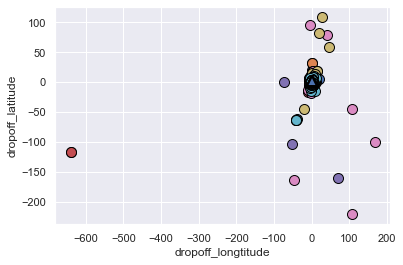

In [234]:
import matplotlib.pyplot as plt
import mglearn

mglearn.discrete_scatter(s_X_scaled[:, 5], s_X_scaled[:, 6], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    markers='^', markeredgewidth=2)

plt.xlabel("dropoff_longtitude")
plt.ylabel("dropoff_latitude")
plt.show()

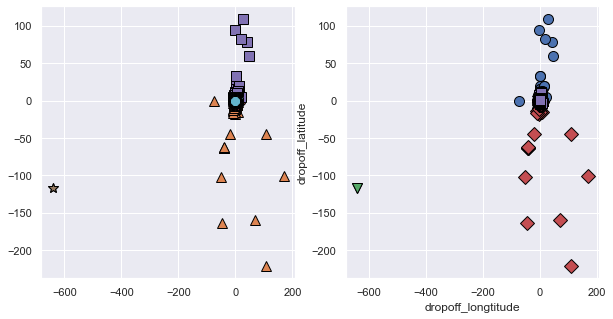

In [235]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 열 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=10)
kmeans.fit(s_X_scaled)
assignments = kmeans.labels_

mglearn.discrete_scatter(s_X_scaled[:, 5], s_X_scaled[:, 6], assignments, ax=axes[0])

# 다섯 개의 클러스터 중심을 사용합니다
kmeans = KMeans(n_clusters=5)
kmeans.fit(s_X_scaled)
assignments = kmeans.labels_

mglearn.discrete_scatter(s_X_scaled[:, 5], s_X_scaled[:, 6], assignments, ax=axes[1])
plt.xlabel("dropoff_longtitude")
plt.ylabel("dropoff_latitude")
plt.show()

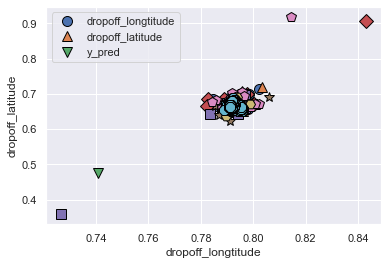

In [236]:
y_pred = KMeans(n_clusters=10, random_state=0).fit_predict(s_X_test_scaled)

mglearn.discrete_scatter(s_X_test_scaled[:, 5], s_X_test_scaled[:, 6], y_pred)
plt.legend(["dropoff_longtitude", "dropoff_latitude", "y_pred"], loc='best')
plt.xlabel("dropoff_longtitude")
plt.ylabel("dropoff_latitude")
plt.show()

Text(0, 0.5, 'dropoff_latitude')

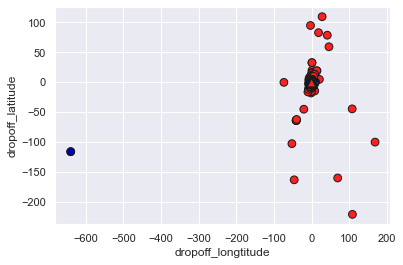

In [237]:
# 열 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다
kmeans = KMeans(n_clusters=10)
kmeans.fit(s_X_scaled)
y_pred = kmeans.predict(s_X_scaled)

# 클러스터 할당과 클러스터 중심을 표시합니다
plt.scatter(s_X_scaled[:, 5], s_X_scaled[:, 6], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1), mglearn.cm2(2), mglearn.cm2(3),
                          mglearn.cm2(4), mglearn.cm2(5), mglearn.cm2(6), mglearn.cm2(7),
                          mglearn.cm2(8), mglearn.cm2(9)], s=100, linewidth=2, edgecolors='k')
plt.xlabel("dropoff_longtitude")
plt.ylabel("dropoff_latitude")

# c는 색상을 의미하며, s는 점 크기, marker는 표시할 마크 종류
# cmap은 palette
# edgecolors는 테두리색, linewidth는 두께

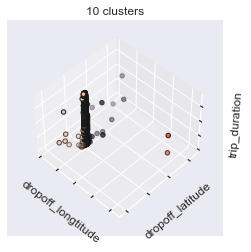

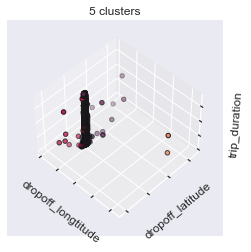

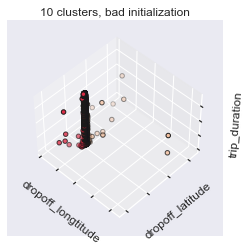

In [238]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(42)

estimators = [('k_means_10', KMeans(n_clusters=10)),
              ('k_means_5', KMeans(n_clusters=5)),
              ('k_means_bad_init', KMeans(n_clusters=10, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['10 clusters', '5 clusters', '10 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(s_X_scaled)
    labels = est.labels_

    ax.scatter(s_X_scaled[:, 5], s_X_scaled[:, 6], y.iloc[:],
               c=labels.astype(float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([]) # 3차원 시각화 이기 때문에 w_x를 붙임
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('dropoff_longtitude')
    ax.set_ylabel('dropoff_latitude')
    ax.set_zlabel('trip_duration')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

PCA(StandardScaler)
--

In [239]:
X_cen = s_X_scaled - s_X_scaled.mean(axis=0)  # 평균을 0으로
X_cov = np.dot(X_cen.T, X_cen) / 59
print(X_cov)

[[ 2.09827295e+04  4.05773709e+00  3.69336590e+01 -2.31312557e+01
  -6.09086276e+00 -2.94387360e+01 -1.83991443e+01  6.68223193e+00
   3.00282181e+01  2.03910875e+01 -2.02884510e+01]
 [ 4.05773709e+00  2.09888864e+04  6.10326298e+03  2.63299525e+01
   1.86362297e+02  4.43308449e+00  1.46806072e+02 -1.55843339e+03
  -1.35629270e+02  4.43672837e+01  4.82719358e+01]
 [ 3.69336590e+01  6.10326298e+03  2.10022983e+04 -3.49889073e+01
  -4.14636876e+01 -3.35475796e+01 -1.73172204e+01 -4.45626588e+02
  -5.78553263e+01  1.25613186e+02 -9.99275645e+01]
 [-2.31312557e+01  2.63299525e+01 -3.49889073e+01  1.72793160e+04
   4.63083950e+03  1.66463457e+04  3.66114241e+03  2.66973295e+01
   4.23154159e+01  6.97072422e+01  4.11211003e+02]
 [-6.09086276e+00  1.86362297e+02 -4.14636876e+01  4.63083950e+03
   2.06296398e+04  3.65797909e+03  1.52286365e+04 -5.09124817e+01
  -4.01488043e+00 -1.45382151e+03  4.22354458e+02]
 [-2.94387360e+01  4.43308449e+00 -3.35475796e+01  1.66463457e+04
   3.65797909e+03  

In [240]:
w, v = np.linalg.eig(X_cov)

print('eigenvalue :', w)
print('eigenvector :\n', v)

eigenvalue : [43239.13148586   494.32646483  5530.97500712 11011.89022647
 31108.9768442  14788.72914472 27434.09093051 26449.68500191
 21019.23215263 20960.38987929 20780.695848  ]
eigenvector :
 [[ 1.75758101e-03  1.67080747e-04  5.15765927e-04  2.58804239e-03
   4.03482675e-04 -3.50898991e-03  4.30601361e-03  1.57153000e-03
  -6.44284231e-01  7.56921606e-01  1.09196809e-01]
 [-8.57659710e-03  4.89682774e-04  3.16380712e-03 -8.34127013e-03
  -5.42833357e-03 -7.12065583e-01  6.93574929e-01 -8.87229641e-02
   3.52463981e-03  4.90931262e-03 -6.18488760e-02]
 [ 8.33226205e-04  9.00026022e-05 -2.95281019e-03  2.13437115e-02
  -5.35063321e-03  6.89655746e-01  6.73564090e-01 -1.00249681e-01
   3.98974226e-03  3.78502135e-02 -2.42268876e-01]
 [-4.68489972e-01 -6.97856937e-01 -1.15276487e-01  2.29380144e-02
  -1.20458171e-01 -2.13153132e-03 -7.20045229e-02 -5.09626828e-01
   9.29328977e-03  9.17038929e-03  1.04254190e-02]
 [-5.29826986e-01  1.20398227e-01 -6.93342880e-01 -1.15588558e-01
   1.

In [241]:
print('explained variance ratio :', w / w.sum())

explained variance ratio : [0.19405572 0.00221852 0.02482282 0.04942098 0.13961601 0.0663713
 0.12312325 0.11870527 0.09433358 0.0940695  0.09326304]


In [242]:
pca = PCA()
pca.fit(s_X_scaled)

PCA()

In [243]:
pca.components_

array([[ 1.75758101e-03, -8.57659710e-03,  8.33226205e-04,
        -4.68489972e-01, -5.29826986e-01, -4.65730651e-01,
        -5.28265303e-01,  2.40208031e-03, -9.22348456e-04,
         2.46177861e-02, -5.60467944e-02],
       [ 4.03482675e-04, -5.42833357e-03, -5.35063321e-03,
        -1.20458171e-01,  1.49444605e-01, -1.50542801e-01,
         1.27986040e-01, -1.45231967e-03,  3.30273984e-02,
        -6.92950053e-01, -6.65418383e-01],
       [ 4.30601361e-03,  6.93574929e-01,  6.73564090e-01,
        -7.20045229e-02,  5.64878080e-02, -7.23414603e-02,
         5.80009624e-02, -2.16540009e-01, -2.27030627e-02,
         1.62619925e-02,  2.45827766e-02],
       [ 1.57153000e-03, -8.87229641e-02, -1.00249681e-01,
        -5.09626828e-01,  4.30016684e-01, -5.05532399e-01,
         4.47277624e-01,  1.58878675e-02, -2.91504661e-02,
         1.32453196e-01,  2.51347593e-01],
       [ 6.44284231e-01, -3.52463981e-03, -3.98974226e-03,
        -9.29328977e-03,  8.46003428e-03, -7.62347958e-03,
  

In [244]:
pca.explained_variance_

array([2.06015523, 1.48220649, 1.30711427, 1.26021164, 1.00147435,
       0.99867077, 0.99010914, 0.70461817, 0.52466834, 0.26352673,
       0.02355249])

<AxesSubplot:>

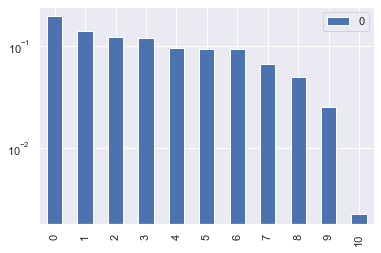

In [245]:
ratio = pca.explained_variance_ratio_
df_ratio=pd.DataFrame(ratio)
df_ratio.plot(kind='bar', logy=True)

,V_ration
PC1,0.194056
PC2,0.139616
PC3,0.123123
PC4,0.118705
PC5,0.094334
PC6,0.094070
PC7,0.093263
PC8,0.066371
PC9,0.049421
PC10,0.024823


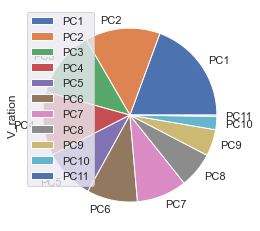

In [246]:
df_v = pd.DataFrame(ratio, index=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'], columns=['V_ration'])
df_v.plot.pie(y='V_ration')
df_v

In [247]:
PC_score = pca.transform(s_X_scaled)
PC_score[:5]

array([[-0.6102984 ,  0.5540589 ,  0.36988176,  0.23491046,  0.24632825,
        -0.7486794 , -0.26953491, -1.00163588,  0.1303943 , -0.0572155 ,
        -0.17637975],
       [ 0.84642581,  0.48804773, -1.16751146, -0.48935696,  1.31522535,
         0.68172775, -0.02716165,  0.3957861 , -0.01076237, -0.17500936,
         0.16216144],
       [ 1.87906601,  0.11609984,  0.21612608, -0.92157447,  0.98335494,
        -0.83793291, -0.26103359, -1.04148964,  0.48414119, -0.28127091,
        -0.0172227 ],
       [-1.4098291 ,  1.16133045,  0.43966128,  0.77249   , -0.08068928,
        -0.24776191, -0.174091  , -0.98763415, -0.10705372, -0.31473552,
        -0.06460463],
       [ 0.39844189,  0.87596619,  2.87648209, -0.76512808, -1.77719838,
        -0.22446009,  0.63044997,  1.63602406,  0.07107807,  0.18630187,
         0.11483338]])

구역별로 나누기
--

pickup_longititude와 pickup_latitude
--

참고: https://www.kaggle.com/taimurzahid/taxi-trip-duration-prediction-anomaly-detection

In [248]:
U=df_train.drop('trip_duration', axis=1)
X=U.drop('time_dropoff', axis=1)
y=df_train.trip_duration

print(X.shape)
print(y.shape)

(1238310, 11)
(1238310,)


In [249]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(990648, 11)
(247662, 11)
(990648,)
(247662,)


In [250]:
X

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,time_pickup,distance,km_h
0,1049145,2,1,-73.982155,40.767937,-73.964630,40.765602,0,314172455,1.49852,11.856318
1,867655,1,1,-73.980415,40.738564,-73.999481,40.731152,0,612004335,1.80551,9.803497
3,1278209,2,1,-74.010040,40.719971,-74.012268,40.706718,0,406193231,1.48550,12.465386
4,796092,2,1,-73.973053,40.793209,-73.972923,40.782520,0,326133055,1.18859,9.836878
5,292637,2,6,-73.982857,40.742195,-73.992081,40.749184,0,130220140,1.09894,8.930115
...,...,...,...,...,...,...,...,...,...,...,...
1458637,701152,1,1,-73.975357,40.751705,-73.949478,40.776764,0,417184816,3.53756,16.756951
1458638,530918,2,5,-73.988823,40.736553,-73.989166,40.757393,0,202003939,2.31745,20.151739
1458639,867169,2,4,-73.982201,40.745522,-73.994911,40.740170,0,408133104,1.22508,5.668780
1458642,990387,1,1,-73.982079,40.749062,-73.974632,40.757107,0,105155626,1.09256,10.544928


In [251]:
X_train

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,time_pickup,distance,km_h
770209,176189,2,1,-73.975197,40.745251,-74.010811,40.717571,0,604224353,4.29862,16.170560
759045,318633,1,2,-73.992096,40.721500,-73.989212,40.730515,0,226173353,1.03137,12.802507
409298,397107,1,1,-73.990982,40.755665,-73.942665,40.756023,0,327050755,4.06993,19.152612
270561,587733,2,1,-73.975037,40.782612,-73.976028,40.789909,0,303162447,0.81573,10.525548
890549,80531,1,1,-74.000290,40.735180,-73.997375,40.742256,0,310123502,0.82427,6.286858
...,...,...,...,...,...,...,...,...,...,...,...
129839,274225,1,1,-74.004089,40.741638,-73.985260,40.723743,0,624022255,2.54489,17.517139
305347,172725,2,1,-73.988419,40.727791,-73.987442,40.737461,0,326120705,1.07843,12.604371
155410,856191,1,1,-73.989845,40.741898,-73.991600,40.754379,0,102185915,1.39575,5.351187
790917,512241,1,1,-73.955673,40.763985,-73.966995,40.756748,0,301120828,1.24772,10.373462


In [252]:
X_test

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,time_pickup,distance,km_h
650631,1042897,2,2,-73.992134,40.701675,-73.955811,40.720264,0,411125016,3.69403,20.028356
865548,538294,2,6,-73.972916,40.795616,-73.970619,40.789204,0,422115713,0.73878,8.059125
801684,721175,2,6,-74.004547,40.706459,-73.987503,40.713600,0,619000901,1.64145,12.546434
334931,349911,2,1,-74.016312,40.710041,-74.006973,40.713108,0,316104210,0.85780,4.933004
1438227,310597,1,1,-73.989296,40.768368,-73.967690,40.760479,0,219115512,2.02007,5.402846
...,...,...,...,...,...,...,...,...,...,...,...
368740,151341,2,1,-73.989349,40.763046,-73.987953,40.758102,0,311192220,0.56217,1.712210
1392618,1185198,2,1,-73.971573,40.760586,-74.000847,40.747356,0,409184920,2.87127,11.126366
1182403,677667,2,5,-73.984222,40.729210,-73.992493,40.711800,0,317233419,2.05758,11.257140
701086,311574,2,1,-73.967819,40.759411,-73.957832,40.773540,0,114150753,1.78210,19.678666


In [253]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=10)
kmeans.fit(X)

KMeans(n_clusters=10)

In [254]:
print(kmeans.labels_)
print(kmeans.predict(X))

[2 3 8 ... 8 9 8]
[2 3 8 ... 8 9 8]


In [255]:
#print(kmeans.labels_)
#
#print(kmeans.predict(X))
#
#print(kmeans.labels_)
#
#print(kmeans.predict(X))
#
#y_pred = KMeans(n_clusters=10, random_state=0).fit_predict(X_test)
#
#y_pred = kmeans.predict(X)

In [256]:
kmeans = KMeans(n_clusters=10, random_state=42).fit(df_train[['pickup_longitude','pickup_latitude']])
pickup_clusters = kmeans.predict(df_train[['pickup_longitude','pickup_latitude']])
pickup_clusters

df_train['pickup_clusters']=pickup_clusters

In [257]:
kmeans = KMeans(n_clusters=10, random_state=42).fit(df_train[['dropoff_longitude','dropoff_latitude']])
dropoff_clusters = kmeans.predict(df_train[['dropoff_longitude','dropoff_latitude']])
dropoff_clusters

df_train['dropoff_clusters']=dropoff_clusters

In [258]:
kmeans = KMeans(n_clusters=10, random_state=42).fit(df_test[['pickup_longitude','pickup_latitude']])
pickup_clusters = kmeans.predict(df_test[['pickup_longitude','pickup_latitude']])
pickup_clusters

df_test['pickup_clusters']=pickup_clusters

In [259]:
kmeans = KMeans(n_clusters=10, random_state=42).fit(df_test[['dropoff_longitude','dropoff_latitude']])
dropoff_clusters = kmeans.predict(df_test[['dropoff_longitude','dropoff_latitude']])
dropoff_clusters

df_test['dropoff_clusters']=dropoff_clusters

In [260]:
df_train

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_pickup,time_dropoff,distance,km_h,pickup_clusters,dropoff_clusters
0,1049145,2,1,-73.982155,40.767937,-73.964630,40.765602,0,455,314172455,314173230,1.49852,11.856318,0,7
1,867655,1,1,-73.980415,40.738564,-73.999481,40.731152,0,663,612004335,612005438,1.80551,9.803497,8,5
3,1278209,2,1,-74.010040,40.719971,-74.012268,40.706718,0,429,406193231,406193940,1.48550,12.465386,2,5
4,796092,2,1,-73.973053,40.793209,-73.972923,40.782520,0,435,326133055,326133810,1.18859,9.836878,7,2
5,292637,2,6,-73.982857,40.742195,-73.992081,40.749184,0,443,130220140,130220903,1.09894,8.930115,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458637,701152,1,1,-73.975357,40.751705,-73.949478,40.776764,0,760,417184816,417190056,3.53756,16.756951,0,2
1458638,530918,2,5,-73.988823,40.736553,-73.989166,40.757393,0,414,202003939,202004633,2.31745,20.151739,8,7
1458639,867169,2,4,-73.982201,40.745522,-73.994911,40.740170,0,778,408133104,408134402,1.22508,5.668780,8,0
1458642,990387,1,1,-73.982079,40.749062,-73.974632,40.757107,0,373,105155626,105160239,1.09256,10.544928,8,7


In [261]:
df_test

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,time_pickup,distance,pickup_clusters,dropoff_clusters
0,469364,1,1,-73.988129,40.732029,-73.990173,40.756680,0,630235958,2.74643,0,2
1,547621,1,1,-73.964203,40.679993,-73.959808,40.655403,0,630235953,2.75924,4,0
2,190107,1,1,-73.997437,40.737583,-73.986160,40.729523,0,630235947,1.30616,0,8
3,335483,2,1,-73.956070,40.771900,-73.986427,40.730469,0,630235941,5.26909,5,8
4,249509,1,1,-73.970215,40.761475,-73.961510,40.755890,0,630235933,0.96084,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...
625129,470064,1,1,-74.003464,40.725105,-74.001251,40.733643,0,101000252,0.96744,4,8
625130,578497,1,1,-74.006363,40.743782,-73.953407,40.782467,0,101000152,6.19634,0,5
625131,401488,1,2,-73.972267,40.759865,-73.876602,40.748665,0,101000124,8.15372,9,4
625132,216304,1,1,-73.976501,40.733562,-73.854263,40.891788,0,101000028,20.38075,0,4


Train 데이터 군집분석 결과 보기
--

<AxesSubplot:title={'center':'pickup_clusters'}, xlabel='pickup_clusters', ylabel='Density'>

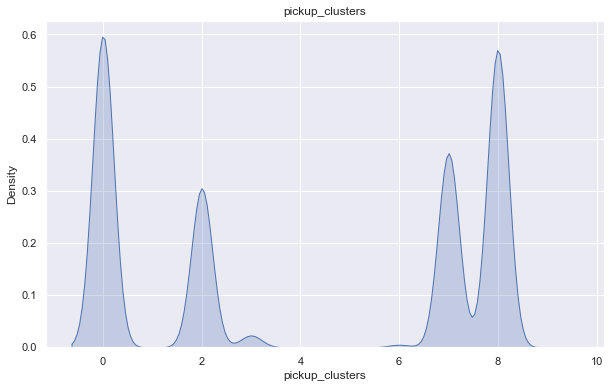

In [262]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("pickup_clusters")
sns.kdeplot(data=df_train['pickup_clusters'], shade=True)

<AxesSubplot:title={'center':'dropoff_clusters'}, xlabel='dropoff_clusters', ylabel='Density'>

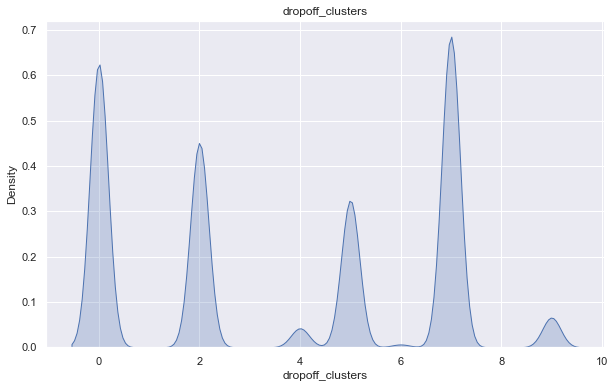

In [263]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("dropoff_clusters")
sns.kdeplot(data=df_train['dropoff_clusters'], shade=True)

<AxesSubplot:xlabel='pickup_clusters', ylabel='dropoff_clusters'>

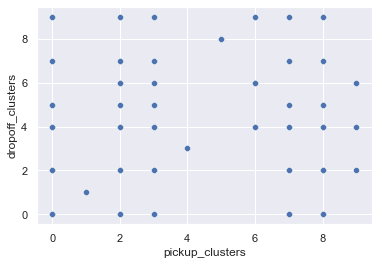

In [266]:
tn_pickup_dropoff=df_train.groupby(['id'])['pickup_clusters','dropoff_clusters'].sum().reset_index()
sns.scatterplot(tn_pickup_dropoff['pickup_clusters'], tn_pickup_dropoff['dropoff_clusters'])

In [269]:
df_train

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_pickup,time_dropoff,distance,km_h,pickup_clusters,dropoff_clusters
0,1049145,2,1,-73.982155,40.767937,-73.964630,40.765602,0,455,314172455,314173230,1.49852,11.856318,0,7
1,867655,1,1,-73.980415,40.738564,-73.999481,40.731152,0,663,612004335,612005438,1.80551,9.803497,8,5
3,1278209,2,1,-74.010040,40.719971,-74.012268,40.706718,0,429,406193231,406193940,1.48550,12.465386,2,5
4,796092,2,1,-73.973053,40.793209,-73.972923,40.782520,0,435,326133055,326133810,1.18859,9.836878,7,2
5,292637,2,6,-73.982857,40.742195,-73.992081,40.749184,0,443,130220140,130220903,1.09894,8.930115,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458637,701152,1,1,-73.975357,40.751705,-73.949478,40.776764,0,760,417184816,417190056,3.53756,16.756951,0,2
1458638,530918,2,5,-73.988823,40.736553,-73.989166,40.757393,0,414,202003939,202004633,2.31745,20.151739,8,7
1458639,867169,2,4,-73.982201,40.745522,-73.994911,40.740170,0,778,408133104,408134402,1.22508,5.668780,8,0
1458642,990387,1,1,-73.982079,40.749062,-73.974632,40.757107,0,373,105155626,105160239,1.09256,10.544928,8,7


test 데이터 군집분석 결과 보기
--

<AxesSubplot:title={'center':'pickup_clusters'}, xlabel='pickup_clusters', ylabel='Density'>

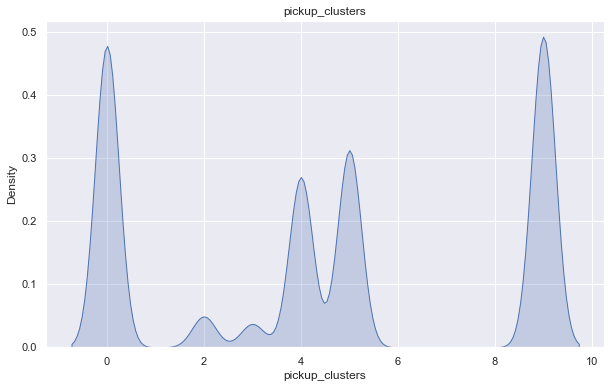

In [264]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("pickup_clusters")
sns.kdeplot(data=df_test['pickup_clusters'], shade=True)

<AxesSubplot:title={'center':'dropoff_clusters'}, xlabel='dropoff_clusters', ylabel='Density'>

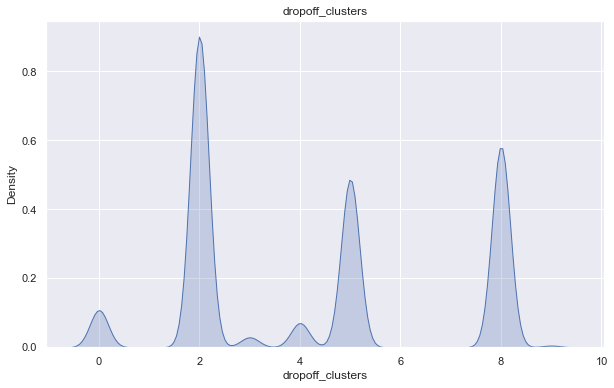

In [265]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("dropoff_clusters")
sns.kdeplot(data=df_test['dropoff_clusters'], shade=True)

<AxesSubplot:xlabel='pickup_clusters', ylabel='dropoff_clusters'>

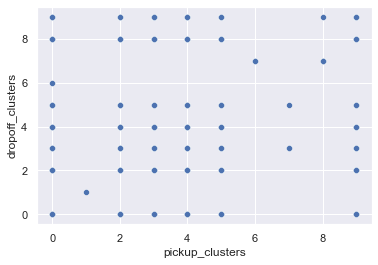

In [268]:
te_pickup_dropoff=df_test.groupby(['id'])['pickup_clusters','dropoff_clusters'].sum().reset_index()
sns.scatterplot(te_pickup_dropoff['pickup_clusters'], te_pickup_dropoff['dropoff_clusters'])

pickup_cluster, dropoff_cluster 구역별로 0과 1로 설정하기
--

이상치를 제거했던 train데이터를 다시 불러오겠습니다.

In [371]:
df_train=pd.DataFrame(train)
df_train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,month_dropoff,date_pickup,date_dropoff,hour_pickup,hour_dropoff,day_pickup,day_dropoff,elapsed_time,elapsed_time_h,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,3,14,14,17,17,Monday,Monday,0 days 00:07:35,0.12639,1.49852
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6,12,12,0,0,Sunday,Sunday,0 days 00:11:03,0.18417,1.80551
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,1,19,19,11,12,Tuesday,Tuesday,0 days 00:35:24,0.59000,6.38510
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4,6,6,19,19,Wednesday,Wednesday,0 days 00:07:09,0.11917,1.48550
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,3,26,26,13,13,Saturday,Saturday,0 days 00:07:15,0.12083,1.18859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,...,4,8,8,13,13,Friday,Friday,0 days 00:12:58,0.21611,1.22508
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,...,1,10,10,7,7,Sunday,Sunday,0 days 00:10:55,0.18194,6.04984
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,...,4,22,22,6,7,Friday,Friday,0 days 00:12:44,0.21222,7.82461
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,...,1,5,5,15,16,Tuesday,Tuesday,0 days 00:06:13,0.10361,1.09256


In [375]:
kmeans = KMeans(n_clusters=10, random_state=42).fit(df_train[['pickup_longitude','pickup_latitude']])
pickup_clusters = kmeans.predict(df_train[['pickup_longitude','pickup_latitude']])
pickup_clusters

df_train['pickup_clusters']=pickup_clusters

In [376]:
kmeans = KMeans(n_clusters=10, random_state=42).fit(df_train[['dropoff_longitude','dropoff_latitude']])
dropoff_clusters = kmeans.predict(df_train[['dropoff_longitude','dropoff_latitude']])
dropoff_clusters

df_train['dropoff_clusters']=dropoff_clusters

In [379]:
tn_pickup_clusters=np.array(df_train.pickup_clusters)
tn_dropoff_clusters=np.array(df_train.dropoff_clusters)
te_pickup_clusters=np.array(df_test.pickup_clusters)
te_dropoff_clusters=np.array(df_test.dropoff_clusters)

In [380]:
i=0
pc_0=[]
pc_1=[]
pc_2=[]
pc_3=[]
pc_4=[]
pc_5=[]
pc_6=[]
pc_7=[]
pc_8=[]
pc_9=[]

for i in range(0,1458644):
    if tn_pickup_clusters[i]==0:
        pc_0.append(1)
    else:
        pc_0.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_pickup_clusters[i]==1:
        pc_1.append(1)
    else:
        pc_1.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_pickup_clusters[i]==2:
        pc_2.append(1)
    else:
        pc_2.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_pickup_clusters[i]==3:
        pc_3.append(1)
    else:
        pc_3.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_pickup_clusters[i]==4:
        pc_4.append(1)
    else:
        pc_4.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_pickup_clusters[i]==5:
        pc_5.append(1)
    else:
        pc_5.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_pickup_clusters[i]==6:
        pc_6.append(1)
    else:
        pc_6.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_pickup_clusters[i]==7:
        pc_7.append(1)
    else:
        pc_7.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_pickup_clusters[i]==8:
        pc_8.append(1)
    else:
        pc_8.append(0)
        i+=1

        
for i in range(0,1458644):
    if tn_pickup_clusters[i]==9:
        pc_9.append(1)
    else:
        pc_9.append(0)
        i+=1
        
    
pc_0=pd.Series(pc_0)
df_train['pc_0']=pc_0

pc_1=pd.Series(pc_1)
df_train['pc_1']=pc_1

pc_2=pd.Series(pc_2)
df_train['pc_2']=pc_2

pc_3=pd.Series(pc_3)
df_train['pc_3']=pc_3

pc_4=pd.Series(pc_4)
df_train['pc_4']=pc_4

pc_5=pd.Series(pc_5)
df_train['pc_5']=pc_5

pc_6=pd.Series(pc_6)
df_train['pc_6']=pc_6

pc_7=pd.Series(pc_7)
df_train['pc_7']=pc_7

pc_8=pd.Series(pc_8)
df_train['pc_8']=pc_8

pc_9=pd.Series(pc_9)
df_train['pc_9']=pc_9

In [381]:
i=0
dc_0=[]
dc_1=[]
dc_2=[]
dc_3=[]
dc_4=[]
dc_5=[]
dc_6=[]
dc_7=[]
dc_8=[]
dc_9=[]

for i in range(0,1458644):
    if tn_dropoff_clusters[i]==0:
        dc_0.append(1)
    else:
        dc_0.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_dropoff_clusters[i]==1:
        dc_1.append(1)
    else:
        dc_1.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_dropoff_clusters[i]==2:
        dc_2.append(1)
    else:
        dc_2.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_dropoff_clusters[i]==3:
        dc_3.append(1)
    else:
        dc_3.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_dropoff_clusters[i]==4:
        dc_4.append(1)
    else:
        dc_4.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_dropoff_clusters[i]==5:
        dc_5.append(1)
    else:
        dc_5.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_dropoff_clusters[i]==6:
        dc_6.append(1)
    else:
        dc_6.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_dropoff_clusters[i]==7:
        dc_7.append(1)
    else:
        dc_7.append(0)
        i+=1
        
for i in range(0,1458644):
    if tn_dropoff_clusters[i]==8:
        dc_8.append(1)
    else:
        dc_8.append(0)
        i+=1

        
for i in range(0,1458644):
    if tn_dropoff_clusters[i]==9:
        dc_9.append(1)
    else:
        dc_9.append(0)
        i+=1
        
        
        
dc_0=pd.Series(dc_0)
df_train['dc_0']=dc_0

dc_1=pd.Series(dc_1)
df_train['dc_1']=dc_1

dc_2=pd.Series(dc_2)
df_train['dc_2']=dc_2

dc_3=pd.Series(dc_3)
df_train['dc_3']=dc_3

dc_4=pd.Series(dc_4)
df_train['dc_4']=dc_4

dc_5=pd.Series(dc_5)
df_train['dc_5']=dc_5

dc_6=pd.Series(dc_6)
df_train['dc_6']=dc_6

dc_7=pd.Series(dc_7)
df_train['dc_7']=dc_7

dc_8=pd.Series(dc_8)
df_train['dc_8']=dc_8

dc_9=pd.Series(dc_9)
df_train['dc_9']=dc_9
        

In [415]:
df_train.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
time_pickup           0
time_dropoff          0
month_pickup          0
month_dropoff         0
date_pickup           0
date_dropoff          0
hour_pickup           0
hour_dropoff          0
day_pickup            0
day_dropoff           0
elapsed_time          0
elapsed_time_h        0
distance              0
pickup_clusters       0
dropoff_clusters      0
pc_0                  0
pc_1                  0
pc_2                  0
pc_3                  0
pc_4                  0
pc_5                  0
pc_6                  0
pc_7                  0
pc_8                  0
pc_9                  0
dc_0                  0
dc_1                  0
dc_2                  0
dc_3                  0
dc_4                  0
dc_5            

In [308]:
i=0
pc_0=[]
pc_1=[]
pc_2=[]
pc_3=[]
pc_4=[]
pc_5=[]
pc_6=[]
pc_7=[]
pc_8=[]
pc_9=[]

for i in range(0,625134):
    if te_pickup_clusters[i]==0:
        pc_0.append(1)
    else:
        pc_0.append(0)
        i+=1
        
for i in range(0,625134):
    if te_pickup_clusters[i]==1:
        pc_1.append(1)
    else:
        pc_1.append(0)
        i+=1
        
for i in range(0,625134):
    if te_pickup_clusters[i]==2:
        pc_2.append(1)
    else:
        pc_2.append(0)
        i+=1
        
for i in range(0,625134):
    if te_pickup_clusters[i]==3:
        pc_3.append(1)
    else:
        pc_3.append(0)
        i+=1
        
for i in range(0,625134):
    if te_pickup_clusters[i]==4:
        pc_4.append(1)
    else:
        pc_4.append(0)
        i+=1
        
for i in range(0,625134):
    if te_pickup_clusters[i]==5:
        pc_5.append(1)
    else:
        pc_5.append(0)
        i+=1
        
for i in range(0,625134):
    if te_pickup_clusters[i]==6:
        pc_6.append(1)
    else:
        pc_6.append(0)
        i+=1
        
for i in range(0,625134):
    if te_pickup_clusters[i]==7:
        pc_7.append(1)
    else:
        pc_7.append(0)
        i+=1
        
for i in range(0,625134):
    if te_pickup_clusters[i]==8:
        pc_8.append(1)
    else:
        pc_8.append(0)
        i+=1

        
for i in range(0,625134):
    if te_pickup_clusters[i]==9:
        pc_9.append(1)
    else:
        pc_9.append(0)
        i+=1
        
    
pc_0=pd.Series(pc_0)
df_test['pc_0']=pc_0

pc_1=pd.Series(pc_1)
df_test['pc_1']=pc_1

pc_2=pd.Series(pc_2)
df_test['pc_2']=pc_2

pc_3=pd.Series(pc_3)
df_test['pc_3']=pc_3

pc_4=pd.Series(pc_4)
df_test['pc_4']=pc_4

pc_5=pd.Series(pc_5)
df_test['pc_5']=pc_5

pc_6=pd.Series(pc_6)
df_test['pc_6']=pc_6

pc_7=pd.Series(pc_7)
df_test['pc_7']=pc_7

pc_8=pd.Series(pc_8)
df_test['pc_8']=pc_8

pc_9=pd.Series(pc_9)
df_test['pc_9']=pc_9

In [309]:
i=0
dc_0=[]
dc_1=[]
dc_2=[]
dc_3=[]
dc_4=[]
dc_5=[]
dc_6=[]
dc_7=[]
dc_8=[]
dc_9=[]

for i in range(0,625134):
    if te_dropoff_clusters[i]==0:
        dc_0.append(1)
    else:
        dc_0.append(0)
        i+=1
        
for i in range(0,625134):
    if te_dropoff_clusters[i]==1:
        dc_1.append(1)
    else:
        dc_1.append(0)
        i+=1
        
for i in range(0,625134):
    if te_dropoff_clusters[i]==2:
        dc_2.append(1)
    else:
        dc_2.append(0)
        i+=1
        
for i in range(0,625134):
    if te_dropoff_clusters[i]==3:
        dc_3.append(1)
    else:
        dc_3.append(0)
        i+=1
        
for i in range(0,625134):
    if te_dropoff_clusters[i]==4:
        dc_4.append(1)
    else:
        dc_4.append(0)
        i+=1
        
for i in range(0,625134):
    if te_dropoff_clusters[i]==5:
        dc_5.append(1)
    else:
        dc_5.append(0)
        i+=1
        
for i in range(0,625134):
    if te_dropoff_clusters[i]==6:
        dc_6.append(1)
    else:
        dc_6.append(0)
        i+=1
        
for i in range(0,625134):
    if te_dropoff_clusters[i]==7:
        dc_7.append(1)
    else:
        dc_7.append(0)
        i+=1
        
for i in range(0,625134):
    if te_dropoff_clusters[i]==8:
        dc_8.append(1)
    else:
        dc_8.append(0)
        i+=1

        
for i in range(0,625134):
    if te_dropoff_clusters[i]==9:
        dc_9.append(1)
    else:
        dc_9.append(0)
        i+=1
        
        
        
dc_0=pd.Series(dc_0)
df_test['dc_0']=dc_0

dc_1=pd.Series(dc_1)
df_test['dc_1']=dc_1

dc_2=pd.Series(dc_2)
df_test['dc_2']=dc_2

dc_3=pd.Series(dc_3)
df_test['dc_3']=dc_3

dc_4=pd.Series(dc_4)
df_test['dc_4']=dc_4

dc_5=pd.Series(dc_5)
df_test['dc_5']=dc_5

dc_6=pd.Series(dc_6)
df_test['dc_6']=dc_6

dc_7=pd.Series(dc_7)
df_test['dc_7']=dc_7

dc_8=pd.Series(dc_8)
df_test['dc_8']=dc_8

dc_9=pd.Series(dc_9)
df_test['dc_9']=dc_9
        

In [311]:
df_test.isna().sum()

id                    0
vendor_id             0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
time_pickup           0
distance              0
pickup_clusters       0
dropoff_clusters      0
pc_0                  0
pc_1                  0
pc_2                  0
pc_3                  0
pc_4                  0
pc_5                  0
pc_6                  0
pc_7                  0
pc_8                  0
pc_9                  0
dc_0                  0
dc_1                  0
dc_2                  0
dc_3                  0
dc_4                  0
dc_5                  0
dc_6                  0
dc_7                  0
dc_8                  0
dc_9                  0
dtype: int64

train: 출발 지점 상관관계 보기
--

In [416]:
train_loc=df_train.iloc[:, 26:46]

In [395]:
tn_p_loc=df_train.iloc[:, 26:36]

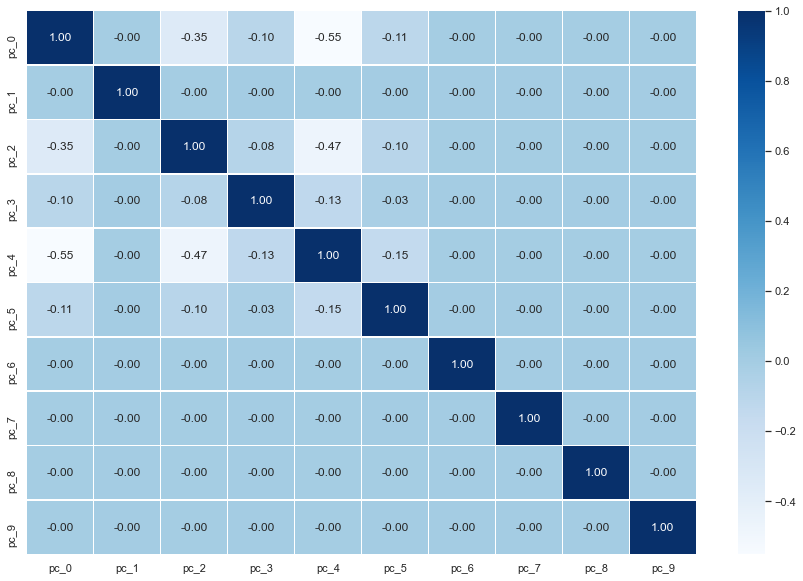

In [397]:
df_test.corr()
plt.figure(figsize=(15,10))
sns.heatmap(data=tn_p_loc.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

train: 도착 지점 상관관계 보기
--

In [396]:
tn_d_loc=df_train.iloc[:, 37:46]

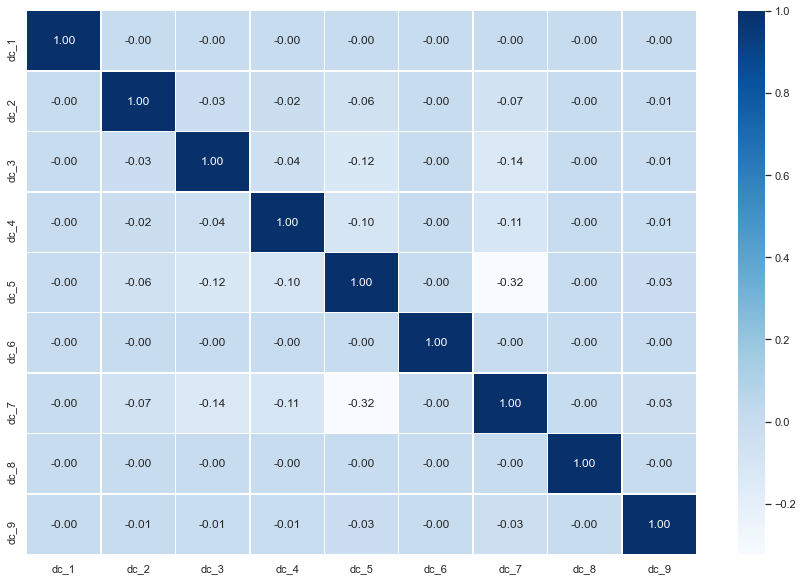

In [398]:
df_test.corr()
plt.figure(figsize=(15,10))
sns.heatmap(data=tn_d_loc.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

test: 출발 지점 보기
--

In [417]:
test_loc=df_test.iloc[:, 12:32]

In [408]:
te_p_loc=df_test.iloc[:, 12:22]

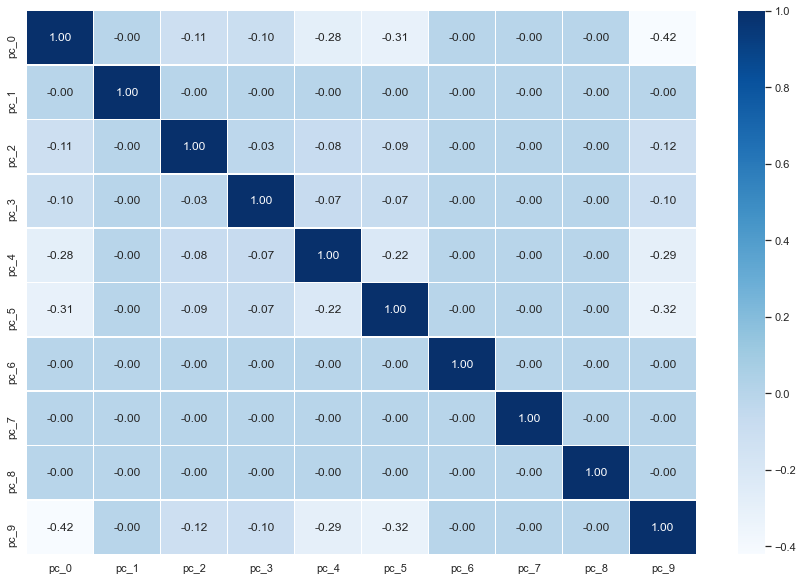

In [413]:
plt.figure(figsize=(15,10))
sns.heatmap(data=te_p_loc.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

test: 도착 지점 보기
--

In [411]:
te_d_loc=df_test.iloc[:, 22:32]

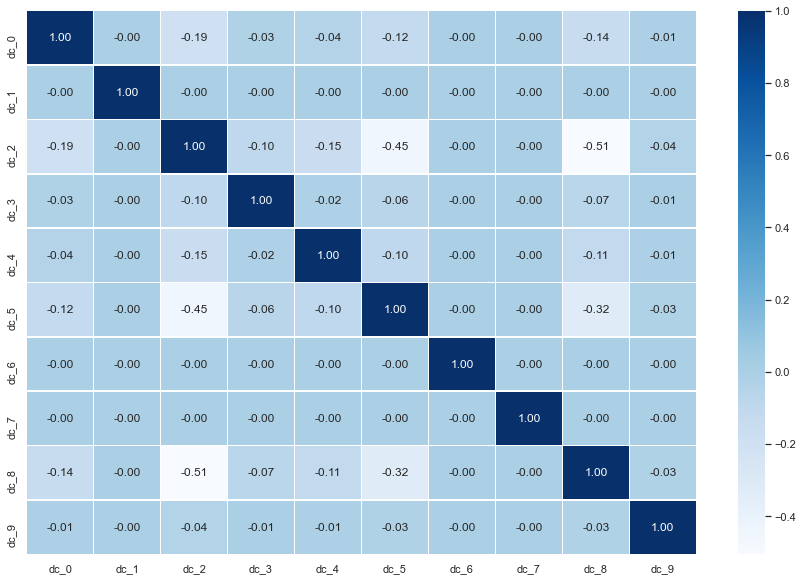

In [414]:
plt.figure(figsize=(15,10))
sns.heatmap(data=te_d_loc.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

In [388]:
df_train.trip_duration

0           455
1           663
2          2124
3           429
4           435
           ... 
1458639     778
1458640     655
1458641     764
1458642     373
1458643     198
Name: trip_duration, Length: 1458644, dtype: int64

train: 출발지점과 도착 지점 상관관계
--

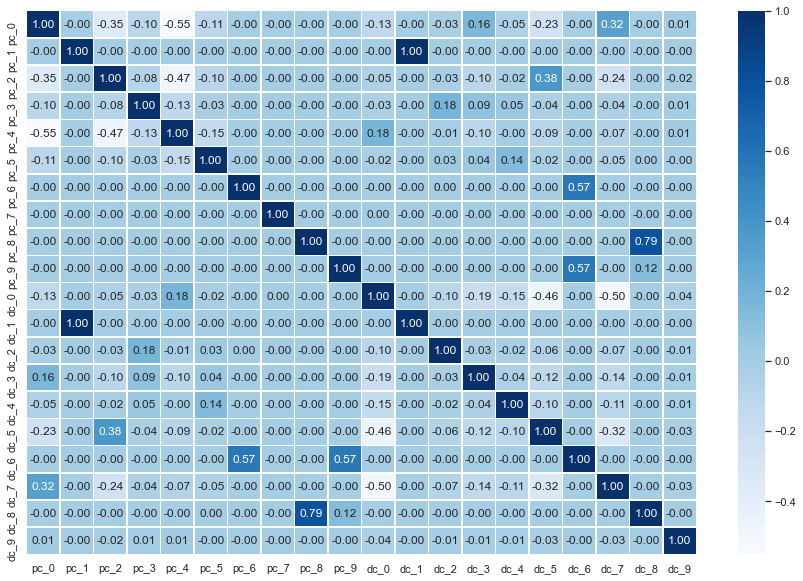

In [391]:
plt.figure(figsize=(15,10))
sns.heatmap(data=train_loc.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

test: 출발지점과 도착 지점 상관관계
--

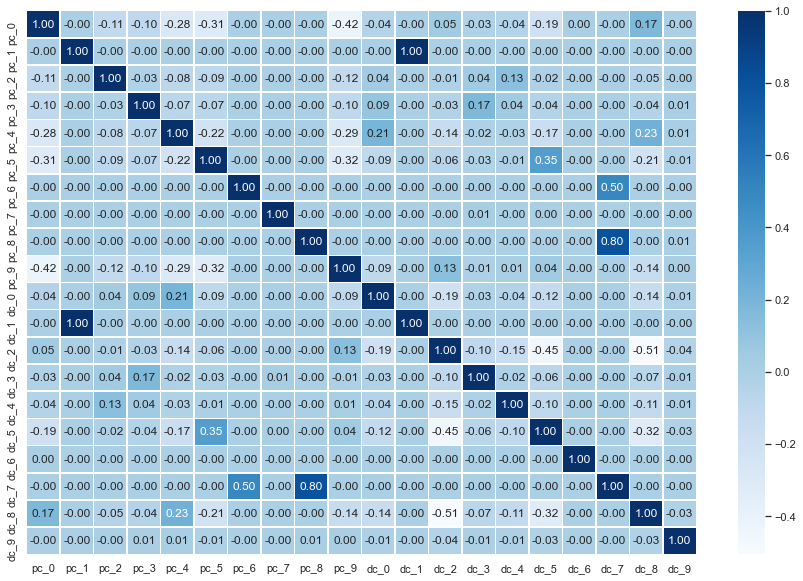

In [419]:
plt.figure(figsize=(15,10))
sns.heatmap(data=test_loc.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

X, y로 나누기
--

X값에 들어갈 데이터

In [420]:
train_loc

,pc_0,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,dc_0,dc_1,dc_2,dc_3,dc_4,dc_5,dc_6,dc_7,dc_8,dc_9
0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1458640,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1458641,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1458642,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [423]:
test_loc

,pc_0,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,dc_0,dc_1,dc_2,dc_3,dc_4,dc_5,dc_6,dc_7,dc_8,dc_9
0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625129,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
625130,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
625131,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
625132,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


y값에 들어갈 데이터

In [421]:
df_train.trip_duration

0           455
1           663
2          2124
3           429
4           435
           ... 
1458639     778
1458640     655
1458641     764
1458642     373
1458643     198
Name: trip_duration, Length: 1458644, dtype: int64

In [862]:
# 훈련데이터와 테스트 데이터
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(990648, 6)
(247662, 6)
(990648,)
(247662,)


Classification
--